<a href="https://colab.research.google.com/github/nirlevin80/nirlevin/blob/main/Final_Regression_Project_Car_Price_Adi_Nir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor   
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.style.use('default')


In [ ]:
def rmse(y_actual, y_pred):
    return np.sqrt(mean_squared_error(y_actual,y_pred))

In [ ]:
# cars_df = pd.read_csv('https://raw.githubusercontent.com/nirlevin80/nirlevin/main/Car%20details.csv')
cars_df = pd.read_csv('Car details v3.csv')
print(cars_df.shape)


(8128, 13)


In [ ]:
cars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
cars_df.sample(7).T

6072  \
name           Mahindra Verito 1.5 D6 BSIII   
year                                   2014   
selling_price                        250000   
km_driven                            110000   
fuel                                 Diesel   
seller_type                      Individual   
transmission                         Manual   
owner                           First Owner   
mileage                           20.8 kmpl   
engine                              1461 CC   
max_power                            65 bhp   
torque                       160Nm@ 2000rpm   
seats                                   5.0   

                                                4287                   6191  \
name           Toyota Innova 2.5 G (Diesel) 7 Seater   Hyundai Verna 1.6 SX   
year                                            2012                   2014   
selling_price                                 700000                 650000   
km_driven                                     246000                  83000   
fuel                                          Diesel                 Diesel   
seller_type                               Individual             Individual   
transmission                                  Manual                 Manual   
owner                                   Second Owner            Third Owner   
mileage                                   12.99 kmpl             22.32 kmpl   
engine                                       2494 CC                1582 CC   
max_power                                    100 bhp             126.32 bhp   
torque                           200Nm@ 1400-3400rpm  259.8Nm@ 1900-2750rpm   
seats                                            7.0                    5.0   

                                   5886                      6138  \
name           Mahindra Scorpio 1.99 S4  Tata Indica V2 GLX BSIII   
year                               2016                      2012   
selling_price                    741000                    200000   
km_driven                         70000                     30078   
fuel                             Diesel                    Petrol   
seller_type                  Individual                    Dealer   
transmission                     Manual                    Manual   
owner                       First Owner               First Owner   
mileage                       15.4 kmpl                 15.3 kmpl   
engine                          1997 CC                   1396 CC   
max_power                       120 bhp                    70 bhp   
torque              280Nm@ 1800-2800rpm     12.4@ 2,600(kgm@ rpm)   
seats                               7.0                       5.0   

                                    2586               4523  
name                Toyota Innova 2.5 G2  Maruti Ertiga VDI  
year                                2005               2015  
selling_price                     245000             650000  
km_driven                         120000             110000  
fuel                              Diesel             Diesel  
seller_type                   Individual         Individual  
transmission                      Manual             Manual  
owner                        First Owner        Third Owner  
mileage                        12.8 kmpl         20.77 kmpl  
engine                           2494 CC            1248 CC  
max_power                        102 bhp          88.76 bhp  
torque         20.4@ 1400-3400(kgm@ rpm)     200Nm@ 1750rpm  
seats                                8.0                7.0

In [ ]:
cars_df.corr()

year  selling_price  km_driven     seats
year           1.000000       0.414092  -0.418006 -0.009144
selling_price  0.414092       1.000000  -0.225534  0.041358
km_driven     -0.418006      -0.225534   1.000000  0.227336
seats         -0.009144       0.041358   0.227336  1.000000

In [ ]:
#check for na lines
cars_df.isna().value_counts()
# We may remove lines with na on engine and mileage sice we expect to examine them in the analysis

name   year   selling_price  km_driven  fuel   seller_type  transmission  owner  mileage  engine  max_power  torque  seats
False  False  False          False      False  False        False         False  False    False   False      False   False    7906
                                                                                 True     True    True       True    True      215
                                                                                                  False      True    True        6
                                                                                 False    False   False      True    False       1
dtype: int64

In [ ]:
cars_df.describe()

year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

##To analyze the engine CC , engine HP .. we remove the NANs


In [ ]:
#We will remove missing mileage, engine, and seats= = 215

cars_df_clean = cars_df[cars_df.isnull().sum(axis=1) <5].copy()
print(cars_df_clean.shape)
cars_df_clean

(7913, 13)


name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
0     Individual       Manual           First Owner   23.4 kmpl  1248 CC   
1     Individual       Manual          Second Owner  21.14 kmpl  1498 CC   
2     Individual       Manual           Third Owner   17.7 kmpl  1497 CC   
3     Individual       Manual           First Owner   23.0 kmpl  1396 CC   
4     Individual       Manual           First Owner   16.1 kmpl  1298 CC   
...          ...          ...                   ...         ...      ...   
8123  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
8124  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
8125  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
8126  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
8127  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

       max_power                     torque  seats  
0         74 bhp             190Nm@ 2000rpm    5.0  
1     103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2         78 bhp      12.7@ 2,700(kgm@ rpm)    5.0  
3         90 bhp   22.4 kgm at 1750-2750rpm    5.0  
4       88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
...          ...                        ...    ...  
8123   82.85 bhp           113.7Nm@ 4000rpm    5.0  
8124     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
8125    73.9 bhp             190Nm@ 2000rpm    5.0  
8126      70 bhp        140Nm@ 1800-3000rpm    5.0  
8127      70 bhp        140Nm@ 1800-3000rpm    5.0  

[7913 rows x 13 columns]

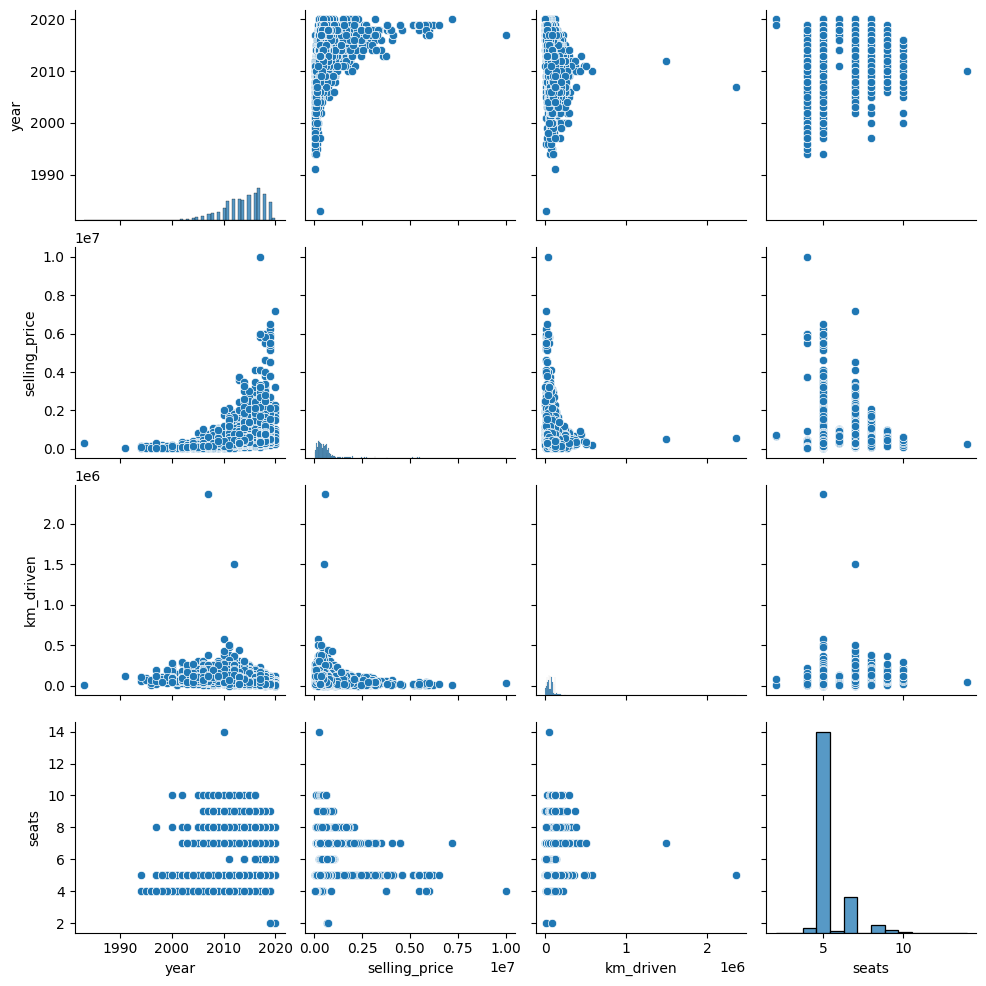

In [ ]:
#Bisualize the numeric correlations
sns.pairplot(cars_df)

DEal with car models

In [ ]:
print(cars_df.name.nunique(),'\n')
cars_df.name.unique()
# print(cars_df[cars_df.name.value_counts()>100].name.nunique())
(cars_df.name.value_counts()>100)

2058 



Maruti Swift Dzire VDI                              True
Maruti Alto 800 LXI                                False
Maruti Alto LXi                                    False
BMW X4 M Sport X xDrive20d                         False
Maruti Swift VDI                                   False
                                                   ...  
Skoda Fabia 1.4 TDI Ambiente                       False
Mahindra Scorpio VLX 2WD AT BSIII                  False
Renault KWID Climber 1.0 AMT                       False
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV    False
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV       False
Name: name, Length: 2058, dtype: bool

##Create a manufacturer column since we have too many separate values of specific model

In [ ]:
cars_df_clean['manufacturer'] = cars_df_clean.name.str.split(' ').map(lambda x: x[0])
print(f'Number of manufacturers = {cars_df_clean["manufacturer"].nunique()}\n' ,cars_df_clean['manufacturer'].unique())
#cars_df_clean.sample(8).T

Number of manufacturers = 31
 ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']


perhaps we can salvage some cars by comparing to other cars

In [ ]:
cars_df_clean['model'] = cars_df_clean.name.str.split(' ').map(lambda x: x[1])
print(f'Number of models = {cars_df_clean["model"].nunique()}\n' ,cars_df_clean['model'].unique())

Number of models = 197
 ['Swift' 'Rapid' 'City' 'i20' 'Xcent' 'Wagon' '800' 'Etios' 'Figo'
 'Duster' 'Zen' 'KUV' 'Ertiga' 'Alto' 'Verito' 'WR-V' 'SX4' 'Tigor'
 'Baleno' 'Enjoy' 'Omni' 'Vitara' 'Verna' 'GO' 'Safari' 'Compass'
 'Fortuner' 'Innova' 'B' 'Amaze' 'Pajero' 'Ciaz' 'Jazz' 'A6' 'Corolla'
 'New' 'Manza' 'i10' 'Ameo' 'Vento' 'EcoSport' 'X1' 'Celerio' 'Polo'
 'Eeco' 'Scorpio' 'Freestyle' 'Passat' 'Indica' 'XUV500' 'Indigo'
 'Terrano' 'Creta' 'KWID' 'Santro' 'Q5' 'ES' 'XF' 'Wrangler' 'Rover'
 'S-Class' '5' 'X4' 'Superb' 'E-Class' 'Hector' 'XC40' 'Q7' 'Elantra' 'XE'
 'Nexon' 'CLA' 'Glanza' '3' 'Camry' 'XC90' 'Ritz' 'Grand' 'Matiz' 'Zest'
 'Getz' 'Elite' 'Brio' 'Hexa' 'Sunny' 'Micra' 'Ssangyong' 'Quanto'
 'Accent' 'Ignis' 'Marazzo' 'Tiago' 'Thar' 'Sumo' 'Bolero' 'GL-Class'
 'Beat' 'A-Star' 'XUV300' 'Nano' 'GTI' 'V40' 'CR-V' 'EON' 'RediGO'
 'Captiva' 'Fiesta' 'Seltos' 'Civic' 'Sail' 'Venture' 'Classic' 'BR-V'
 'Ecosport' 'Aria' 'TUV' 'Bolt' 'Accord' 'Xylo' 'Grande' 'S-Cross' 'Yaris'
 '

In [ ]:
cars_df_clean.sample(8).T

5931                  3662  \
name           Tata Zest Revotron 1.2T XMS  Honda City i VTEC VX   
year                                  2015                  2014   
selling_price                       500000                565000   
km_driven                            20000                 56000   
fuel                                Petrol                Petrol   
seller_type                     Individual            Individual   
transmission                        Manual                Manual   
owner                          First Owner          Second Owner   
mileage                         17.57 kmpl             17.4 kmpl   
engine                             1193 CC               1497 CC   
max_power                         88.7 bhp             117.3 bhp   
torque                 140Nm@ 1500-4000rpm        145Nm@ 4600rpm   
seats                                  5.0                   5.0   
manufacturer                          Tata                 Honda   
model                                 Zest                  City   

                                             5861  \
name           Hyundai i20 Active 1.4 SX with AVN   
year                                         2017   
selling_price                              715000   
km_driven                                   60000   
fuel                                       Diesel   
seller_type                            Individual   
transmission                               Manual   
owner                                 First Owner   
mileage                                21.19 kmpl   
engine                                    1396 CC   
max_power                               88.73 bhp   
torque                     219.66nm@ 1500-2750rpm   
seats                                         5.0   
manufacturer                              Hyundai   
model                                         i20   

                                      7196                    7041  \
name           Hyundai Santro Xing GL Plus  Maruti Ertiga BSIV VXI   
year                                  2012                    2016   
selling_price                       200000                  600000   
km_driven                            90000                   13500   
fuel                                Petrol                  Petrol   
seller_type                     Individual              Individual   
transmission                        Manual                  Manual   
owner                         Second Owner             First Owner   
mileage                         17.92 kmpl               17.5 kmpl   
engine                             1086 CC                 1373 CC   
max_power                         62.1 bhp                91.1 bhp   
torque                     96.1Nm@ 3000rpm          130Nm@ 4000rpm   
seats                                  5.0                     7.0   
manufacturer                       Hyundai                  Maruti   
model                               Santro                  Ertiga   

                                6843                        6727  \
name           Tata Safari Storme LX  Maruti Wagon R VXI Opt 1.2   
year                            2014                        2017   
selling_price                 540000                      445000   
km_driven                      77500                       39500   
fuel                          Diesel                      Petrol   
seller_type               Individual                  Individual   
transmission                  Manual                      Manual   
owner                   Second Owner                 First Owner   
mileage                    14.0 kmpl                  20.52 kmpl   
engine                       2179 CC                     1197 CC   
max_power                  138.1 bhp                   81.80 bhp   
torque           320Nm@ 1700-2700rpm              113Nm@ 4200rpm   
seats                            7.0                         5.0   
manufacturer               

In [ ]:
print(cars_df_clean.shape)
cars_df_clean.columns

(7913, 15)


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'manufacturer', 'model'],
      dtype='object')

In [ ]:
cars_df_clean.corr()

year  selling_price  km_driven     seats
year           1.000000       0.412320  -0.428524 -0.009144
selling_price  0.412320       1.000000  -0.222227  0.041358
km_driven     -0.428524      -0.222227   1.000000  0.227336
seats         -0.009144       0.041358   0.227336  1.000000

convert engine CC to numeric


---



## Engine

In [ ]:
print(cars_df.engine.nunique())
cars_df.engine.unique()    #.sort_values()


121


array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '1061 CC', '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC',
       nan, '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

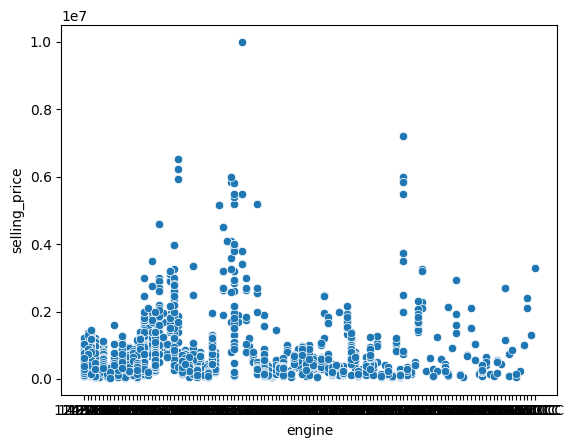

In [ ]:
sns.scatterplot(data= cars_df_clean, x='engine', y = 'selling_price') #, hue= 'manufacturer') #, size=0.8, alpha=0.5 )


#convert engine to engine_cc a numeric column

121
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7913 entries, 0 to 8127
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7913 non-null   object 
 1   year           7913 non-null   int64  
 2   selling_price  7913 non-null   int64  
 3   km_driven      7913 non-null   int64  
 4   fuel           7913 non-null   object 
 5   seller_type    7913 non-null   object 
 6   transmission   7913 non-null   object 
 7   owner          7913 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  manufacturer   7913 non-null   object 
 14  model          7913 non-null   object 
 15  engine_cc      7907 non-null   float64
dtypes: float64(2), int64(3), object(11)
memory usage: 1.0+ MB


/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


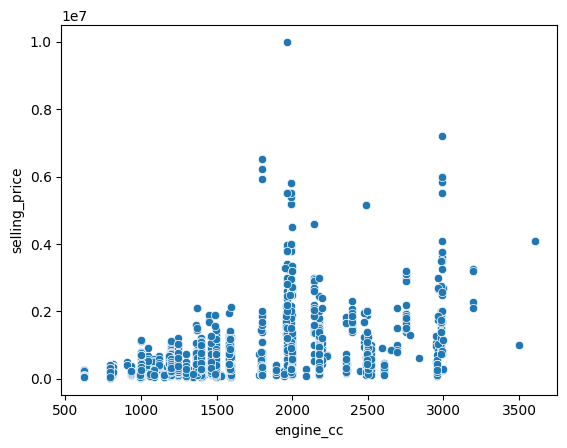

In [ ]:
cars_df_clean['engine_cc'] = cars_df_clean.engine.str.split(' ').str.get(0).astype(float) 
print(cars_df_clean.engine_cc.nunique())
cars_df_clean.engine_cc.unique()    #.sort_values()
cars_df_clean.info()
sns.scatterplot(data= cars_df_clean, x='engine_cc', y = 'selling_price') #, hue= 'manufacturer') #, size=0.8, alpha=0.5 )


In [ ]:
cars_df_clean.corr()

year  selling_price  km_driven     seats  engine_cc
year           1.000000       0.412320  -0.428524 -0.009144   0.018848
selling_price  0.412320       1.000000  -0.222227  0.041358   0.455734
km_driven     -0.428524      -0.222227   1.000000  0.227336   0.205914
seats         -0.009144       0.041358   0.227336  1.000000   0.610309
engine_cc      0.018848       0.455734   0.205914  0.610309   1.000000

##Engine HP
convert Max Power to engine HP numeric value 

322


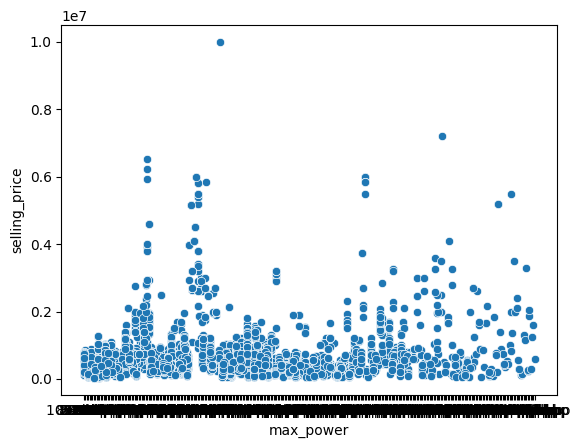

In [ ]:
print(cars_df.max_power.nunique())
cars_df.max_power.value_counts    #.sort_values()
sns.scatterplot(data= cars_df_clean, x='max_power', y = 'selling_price') #, hue= 'manufacturer') #, size=0.8, alpha=0.5 )

In [ ]:
cars_df_clean['engine_hp'] = cars_df_clean.max_power.str.split(' ').str.get(0).astype(float,  errors='ignore')    # to_numeric(s, errors='coerce')
print(cars_df_clean.engine_hp.nunique())
cars_df_clean.engine_hp.unique()    #.sort_values()
cars_df_clean.engine_hp.value_counts().sort_values(axis = 0, ascending = False)


322


74        377
81.80     220
88.5      204
67        165
46.3      162
         ... 
141.1       1
86.79       1
170.63      1
68.4        1
135.1       1
Name: engine_hp, Length: 322, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7913 entries, 0 to 8127
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7913 non-null   object 
 1   year           7913 non-null   int64  
 2   selling_price  7913 non-null   int64  
 3   km_driven      7913 non-null   int64  
 4   fuel           7913 non-null   object 
 5   seller_type    7913 non-null   object 
 6   transmission   7913 non-null   object 
 7   owner          7913 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  manufacturer   7913 non-null   object 
 14  model          7913 non-null   object 
 15  engine_cc      7907 non-null   float64
 16  engine_hp      7913 non-null   object 
dtypes: float64(2), int64(3), object(12)
memory usage: 1.

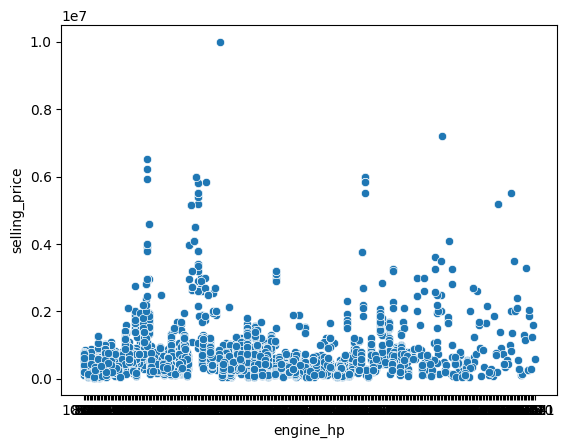

In [ ]:

cars_df_clean.info()
sns.scatterplot(data= cars_df_clean, x='engine_hp', y = 'selling_price') #, hue= 'manufacturer') #, size=0.8, alpha=0.5 )

In [ ]:
cars_df_clean.isna().value_counts()

name   year   selling_price  km_driven  fuel   seller_type  transmission  owner  mileage  engine  max_power  torque  seats  manufacturer  model  engine_cc  engine_hp
False  False  False          False      False  False        False         False  False    False   False      False   False  False         False  False      False        7906
                                                                                 True     True    False      True    True   False         False  True       False           6
                                                                                 False    False   False      True    False  False         False  False      False           1
dtype: int64

In [ ]:
cars_df_clean[cars_df_clean.engine_hp=='']

name  year  selling_price  km_driven fuel seller_type  \
4933  Maruti Omni CNG  2000          80000     100000  CNG  Individual   

     transmission         owner     mileage  engine max_power torque  seats  \
4933       Manual  Second Owner  10.9 km/kg  796 CC       bhp    NaN    8.0   

     manufacturer model  engine_cc engine_hp  
4933       Maruti  Omni      796.0

In [ ]:
cars_df_clean[(cars_df_clean.manufacturer == "Maruti") & (cars_df_clean.model == "Omni") ].head(5)

name  year  selling_price  km_driven    fuel  \
29   Maruti Omni E MPI STD BS IV  2018         254999      25000  Petrol   
32     Maruti Omni 8 Seater BSIV  2012         150000      35000  Petrol   
89     Maruti Omni 8 Seater BSIV  2017         280000      32000  Petrol   
289  Maruti Omni E MPI STD BS IV  2016         220000      35000  Petrol   
616  Maruti Omni E MPI STD BS IV  2017         220000      40000  Petrol   

    seller_type transmission         owner    mileage  engine max_power  \
29   Individual       Manual   First Owner  16.8 kmpl  796 CC  34.2 bhp   
32   Individual       Manual  Second Owner  14.0 kmpl  796 CC    35 bhp   
89       Dealer       Manual   First Owner  14.0 kmpl  796 CC    35 bhp   
289  Individual       Manual   First Owner  16.8 kmpl  796 CC  34.2 bhp   
616  Individual       Manual   First Owner  16.8 kmpl  796 CC  34.2 bhp   

              torque  seats manufacturer model  engine_cc engine_hp  
29     59Nm@ 2500rpm    8.0       Maruti  Omni      796.0      34.2  
32   6.1kgm@ 3000rpm    5.0       Maruti  Omni      796.0        35  
89   6.1kgm@ 3000rpm    5.0       Maruti  Omni      796.0        35  
289    59Nm@ 2500rpm    8.0       Maruti  Omni      796.0      34.2  
616    59Nm@ 2500rpm    8.0       Maruti  Omni      796.0      34.2

All Maruni Omni have 796 CC and max power of 35bhp so do manual imputation 

In [ ]:
cars_df_clean.loc[cars_df_clean.index ==4933,'engine_hp' ] = 35
cars_df_clean['engine_hp'] =cars_df_clean['engine_hp'].astype(float)
cars_df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7913 entries, 0 to 8127
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7913 non-null   object 
 1   year           7913 non-null   int64  
 2   selling_price  7913 non-null   int64  
 3   km_driven      7913 non-null   int64  
 4   fuel           7913 non-null   object 
 5   seller_type    7913 non-null   object 
 6   transmission   7913 non-null   object 
 7   owner          7913 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  manufacturer   7913 non-null   object 
 14  model          7913 non-null   object 
 15  engine_cc      7907 non-null   float64
 16  engine_hp      7913 non-null   float64
dtypes: float64(3), int64(3), object(11)
memory usage: 1.

In [ ]:
cars_df_clean.corr()

year  selling_price  km_driven     seats  engine_cc  \
year           1.000000       0.412320  -0.428524 -0.009144   0.018848   
selling_price  0.412320       1.000000  -0.222227  0.041358   0.455734   
km_driven     -0.428524      -0.222227   1.000000  0.227336   0.205914   
seats         -0.009144       0.041358   0.227336  1.000000   0.610309   
engine_cc      0.018848       0.455734   0.205914  0.610309   1.000000   
engine_hp      0.226819       0.748487  -0.038176  0.191342   0.704049   

               engine_hp  
year            0.226819  
selling_price   0.748487  
km_driven      -0.038176  
seats           0.191342  
engine_cc       0.704049  
engine_hp       1.000000

## Convert mileage to km_per_l numeric column

393


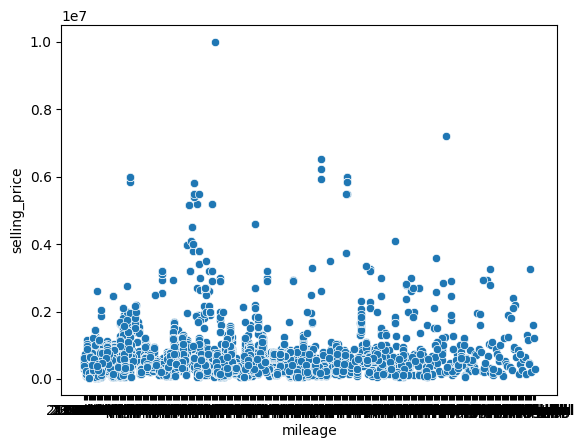

In [ ]:
print(cars_df.mileage.nunique())
cars_df.mileage.value_counts().sort_values(axis = 0, ascending = False)
sns.scatterplot(data= cars_df_clean, x='mileage', y = 'selling_price') #, hue= 'manufacturer') #, size=0.8, alpha=0.5 )

In [ ]:
cars_df_clean['km_per_l'] = cars_df_clean.mileage.str.split(' ').str.get(0).astype(float)
cars_df_clean.sample(8).T
cars_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7913 entries, 0 to 8127
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7913 non-null   object 
 1   year           7913 non-null   int64  
 2   selling_price  7913 non-null   int64  
 3   km_driven      7913 non-null   int64  
 4   fuel           7913 non-null   object 
 5   seller_type    7913 non-null   object 
 6   transmission   7913 non-null   object 
 7   owner          7913 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
 13  manufacturer   7913 non-null   object 
 14  model          7913 non-null   object 
 15  engine_cc      7907 non-null   float64
 16  engine_hp      7913 non-null   float64
 17  km_per_l       7907 non-null   float64
dtypes: float

Check correlation

In [ ]:
cars_df_clean.corr()

year  selling_price  km_driven     seats  engine_cc  \
year           1.000000       0.412320  -0.428524 -0.009144   0.018848   
selling_price  0.412320       1.000000  -0.222227  0.041358   0.455734   
km_driven     -0.428524      -0.222227   1.000000  0.227336   0.205914   
seats         -0.009144       0.041358   0.227336  1.000000   0.610309   
engine_cc      0.018848       0.455734   0.205914  0.610309   1.000000   
engine_hp      0.226819       0.748487  -0.038176  0.191342   0.704049   
km_per_l       0.329145      -0.126054  -0.173073 -0.452085  -0.575831   

               engine_hp  km_per_l  
year            0.226819  0.329145  
selling_price   0.748487 -0.126054  
km_driven      -0.038176 -0.173073  
seats           0.191342 -0.452085  
engine_cc       0.704049 -0.575831  
engine_hp       1.000000 -0.374034  
km_per_l       -0.374034  1.000000

# check manufacturer and fuel and owner and transmission
unique scatter and  boxplot and manufacturer and relevance to price

## Selling price high correlation to engine HP (0.75) correlation to engine cc and km driven
We will now proceed to clean the data and get better insights

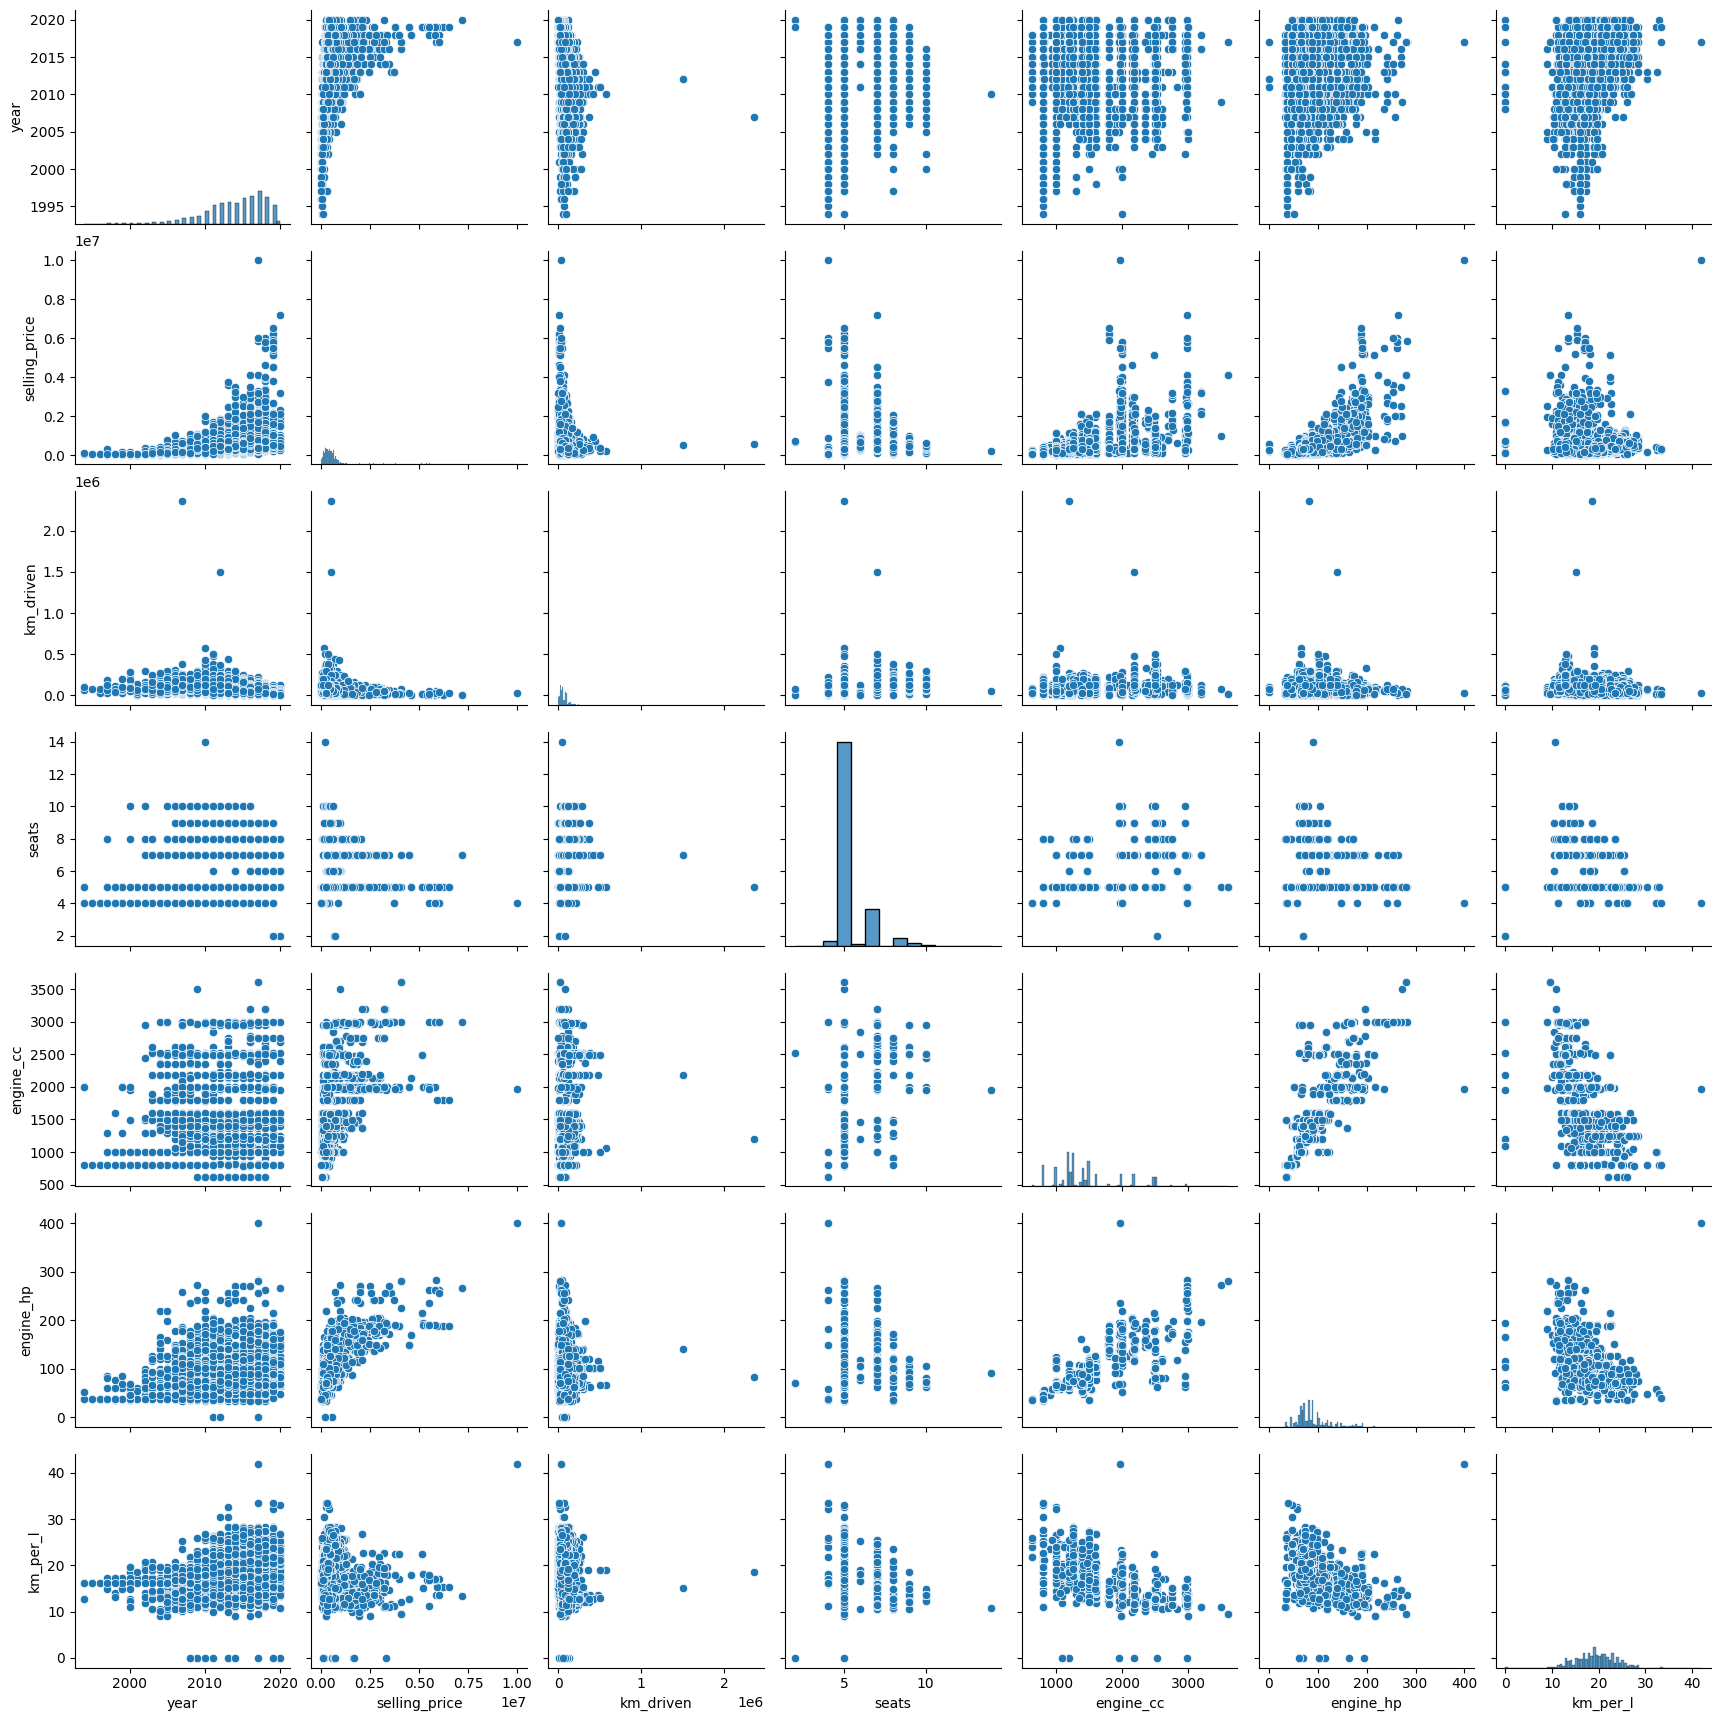

In [ ]:
sns.pairplot(cars_df_clean)

##Examine Year
Year to Price, Year to price + hue
==> remove years

In [ ]:
#Examine Year
#remove year
print(cars_df_clean.shape)
cars_df_clean.year.value_counts().sort_index(ascending = False)
#We remove up to 2005

(7913, 18)


2020      74
2019     583
2018     806
2017    1012
2016     856
2015     775
2014     620
2013     668
2012     623
2011     572
2010     375
2009     231
2008     201
2007     173
2006     102
2005      76
2004      51
2003      37
2002      19
2001       6
2000      16
1999      14
1998       9
1997       9
1996       2
1995       1
1994       2
Name: year, dtype: int64

[Text(0.5, 1.0, 'Year vs Selling Price Occurences')]

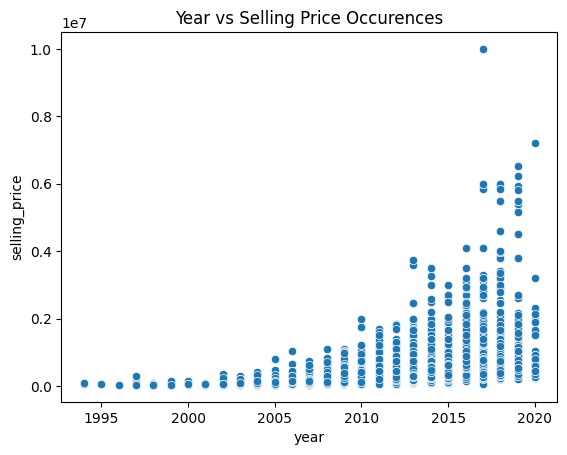

In [ ]:
sns.scatterplot(data= cars_df_clean, x='year', y = 'selling_price').set(title='Year vs Selling Price Occurences')  #, hue= 'manufacturer') #, size=0.8, alpha=0.5 )

In [ ]:
# We need enough cars in a year for statistics.
# We will remove years that have less than 100 cars in them ie 2005 and earlier
################################################################
cars_df_clean.shape
idx  = cars_df_clean[cars_df_clean.year < 2006].index

cars_df_clean = cars_df_clean.drop(axis = 0, index = idx).copy()
print(cars_df_clean.shape)
#sns.pairplot(data = cars_df_clean)


(7671, 18)


[Text(0.5, 1.0, 'Year vs Selling Price Occurences')]

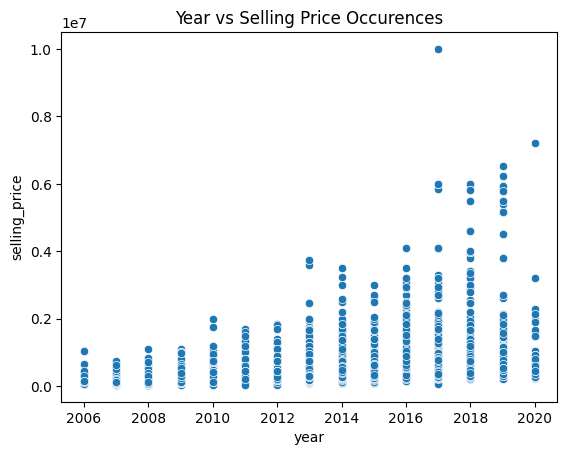

In [ ]:
sns.scatterplot(data= cars_df_clean, x='year', y = 'selling_price').set(title='Year vs Selling Price Occurences') #, hue= 'manufacturer') #, size=0.8, alpha=0.5 )


## Remove price outliers
cut at price 2.5 mili
We see that higher prices relate only to luxury cars - cutting at 3milion removes 230 cars all luxury.
We will cut at 5,500,000 it removes 
BMW              8
Mercedes-Benz    4
Audi             3
Volvo            1

(7671, 18)

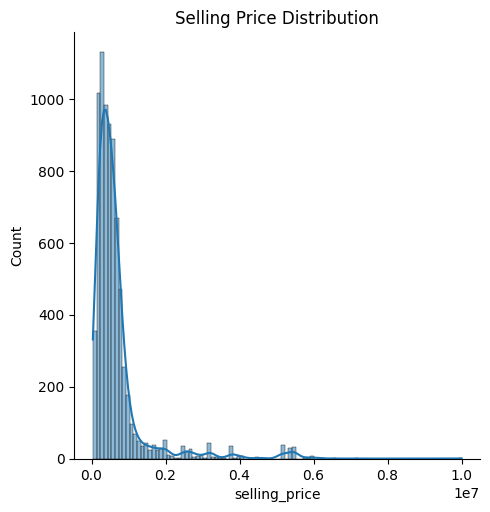

In [ ]:
sns.displot(cars_df_clean.selling_price, bins=100,kde= True).set(title='Selling Price Distribution')
cars_df_clean.shape

there are 229 cars in th eprice range of 3-10Milion rupees- we will remove these cars

356
229
130
119
117
16


BMW              78
Lexus            34
Volvo            33
Mercedes-Benz    10
Audi              9
Jeep              6
Land              4
Name: manufacturer, dtype: int64

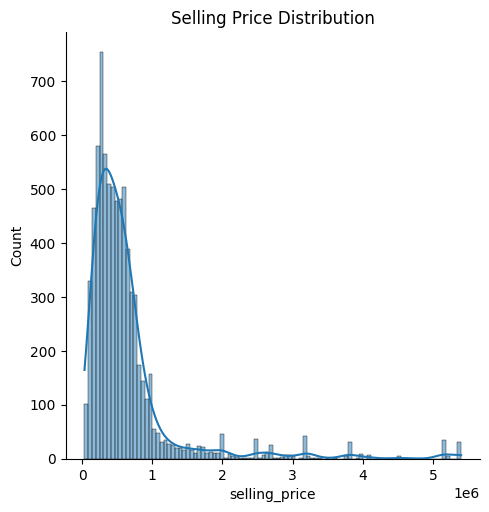

In [ ]:
cars_df_clean[cars_df_clean.selling_price> 5_500_000].selling_price.value_counts().sort_index(ascending = False).sum()
sns.displot(cars_df_clean[cars_df_clean.selling_price< 5_500_000].selling_price, bins=100,kde= True).set(title='Selling Price Distribution')
print(cars_df_clean[cars_df_clean.selling_price> 2_000_000].selling_price.value_counts().sort_index(ascending = False).sum())
print(cars_df_clean[cars_df_clean.selling_price> 3_000_000].selling_price.value_counts().sort_index(ascending = False).sum())
print(cars_df_clean[cars_df_clean.selling_price> 4_000_000].selling_price.value_counts().sort_index(ascending = False).sum())
print(cars_df_clean[cars_df_clean.selling_price> 4_500_000].selling_price.value_counts().sort_index(ascending = False).sum())
print(cars_df_clean[cars_df_clean.selling_price> 5_000_000].selling_price.value_counts().sort_index(ascending = False).sum())
print(cars_df_clean[cars_df_clean.selling_price> 5_500_000].selling_price.value_counts().sort_index(ascending = False).sum())
cars_df_clean[cars_df_clean.selling_price> 3_500_000].manufacturer.value_counts()


######drop cars with price above 4.5 Mil


*   List item
*   List item



In [ ]:
######drop cars with price above 4.5 Mil
print(cars_df_clean.shape)
idx  = cars_df_clean[cars_df_clean.selling_price > 4_500_000].index
cars_df_clean = cars_df_clean.drop(axis = 0, index = idx).copy()
#sns.displot(cars_df_clean.selling_price, bins=100,kde= True)
cars_df_clean.shape

(7671, 18)


(7552, 18)

[Text(0.5, 1.0, 'Year vs Selling Price Occurences')]

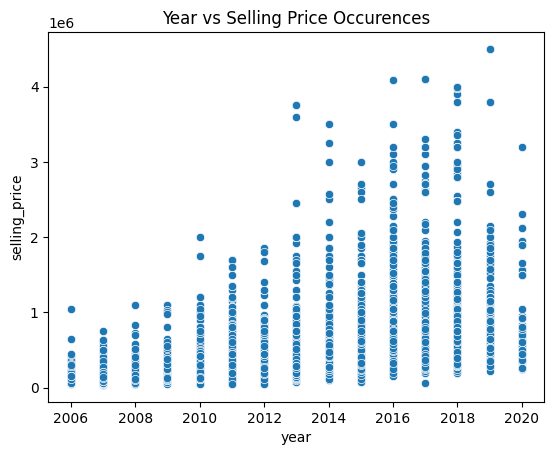

In [ ]:
sns.scatterplot(data= cars_df_clean, x='year', y = 'selling_price').set(title='Year vs Selling Price Occurences') #, hue= 'manufacturer') #, size=0.8, alpha=0.5 )

## Examine KM driven
Price : km_driven, add hue for Manufacture, joint plot with HP , hue with owner


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


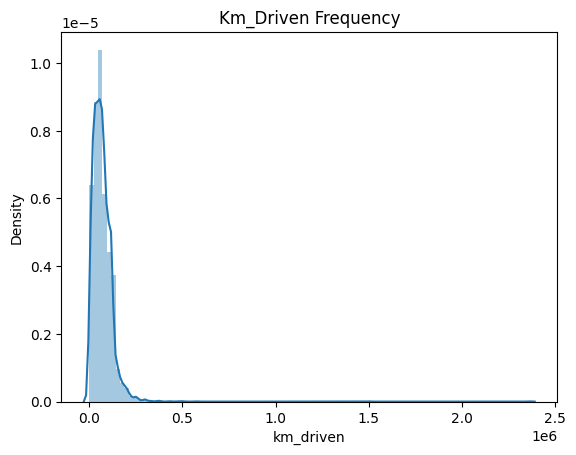

In [ ]:
cars_df_clean.year.value_counts().sort_values(axis = 0, ascending = False)
sns.distplot(cars_df_clean.km_driven, bins=100,kde= True).set(title='Km_Driven Frequency');

Km drive vs year

859
(7552, 18)


120000    480
70000     425
80000     410
60000     400
50000     368
         ... 
65300       1
39395       1
32500       1
248000      1
191000      1
Name: km_driven, Length: 874, dtype: int64

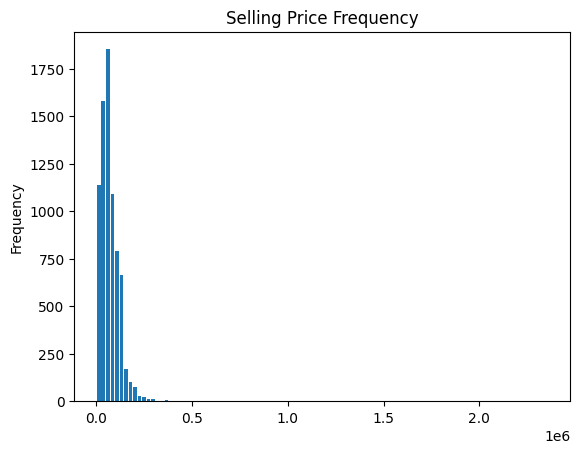

In [ ]:
cars_df_clean.km_driven.plot.hist(bins = 100, rwidth = 0.8).set_title('Selling Price Frequency')
print(cars_df_clean.km_driven.value_counts().between(0,100 ).sum())
print(cars_df_clean.shape)
cars_df_clean.km_driven.value_counts()

[Text(0.5, 1.0, 'Km_driven vs Selling Price')]

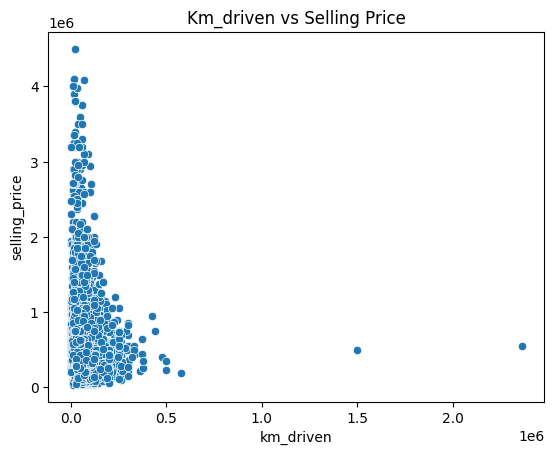

In [ ]:
sns.scatterplot(data= cars_df_clean, x='km_driven', y = 'selling_price' ).set(title='Km_driven vs Selling Price')

In [ ]:
cars_df_clean[cars_df_clean.km_driven >300000]

name  year  selling_price  \
998                        Maruti Wagon R LXI BS IV  2012         220000   
1629            Toyota Innova 2.5 V Diesel 7-seater  2010         450000   
1810                         Mahindra XUV500 W6 2WD  2012         500000   
2006    Toyota Innova 2.5 G (Diesel) 7 Seater BS IV  2011         650000   
2272                            Mahindra Bolero SLE  2010         260000   
3486                           Hyundai i20 Asta 1.2  2007         550000   
3508                       Maruti Wagon R LXI Minor  2010         194000   
3641                       Maruti Wagon R VXI BS IV  2011         229999   
3852                      Hyundai Sonata 2.4 GDi MT  2012         550000   
4570            Toyota Innova 2.5 V Diesel 8-seater  2006         370000   
5106                          Mahindra Scorpio M2DI  2011         400000   
5189         Toyota Innova 2.5 VX (Diesel) 7 Seater  2013         750000   
5467   Toyota Innova 2.5 VX (Diesel) 7 Seater BS IV  2010         950000   
5813                      Hyundai Sonata 2.4 GDi MT  2012         500000   
5871                            Mahindra Scorpio LX  2012         450000   
6200                     Mahindra Scorpio SLE BSIII  2011         400000   
6673  Toyota Innova 2.5 EV Diesel PS 7 Seater BSIII  2011         350000   
7102            Toyota Innova 2.5 V Diesel 8-seater  2007         350000   

      km_driven    fuel seller_type transmission                 owner  \
998      360003  Petrol  Individual       Manual          Second Owner   
1629     334000  Diesel  Individual       Manual           First Owner   
1810    1500000  Diesel  Individual       Manual           First Owner   
2006     375000  Diesel  Individual       Manual           First Owner   
2272     380000  Diesel  Individual       Manual          Second Owner   
3486    2360457  Petrol  Individual       Manual          Second Owner   
3508     577414  Petrol  Individual       Manual          Second Owner   
3641     500000  Petrol  Individual       Manual          Second Owner   
3852     330000  Petrol  Individual       Manual          Second Owner   
4570     305000  Diesel  Individual       Manual  Fourth & Above Owner   
5106     475000  Diesel  Individual       Manual           Third Owner   
5189     440000  Diesel  Individual       Manual          Second Owner   
5467     426000  Diesel  Individual       Manual           First Owner   
5813     330000  Petrol  Individual       Manual          Second Owner   
5871     370000  Diesel  Individual       Manual           First Owner   
6200     320000  Diesel  Individual       Manual           Third Owner   
6673     500000  Diesel  Individual       Manual          Second Owner   
7102     376412  Diesel  Individual       Manual          Second Owner   

         mileage   engine   max_power                     torque  seats  \
998    18.9 kmpl   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0   
1629   12.8 kmpl  2494 CC     102 bhp  20.4@ 1400-3400(kgm@ rpm)    7.0   
1810   15.1 kmpl  2179 CC     140 bhp        330Nm@ 1600-2800rpm    7.0   
2006   12.8 kmpl  2494 CC     102 bhp  20.4@ 1400-3400(kgm@ rpm)    8.0   
2272   13.6 kmpl  2523 CC      63 bhp     180 Nm at 1440-1500rpm    7.0   
3486   18.6 kmpl  1197 CC   81.83 bhp           114.7Nm@ 4000rpm    5.0   
3508   18.9 kmpl  1061 CC      67 bhp              84Nm@ 3500rpm    5.0   
3641   18.9 kmpl   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0   
3852  13.44 kmpl  2359 CC  198.25 bhp             250Nm@ 4250rpm    5.0   
4570   12.8 kmpl  2494 CC     102 bhp  20.4@ 1400-3400(kgm@ rpm)    8.0   
5106   13.5 kmpl  2179 CC     115 bhp      277.5Nm@ 1700-2200rpm    5.0   
5189  12.99 kmpl  2494 CC   100.6 bhp        200Nm@ 1400-3400rpm    7.0   
5467   12.8 kmpl  2494 CC     102 bhp  20.4@ 1400-3400(kgm@ rpm)    7.0   
5813  13.44 kmpl  2359 CC  198.25 bhp             250Nm@ 4250rpm    5.0   
5871  12.05 kmpl  2179 CC     120 bhp        290Nm@ 1800-2800rpm    9.

In [ ]:
# Determine how many cars we will drop for cutoff of >300K km (18)
cars_df_clean[cars_df_clean.km_driven >=300000].name.count()

26

(7552, 18)


(7526, 18)

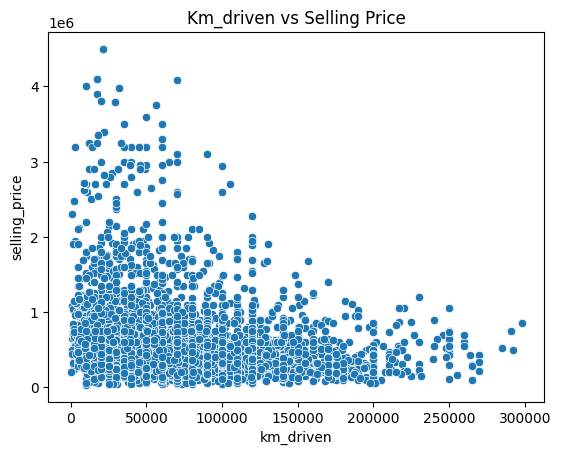

In [ ]:
print(cars_df_clean.shape)
cars_df_clean = cars_df_clean[cars_df_clean.km_driven <300000].copy()
sns.scatterplot(data= cars_df_clean, x='km_driven', y = 'selling_price' ).set(title='Km_driven vs Selling Price')
cars_df_clean.shape


In [ ]:
cars_df_clean.corr()

year  selling_price  km_driven     seats  engine_cc  \
year           1.000000       0.439927  -0.543746 -0.046676  -0.060290   
selling_price  0.439927       1.000000  -0.243652  0.118324   0.485651   
km_driven     -0.543746      -0.243652   1.000000  0.256938   0.269939   
seats         -0.046676       0.118324   0.256938  1.000000   0.631376   
engine_cc     -0.060290       0.485651   0.269939  0.631376   1.000000   
engine_hp      0.135825       0.739942   0.004304  0.224017   0.696022   
km_per_l       0.312099      -0.184072  -0.184384 -0.475229  -0.605168   

               engine_hp  km_per_l  
year            0.135825  0.312099  
selling_price   0.739942 -0.184072  
km_driven       0.004304 -0.184384  
seats           0.224017 -0.475229  
engine_cc       0.696022 -0.605168  
engine_hp       1.000000 -0.428448  
km_per_l       -0.428448  1.000000

##Manufacturer
> There are differences between manufacturers and the mean selling price
> Indented block





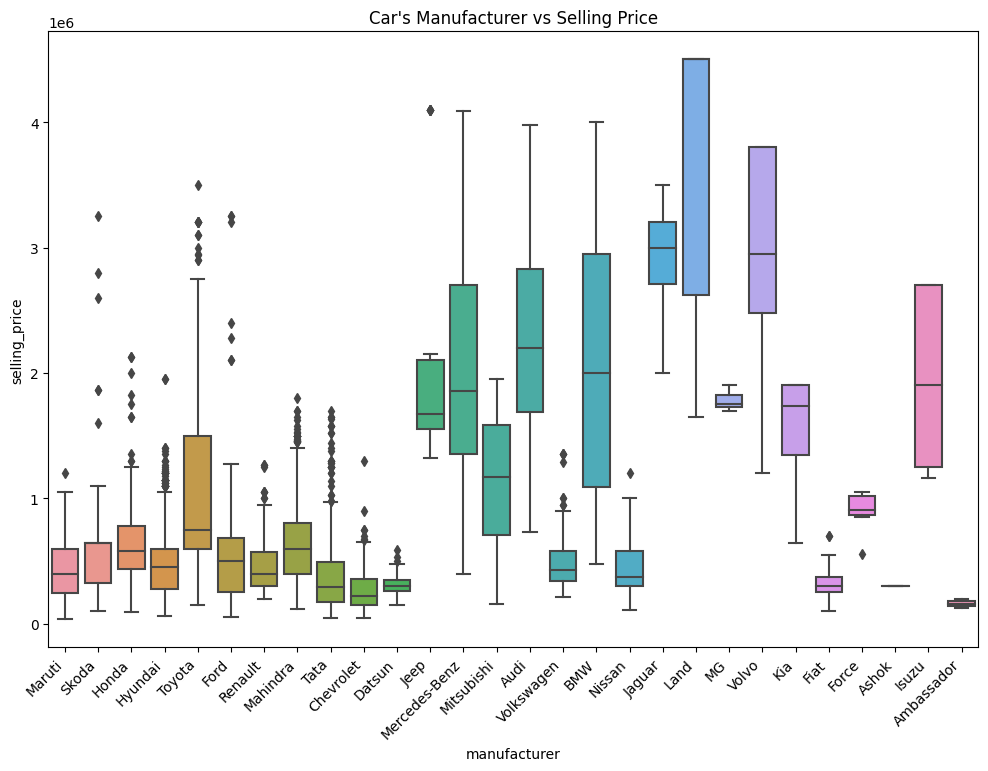

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data = cars_df_clean, x= 'manufacturer', y= cars_df_clean.selling_price)  
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment = 'right' )
ax.set(title="Car's Manufacturer vs Selling Price");




In [ ]:
cars_df_clean.manufacturer.value_counts()

Maruti           2219
Hyundai          1336
Mahindra          737
Tata              707
Honda             453
Toyota            432
Ford              380
Chevrolet         229
Renault           228
Volkswagen        185
Skoda             101
Nissan             81
Jaguar             71
Datsun             65
Volvo              64
BMW                47
Mercedes-Benz      45
Fiat               41
Audi               37
Jeep               31
Mitsubishi         10
Land                6
Force               6
Isuzu               5
Kia                 4
MG                  3
Ambassador          2
Ashok               1
Name: manufacturer, dtype: int64

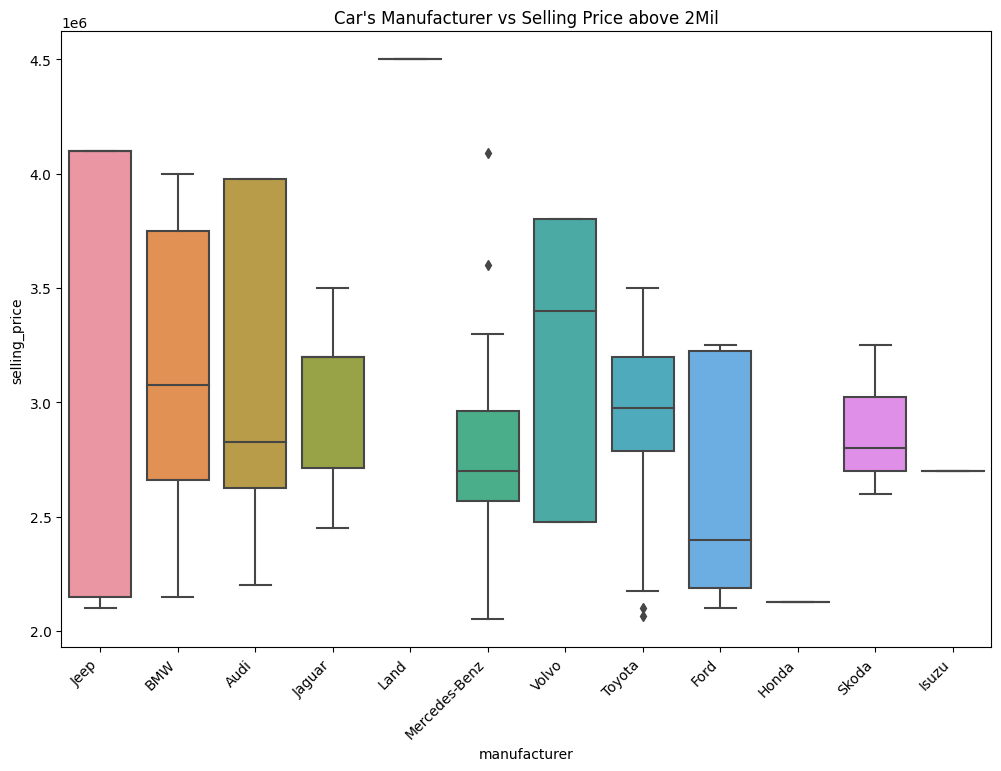

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data = cars_df_clean, x= cars_df_clean[cars_df_clean.selling_price> 2_000_000].manufacturer, y= cars_df_clean[cars_df_clean.selling_price> 2_000_000].selling_price)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment = 'right')
ax.set(title="Car's Manufacturer vs Selling Price above 2Mil");

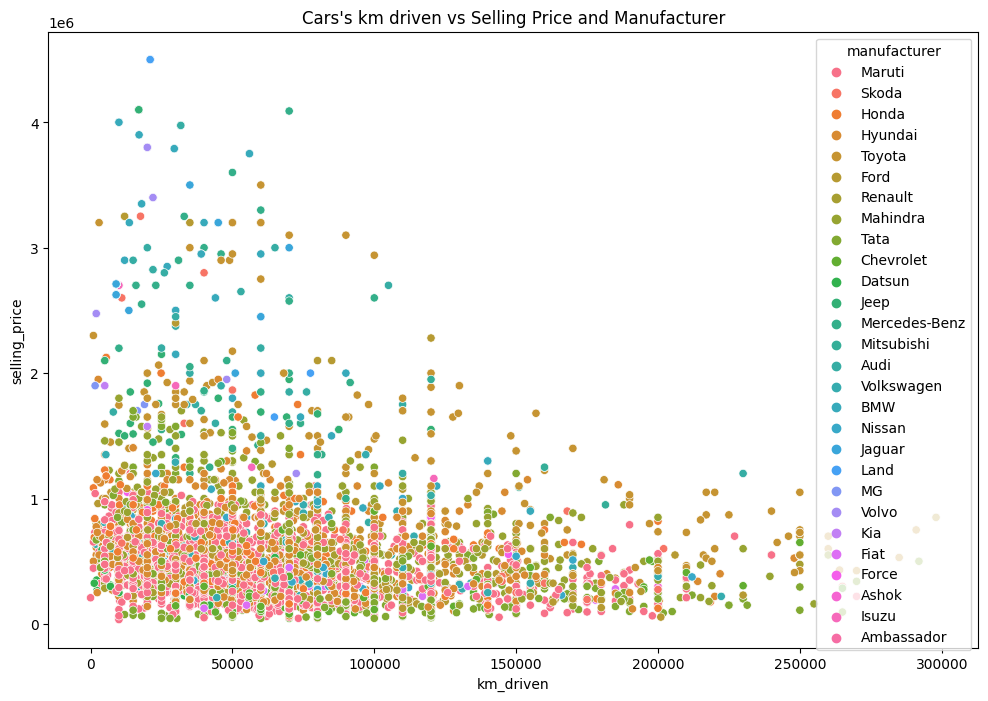

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data= cars_df_clean, x='km_driven', y = 'selling_price', hue= 'manufacturer').set(title="Cars's km driven vs Selling Price and Manufacturer") #, size=0.8, alpha=0.5 )
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment = 'right');


# Examine HP

> Higher Engine HP shows higher selling price





[Text(0.5, 1.0, "Cars's engine HP vs Selling Price")]

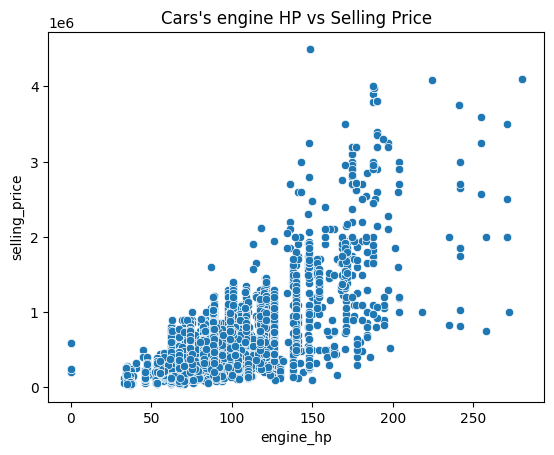

In [ ]:
sns.scatterplot(data= cars_df_clean, x='engine_hp', y = 'selling_price').set(title="Cars's engine HP vs Selling Price") #, hue= 'manufacturer') #, size=0.8, alpha=0.5 )

##Imputation : 
*   Find values for cars that have engine_hp = 0
*   Find correct values for cars having engine_hp outlier of 1248 

In [ ]:
cars_df_clean[cars_df_clean.engine_hp< 30]

name  year  selling_price  km_driven    fuel  \
575               Maruti Alto K10 LXI  2011         204999      97500  Petrol   
576               Maruti Alto K10 LXI  2011         204999      97500  Petrol   
1442  Maruti Swift Dzire VDI Optional  2017         589000      41232  Diesel   
1443  Maruti Swift Dzire VDI Optional  2017         589000      41232  Diesel   
2549   Tata Indica Vista Quadrajet LS  2012         240000      70000  Diesel   
2550   Tata Indica Vista Quadrajet LS  2012         240000      70000  Diesel   

     seller_type transmission        owner mileage engine max_power torque  \
575   Individual       Manual  First Owner     NaN    NaN         0    NaN   
576   Individual       Manual  First Owner     NaN    NaN         0    NaN   
1442      Dealer       Manual  First Owner     NaN    NaN         0    NaN   
1443      Dealer       Manual  First Owner     NaN    NaN         0    NaN   
2549  Individual       Manual  First Owner     NaN    NaN         0    NaN   
2550  Individual       Manual  First Owner     NaN    NaN         0    NaN   

      seats manufacturer   model  engine_cc  engine_hp  km_per_l  
575     NaN       Maruti    Alto        NaN        0.0       NaN  
576     NaN       Maruti    Alto        NaN        0.0       NaN  
1442    NaN       Maruti   Swift        NaN        0.0       NaN  
1443    NaN       Maruti   Swift        NaN        0.0       NaN  
2549    NaN         Tata  Indica        NaN        0.0       NaN  
2550    NaN         Tata  Indica        NaN        0.0       NaN

In [ ]:
cars_df_clean[(cars_df_clean.name == 'Maruti Alto K10 LXI')]
cars_df_clean[(cars_df_clean.name == 'Maruti Swift Dzire VDI Optional')]
cars_df_clean[(cars_df_clean.name == 'Tata Indica Vista Quadrajet LS')]

name  year  selling_price  km_driven    fuel  \
1613  Tata Indica Vista Quadrajet LS  2013         120000     120000  Diesel   
2549  Tata Indica Vista Quadrajet LS  2012         240000      70000  Diesel   
2550  Tata Indica Vista Quadrajet LS  2012         240000      70000  Diesel   
3923  Tata Indica Vista Quadrajet LS  2014         240000     168000  Diesel   
4155  Tata Indica Vista Quadrajet LS  2012         125000     120000  Diesel   
5606  Tata Indica Vista Quadrajet LS  2015         250000     155000  Diesel   

     seller_type transmission         owner    mileage   engine max_power  \
1613  Individual       Manual   First Owner  22.3 kmpl  1248 CC    74 bhp   
2549  Individual       Manual   First Owner        NaN      NaN         0   
2550  Individual       Manual   First Owner        NaN      NaN         0   
3923  Individual       Manual  Second Owner  22.3 kmpl  1248 CC    74 bhp   
4155  Individual       Manual   First Owner  22.3 kmpl  1248 CC    74 bhp   
5606  Individual       Manual  Second Owner  22.3 kmpl  1248 CC    74 bhp   

                   torque  seats manufacturer   model  engine_cc  engine_hp  \
1613  190Nm@ 1750-3000rpm    5.0         Tata  Indica     1248.0       74.0   
2549                  NaN    NaN         Tata  Indica        NaN        0.0   
2550                  NaN    NaN         Tata  Indica        NaN        0.0   
3923  190Nm@ 1750-3000rpm    5.0         Tata  Indica     1248.0       74.0   
4155  190Nm@ 1750-3000rpm    5.0         Tata  Indica     1248.0       74.0   
5606  190Nm@ 1750-3000rpm    5.0         Tata  Indica     1248.0       74.0   

      km_per_l  
1613      22.3  
2549       NaN  
2550       NaN  
3923      22.3  
4155      22.3  
5606      22.3

[Text(0.5, 1.0, "Cars's engine HP vs Selling Price")]

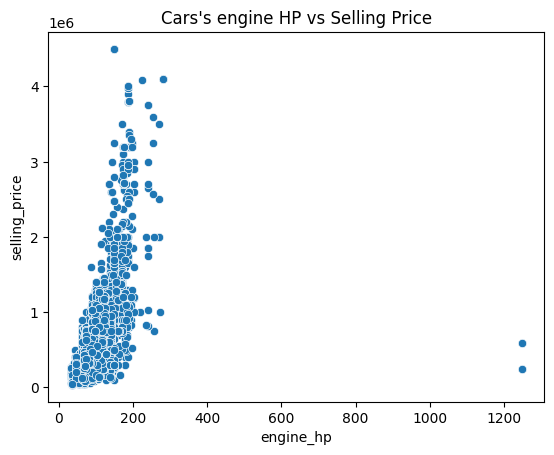

In [ ]:
#Data Imputation
cars_df_clean.loc[(cars_df_clean.index ==575) |(cars_df_clean.index ==576) ,'engine_hp' ] = 35
cars_df_clean.loc[(cars_df_clean.index ==1442) |(cars_df_clean.index ==1443) ,'engine_hp' ] = 1248
cars_df_clean.loc[(cars_df_clean.index ==2549) |(cars_df_clean.index ==2550) ,'engine_hp' ] = 1248
cars_df_clean[cars_df_clean.engine_hp< 30]
sns.scatterplot(data= cars_df_clean, x='engine_hp', y = 'selling_price').set(title="Cars's engine HP vs Selling Price") #, hue= 'manufacturer') #, size=0.8, alpha=0.5 )

#More data imputations

In [ ]:
cars_df_clean.engine_hp.sort_values(ascending = False).head(2)
cars_df_clean[cars_df_clean.engine_hp.sort_values(ascending = False) > 1200]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


name  year  selling_price  km_driven    fuel  \
1442  Maruti Swift Dzire VDI Optional  2017         589000      41232  Diesel   
1443  Maruti Swift Dzire VDI Optional  2017         589000      41232  Diesel   
2549   Tata Indica Vista Quadrajet LS  2012         240000      70000  Diesel   
2550   Tata Indica Vista Quadrajet LS  2012         240000      70000  Diesel   

     seller_type transmission        owner mileage engine max_power torque  \
1442      Dealer       Manual  First Owner     NaN    NaN         0    NaN   
1443      Dealer       Manual  First Owner     NaN    NaN         0    NaN   
2549  Individual       Manual  First Owner     NaN    NaN         0    NaN   
2550  Individual       Manual  First Owner     NaN    NaN         0    NaN   

      seats manufacturer   model  engine_cc  engine_hp  km_per_l  
1442    NaN       Maruti   Swift        NaN     1248.0       NaN  
1443    NaN       Maruti   Swift        NaN     1248.0       NaN  
2549    NaN         Tata  Indica        NaN     1248.0       NaN  
2550    NaN         Tata  Indica        NaN     1248.0       NaN

In [ ]:
cars_df_clean[cars_df_clean.name =='Maruti Swift Dzire VDI Optional'].head(4)	

name  year  selling_price  km_driven    fuel  \
1442  Maruti Swift Dzire VDI Optional  2017         589000      41232  Diesel   
1443  Maruti Swift Dzire VDI Optional  2017         589000      41232  Diesel   
2626  Maruti Swift Dzire VDI Optional  2015         525000      80000  Diesel   
3163  Maruti Swift Dzire VDI Optional  2017         589000      41232  Diesel   

     seller_type transmission        owner     mileage   engine max_power  \
1442      Dealer       Manual  First Owner         NaN      NaN         0   
1443      Dealer       Manual  First Owner         NaN      NaN         0   
2626  Individual       Manual  First Owner  26.59 kmpl  1248 CC    74 bhp   
3163      Dealer       Manual  First Owner  26.59 kmpl  1248 CC    74 bhp   

              torque  seats manufacturer  model  engine_cc  engine_hp  \
1442             NaN    NaN       Maruti  Swift        NaN     1248.0   
1443             NaN    NaN       Maruti  Swift        NaN     1248.0   
2626  190Nm@ 2000rpm    5.0       Maruti  Swift     1248.0       74.0   
3163  190Nm@ 2000rpm    5.0       Maruti  Swift     1248.0       74.0   

      km_per_l  
1442       NaN  
1443       NaN  
2626     26.59  
3163     26.59

In [ ]:
cars_df_clean[cars_df_clean.name =='Tata Indica Vista Quadrajet LS'].head(4)

name  year  selling_price  km_driven    fuel  \
1613  Tata Indica Vista Quadrajet LS  2013         120000     120000  Diesel   
2549  Tata Indica Vista Quadrajet LS  2012         240000      70000  Diesel   
2550  Tata Indica Vista Quadrajet LS  2012         240000      70000  Diesel   
3923  Tata Indica Vista Quadrajet LS  2014         240000     168000  Diesel   

     seller_type transmission         owner    mileage   engine max_power  \
1613  Individual       Manual   First Owner  22.3 kmpl  1248 CC    74 bhp   
2549  Individual       Manual   First Owner        NaN      NaN         0   
2550  Individual       Manual   First Owner        NaN      NaN         0   
3923  Individual       Manual  Second Owner  22.3 kmpl  1248 CC    74 bhp   

                   torque  seats manufacturer   model  engine_cc  engine_hp  \
1613  190Nm@ 1750-3000rpm    5.0         Tata  Indica     1248.0       74.0   
2549                  NaN    NaN         Tata  Indica        NaN     1248.0   
2550                  NaN    NaN         Tata  Indica        NaN     1248.0   
3923  190Nm@ 1750-3000rpm    5.0         Tata  Indica     1248.0       74.0   

      km_per_l  
1613      22.3  
2549       NaN  
2550       NaN  
3923      22.3

[Text(0.5, 1.0, "Cars's engine HP vs Selling Price")]

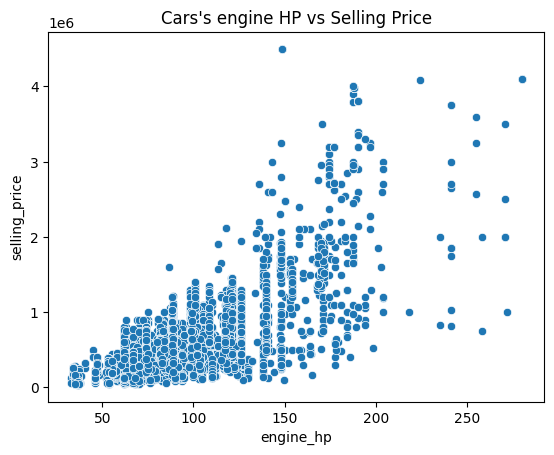

In [ ]:
cars_df_clean.loc[cars_df_clean.name =='Maruti Swift Dzire VDI Optional', 'engine_hp'] = 74.0
cars_df_clean.loc[cars_df_clean.name =='Maruti Swift Dzire VDI Optional', 'engine_cc'] = 1248.0
cars_df_clean.loc[cars_df_clean.name =='Tata Indica Vista Quadrajet LS', 'engine_hp'] = 74.0
cars_df_clean.loc[cars_df_clean.name =='Tata Indica Vista Quadrajet LS', 'engine_cc'] = 1248.0
sns.scatterplot(data= cars_df_clean, x='engine_hp', y = 'selling_price').set(title="Cars's engine HP vs Selling Price")

View relation between Engine_hp and Manufacturer


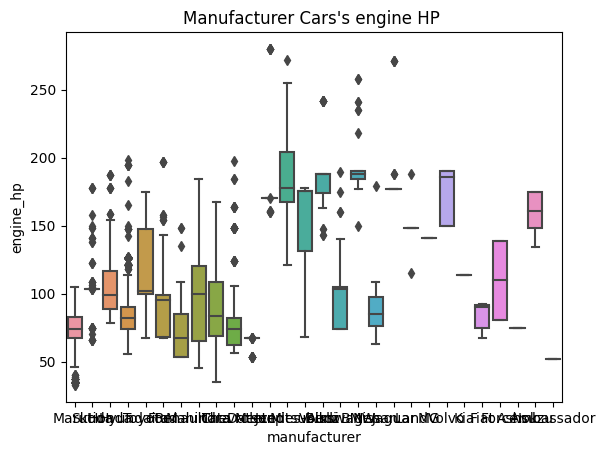

In [ ]:

ax = sns.boxplot(data = cars_df_clean, y= cars_df_clean.engine_hp, x= 'manufacturer' ).set(title="Manufacturer Cars's engine HP ")
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment = 'right');
# Not differentiating value for manufacturer

View EngineHP in context of Year and SellingPrice
> Higher engine_hp achieves higher price 



[Text(0.5, 1.0, 'Km driven vs Selling price and Engine HP')]

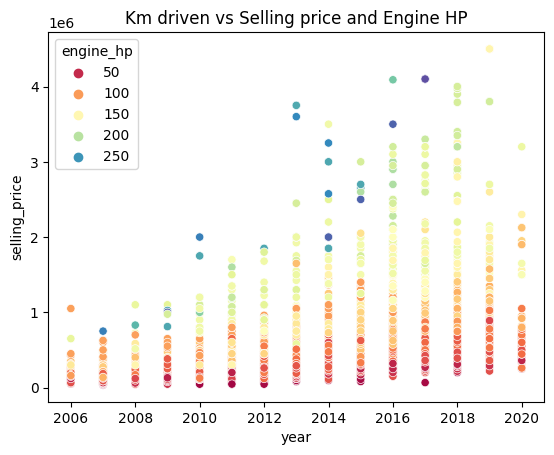

In [ ]:
sns.set_palette("bright")
sns.color_palette("husl", 8)

#sns.scatterplot(data= cars_df_clean, x='year', y = 'selling_price', hue = 'engine_hp', palette='viridis') #, hue= 'manufacturer') #, size=0.8, alpha=0.5 )
sns.scatterplot(data= cars_df_clean, x='year', y = 'selling_price', hue = 'engine_hp', palette='Spectral').set(title="Km driven vs Selling price and Engine HP") #, hue= 'manufacturer') #, size=0.8, alpha=0.5 )
#sns.scatterplot(data= cars_df_clean, x='year', y = 'selling_price', hue = 'engine_hp')
#Higher HP higher price

## Check on Engine CC

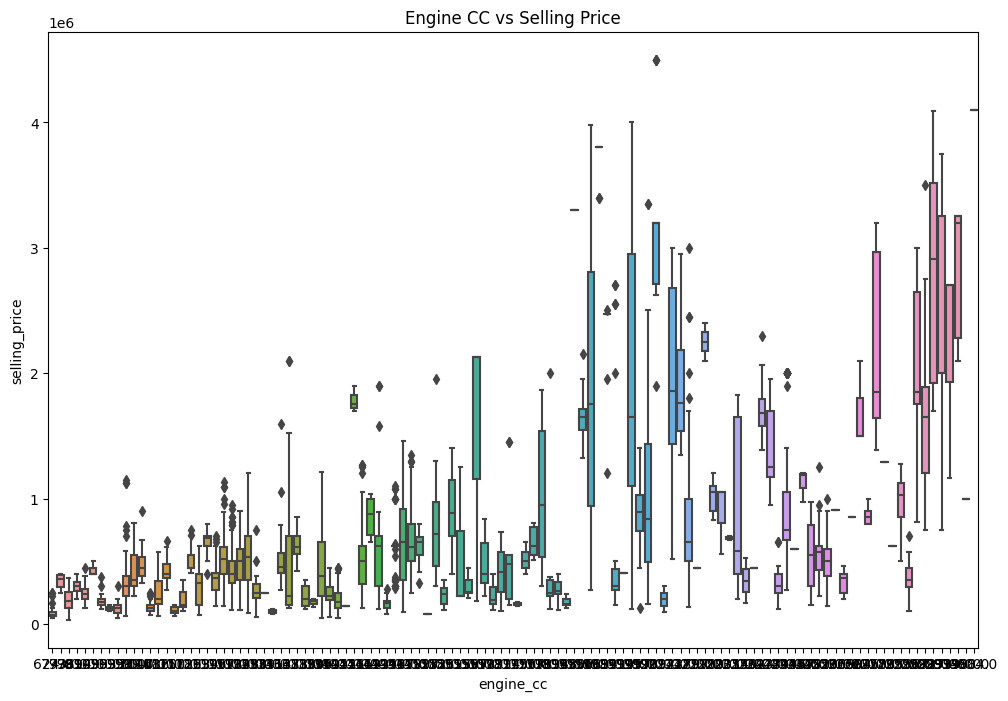

In [ ]:
#Check on Engine size
plt.figure(figsize=(12, 8))

#sns.boxplot(data = cars_df_clean, x= 'engine_cc', y= cars_df_clean.selling_price)
ax = sns.boxplot(data = cars_df_clean, x= 'engine_cc', y= cars_df_clean.selling_price).set(title="Engine CC vs Selling Price")
#ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment = 'right');

name  year  selling_price  km_driven  \
134      Jeep Wrangler 2016-2019 3.6 4X4  2017        4100000      17000   
1530  Ford Endeavour 3.2 Titanium AT 4X4  2018        3250000      12000   
1564     Jeep Wrangler 2016-2019 3.6 4X4  2017        4100000      17000   
1830  Ford Endeavour 3.2 Titanium AT 4X4  2018        3250000      12000   
1860     Jeep Wrangler 2016-2019 3.6 4X4  2017        4100000      17000   
1923  Ford Endeavour 3.2 Titanium AT 4X4  2016        2280000     120000   
3214  Ford Endeavour 3.2 Titanium AT 4X4  2016        2100000      80000   

        fuel seller_type transmission         owner     mileage   engine  \
134   Petrol  Individual    Automatic   First Owner    9.5 kmpl  3604 CC   
1530  Diesel  Individual    Automatic   First Owner  10.91 kmpl  3198 CC   
1564  Petrol  Individual    Automatic   First Owner    9.5 kmpl  3604 CC   
1830  Diesel  Individual    Automatic   First Owner  10.91 kmpl  3198 CC   
1860  Petrol  Individual    Automatic   First Owner    9.5 kmpl  3604 CC   
1923  Diesel  Individual    Automatic  Second Owner  10.91 kmpl  3198 CC   
3214  Diesel  Individual    Automatic   First Owner  10.91 kmpl  3198 CC   

     max_power               torque  seats manufacturer      model  engine_cc  \
134    280 bhp       347Nm@ 4300rpm    5.0         Jeep   Wrangler     3604.0   
1530   197 bhp  470Nm@ 1750-2500rpm    7.0         Ford  Endeavour     3198.0   
1564   280 bhp       347Nm@ 4300rpm    5.0         Jeep   Wrangler     3604.0   
1830   197 bhp  470Nm@ 1750-2500rpm    7.0         Ford  Endeavour     3198.0   
1860   280 bhp       347Nm@ 4300rpm    5.0         Jeep   Wrangler     3604.0   
1923   197 bhp  470Nm@ 1750-2500rpm    7.0         Ford  Endeavour     3198.0   
3214   197 bhp  470Nm@ 1750-2500rpm    7.0         Ford  Endeavour     3198.0   

      engine_hp  km_per_l  
134       280.0      9.50  
1530      197.0     10.91  
1564      280.0      9.50  
1830      197.0     10.91  
1860      280.0      9.50  
1923      197.0     10.91  
3214      197.0     10.91

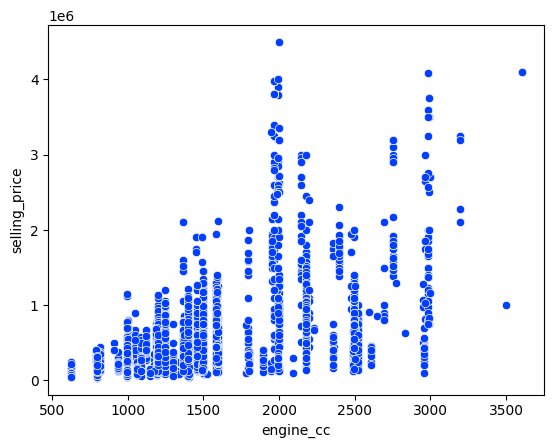

In [ ]:
sns.scatterplot(data= cars_df_clean, x='engine_cc', y = 'selling_price')#, hue = 'engine_hp', palette='Spectral') #, hue= 'manufacturer') #, size=0.8, alpha=0.5 )
cars_df_clean[cars_df_clean.engine_cc > 3000].head(7)

Engine CC tend to gather round specific values
> Outlier above 3000 CC => we choose to let model handle it


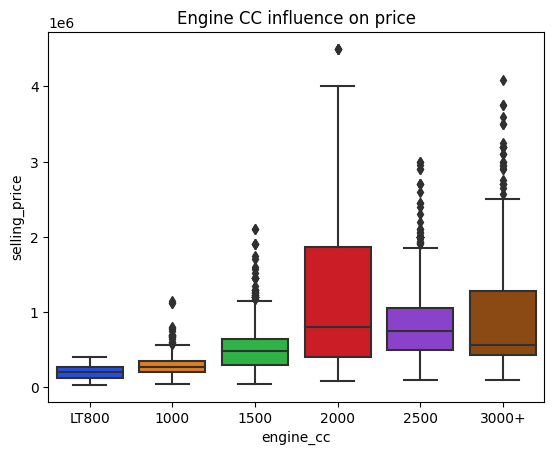

In [ ]:
#plt.figure(figsize=(12, 8))
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>Need to group into engine sizes  
lbl = ['LT800','1000' , '1500', '2000', '2500','3000+']
engine_size_groups = pd.cut(cars_df_clean.engine_cc, [  100 , 800, 1000, 1500, 2000, 2500, 3000], labels = lbl)
sns.boxplot(data=cars_df_clean, y= cars_df_clean.selling_price, x=engine_size_groups,).set(title='Engine CC influence on price');

237

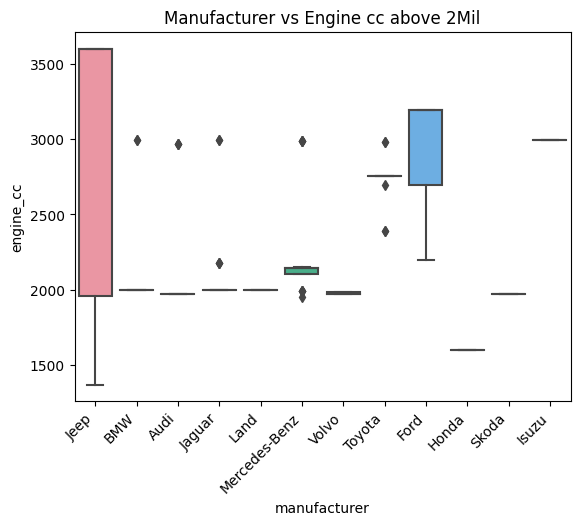

In [ ]:
#### Are high engine CC cars  expensive cars?
#plt.figure(figsize=(12, 8))
ax = sns.boxplot(data = cars_df_clean, y= cars_df_clean.engine_cc, x= cars_df_clean[cars_df_clean.selling_price> 2_000_000].manufacturer )#.set(title='Manufacturer vs Engine cc aselling above 2Mil');
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment = 'right')
ax.set(title='Manufacturer vs Engine cc above 2Mil');
cars_df_clean[cars_df_clean.selling_price> 2_000_000].name.count()
# Too little data => we choose not to pursue this check

In [ ]:
#Check what manufacturer has the larger engine
ax = sns.boxplot(data = cars_df_clean, y= cars_df_clean[cars_df_clean.engine_cc> 2_000].engine_cc, x= cars_df_clean.manufacturer )
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment = 'right')
ax.set(title='Manufacturer vs Engine cc above 2000cc');
cars_df_clean[cars_df_clean.engine_cc> 2_000].name.count()

1118


## check on car owner
> We drop Test Drive Car which has 2 entries



In [ ]:
cars_df_clean.owner.value_counts()

First Owner             5044
Second Owner            1899
Third Owner              455
Fourth & Above Owner     126
Test Drive Car             2
Name: owner, dtype: int64

In [ ]:
plt.figure(figsize=(9, 6))

sns.boxplot(data = cars_df_clean, x= 'owner', y= cars_df_clean.selling_price.clip(0,2_000_000) ).set(title='Owner vs Selling Price')


[Text(0.5, 1.0, 'Owner vs Selling Price')]

In [ ]:
#sns.scatterplot(data= cars_df_clean, x='km_driven', y = 'selling_price', hue='owner' )
cars_df_clean[cars_df_clean.owner =="Test Drive Car"]

name  year  selling_price  km_driven  \
4383  Volkswagen Vento 1.5 TDI Highline BSIV  2019        1350000       5400   
6220                          Honda Civic ZX  2019        2000000      24857   

        fuel seller_type transmission           owner     mileage   engine  \
4383  Diesel      Dealer       Manual  Test Drive Car  22.27 kmpl  1498 CC   
6220  Petrol      Dealer    Automatic  Test Drive Car   16.5 kmpl  1799 CC   

       max_power               torque  seats manufacturer  model  engine_cc  \
4383   108.6 bhp  250Nm@ 1500-3000rpm    5.0   Volkswagen  Vento     1498.0   
6220  139.46 bhp       174Nm@ 4300rpm    5.0        Honda  Civic     1799.0   

      engine_hp  km_per_l  
4383     108.60     22.27  
6220     139.46     16.50

Remove Test drive car 2 instances

In [ ]:
#checkme = cars_df_clean.copy()
print(cars_df_clean.shape)
cars_df_clean = cars_df_clean[cars_df_clean.owner != "Test Drive Car" ]
print(cars_df_clean.shape)
cars_df_clean.owner.value_counts()

(7526, 18)
(7524, 18)


First Owner             5044
Second Owner            1899
Third Owner              455
Fourth & Above Owner     126
Name: owner, dtype: int64

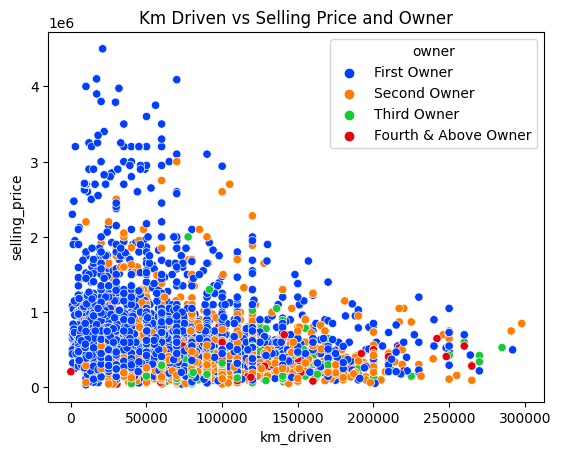

In [ ]:
sns.scatterplot(data= cars_df_clean, x='km_driven', y = 'selling_price', hue='owner' ).set(title='Km Driven vs Selling Price and Owner');
#Less owners => less km and perhaps better price

In [ ]:
cars_df_clean.corr()

year  selling_price  km_driven     seats  engine_cc  \
year           1.000000       0.439548  -0.543547 -0.046518  -0.060464   
selling_price  0.439548       1.000000  -0.243253  0.118625   0.485699   
km_driven     -0.543547      -0.243253   1.000000  0.256852   0.270145   
seats         -0.046518       0.118625   0.256852  1.000000   0.631463   
engine_cc     -0.060464       0.485699   0.270145  0.631463   1.000000   
engine_hp      0.135647       0.741216   0.004475  0.224184   0.696047   
km_per_l       0.312222      -0.184051  -0.184404 -0.475279  -0.605167   

               engine_hp  km_per_l  
year            0.135647  0.312222  
selling_price   0.741216 -0.184051  
km_driven       0.004475 -0.184404  
seats           0.224184 -0.475279  
engine_cc       0.696047 -0.605167  
engine_hp       1.000000 -0.428448  
km_per_l       -0.428448  1.000000

##Examine Fuel

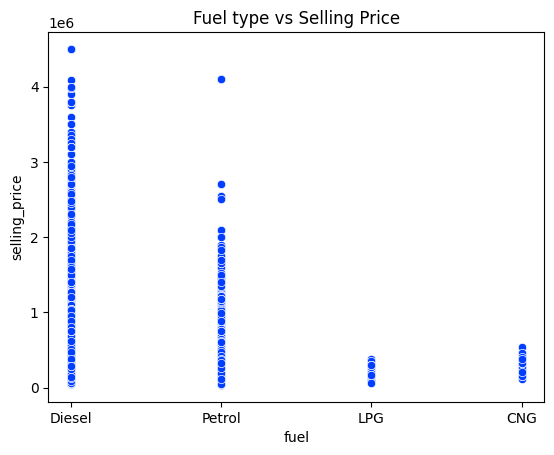

In [ ]:
sns.scatterplot(data= cars_df_clean, x='fuel', y = 'selling_price').set(title='Fuel type vs Selling Price');#, hue= 'fuel') #, size=0.8, alpha=0.5 )


Diesel    4152
Petrol    3286
CNG         52
LPG         34
Name: fuel, dtype: int64

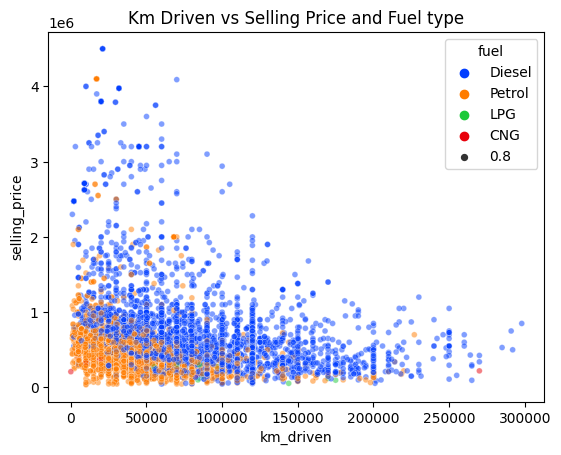

In [ ]:
sns.scatterplot(data= cars_df_clean, x='km_driven', y = 'selling_price', hue= 'fuel', size=0.8, alpha=0.5 ).set(title='Km Driven vs Selling Price and Fuel type');
cars_df_clean.fuel.value_counts()

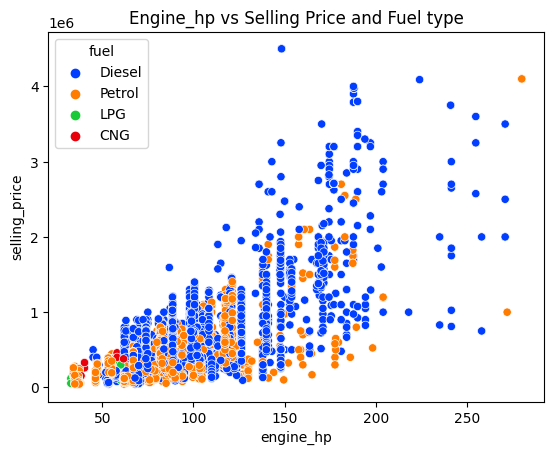

In [ ]:
sns.scatterplot(data= cars_df_clean, x='engine_hp', y = 'selling_price', hue= 'fuel').set(title='Engine_hp vs Selling Price and Fuel type'); #, size=0.8, alpha=0.5 )

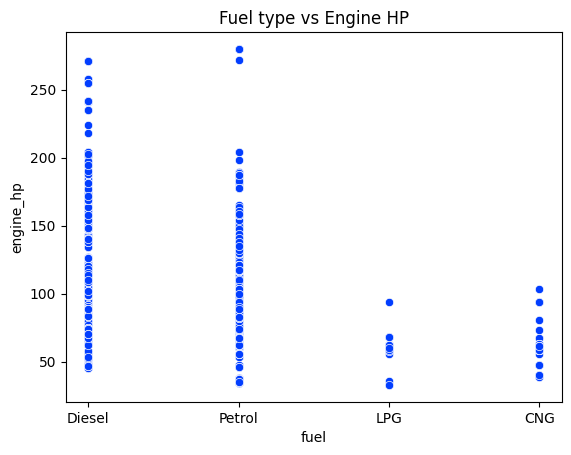

In [ ]:
sns.scatterplot(data= cars_df_clean, x='fuel', y = 'engine_hp').set(title='Fuel type vs Engine HP');#, hue= 'fuel') #, size=0.8, alpha=0.5 )

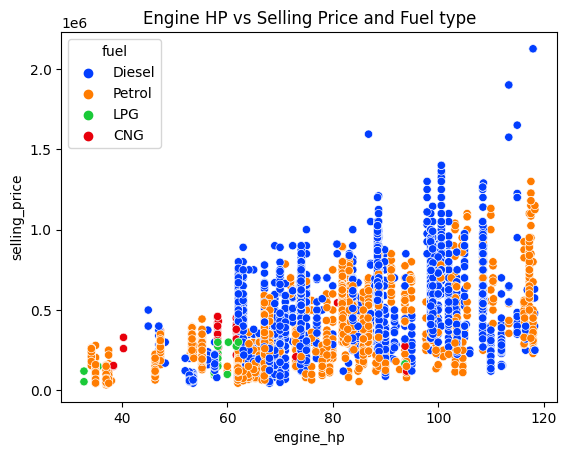

In [ ]:
sns.scatterplot(data= cars_df_clean, x=cars_df_clean[cars_df_clean.engine_hp<120].engine_hp, y = 'selling_price', hue= 'fuel').set(title='Engine HP vs Selling Price and Fuel type'); #, size=0.8, alpha=0.5 )


conclusion : Gas as fuel type has too few entries and it is not significant in price. we can discard these entries and use Petrol and Diesel as features

In [ ]:
#check if affects the correlation
cars_df_clean.corr()

year  selling_price  km_driven     seats  engine_cc  \
year           1.000000       0.439548  -0.543547 -0.046518  -0.060464   
selling_price  0.439548       1.000000  -0.243253  0.118625   0.485699   
km_driven     -0.543547      -0.243253   1.000000  0.256852   0.270145   
seats         -0.046518       0.118625   0.256852  1.000000   0.631463   
engine_cc     -0.060464       0.485699   0.270145  0.631463   1.000000   
engine_hp      0.135647       0.741216   0.004475  0.224184   0.696047   
km_per_l       0.312222      -0.184051  -0.184404 -0.475279  -0.605167   

               engine_hp  km_per_l  
year            0.135647  0.312222  
selling_price   0.741216 -0.184051  
km_driven       0.004475 -0.184404  
seats           0.224184 -0.475279  
engine_cc       0.696047 -0.605167  
engine_hp       1.000000 -0.428448  
km_per_l       -0.428448  1.000000

*   Fuel type Gas powers smaller engines 
*   Too few occurences for our regression model => decide to drop



In [ ]:
testme = cars_df_clean.copy()

cars_df_clean = cars_df_clean[(cars_df_clean.fuel== 'Diesel') | (cars_df_clean.fuel == 'Petrol')].copy() 
print(testme.shape,cars_df_clean.shape)
print(cars_df_clean.fuel.value_counts())
cars_df_clean.corr()

#same correlations

(7524, 18) (7438, 18)
Diesel    4152
Petrol    3286
Name: fuel, dtype: int64


year  selling_price  km_driven     seats  engine_cc  \
year           1.000000       0.440017  -0.544206 -0.047554  -0.063451   
selling_price  0.440017       1.000000  -0.243354  0.115883   0.483478   
km_driven     -0.544206      -0.243354   1.000000  0.258934   0.273611   
seats         -0.047554       0.115883   0.258934  1.000000   0.630578   
engine_cc     -0.063451       0.483478   0.273611  0.630578   1.000000   
engine_hp      0.135228       0.740828   0.005699  0.220327   0.693269   
km_per_l       0.311021      -0.184333  -0.183202 -0.478190  -0.608443   

               engine_hp  km_per_l  
year            0.135228  0.311021  
selling_price   0.740828 -0.184333  
km_driven       0.005699 -0.183202  
seats           0.220327 -0.478190  
engine_cc       0.693269 -0.608443  
engine_hp       1.000000 -0.428306  
km_per_l       -0.428306  1.000000

##Examine car seats

In [ ]:
print(cars_df_clean.seats.value_counts() )

5.0     5896
7.0     1094
8.0      220
9.0       79
4.0       62
6.0       62
10.0      16
2.0        2
14.0       1
Name: seats, dtype: int64


In [ ]:
####### who are the 2 seaters?
cars_df_clean[cars_df_clean.seats== 2] 
#drop them

name  year  selling_price  km_driven    fuel  \
5900   Mahindra Bolero Pik-Up FB 1.7T  2020         679000       5000  Diesel   
6629  Mahindra Bolero Pik-Up CBC 1.7T  2019         722000      80000  Diesel   

     seller_type transmission        owner   mileage   engine max_power  \
5900  Individual       Manual  First Owner  0.0 kmpl  2523 CC    70 bhp   
6629  Individual       Manual  First Owner  0.0 kmpl  2523 CC    70 bhp   

                   torque  seats manufacturer   model  engine_cc  engine_hp  \
5900  200Nm@ 1400-2200rpm    2.0     Mahindra  Bolero     2523.0       70.0   
6629  200Nm@ 1400-2200rpm    2.0     Mahindra  Bolero     2523.0       70.0   

      km_per_l  
5900       0.0  
6629       0.0

drop the 2 seaters and teh 14 seater as outliers

In [ ]:
#for safekeeping
keepme = cars_df_clean.copy()

#Remove teh 14 seater
print(cars_df_clean.shape)
cars_df_clean = cars_df_clean.drop(axis= 0, index = (cars_df_clean[cars_df_clean.seats== 14].index))
#Remove the 2 seaters
cars_df_clean = cars_df_clean.drop(axis= 0, index = (cars_df_clean[cars_df_clean.seats== 2].index))
print(cars_df_clean.seats.value_counts() )
cars_df_clean.shape

(7438, 18)
5.0     5896
7.0     1094
8.0      220
9.0       79
4.0       62
6.0       62
10.0      16
Name: seats, dtype: int64


(7435, 18)

[Text(0.5, 1.0, 'Number of Seats  vs Selling Price')]

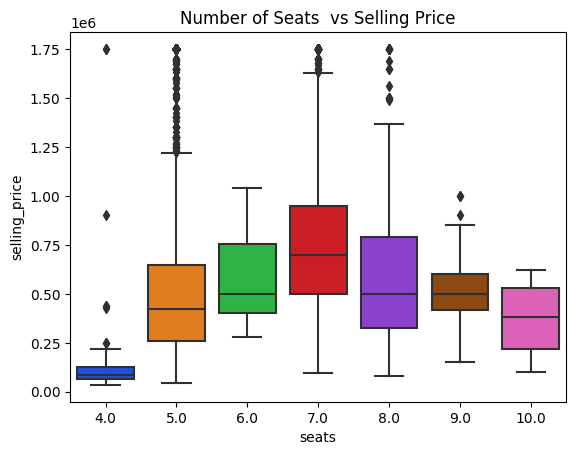

In [ ]:
sns.boxplot(data = cars_df_clean, x= 'seats', y= cars_df_clean.selling_price.clip(0,1_750_000)).set(title='Number of Seats  vs Selling Price')


[Text(0.5, 1.0, 'Engine HP vs Selling Price and Number of Seats')]

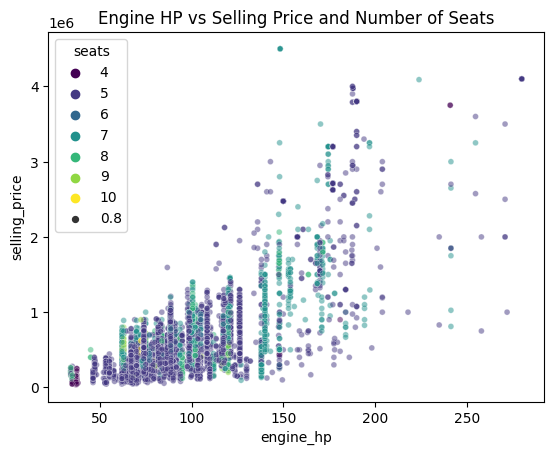

In [ ]:
#plt.figure(figsize=(12, 8))
sns.scatterplot(data= cars_df_clean, x='engine_hp', y = 'selling_price', hue= 'seats', palette='viridis', size=0.8, alpha=0.5).set(title='Engine HP vs Selling Price and Number of Seats') #, size=0.8, alpha=0.5 )


##Seats are not added to the model because of weak correlation

##Check on Transmission

In [ ]:
cars_df_clean.transmission.value_counts()

Manual       6521
Automatic     914
Name: transmission, dtype: int64

[Text(0.5, 1.0, 'Transmission vs Selling Price')]

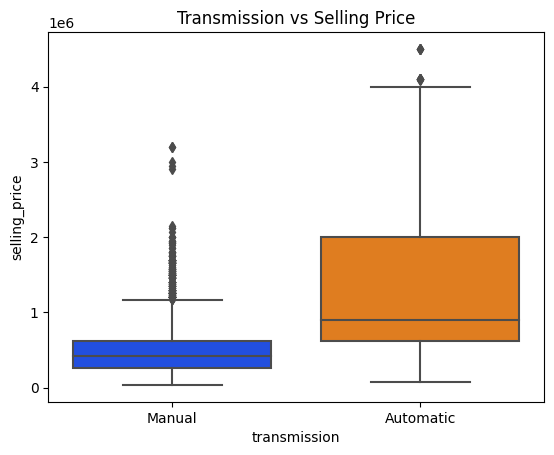

In [ ]:
sns.boxplot(data = cars_df_clean, x= 'transmission', y= 'selling_price' ).set(title='Transmission vs Selling Price')


[Text(0.5, 1.0, 'Year vs Selling Price and Transmssion type')]

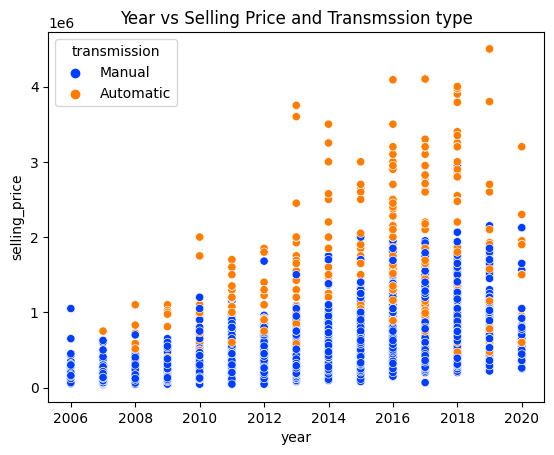

In [ ]:
sns.scatterplot(data= cars_df_clean, x='year', y = 'selling_price', hue= 'transmission').set(title='Year vs Selling Price and Transmssion type') #, size=0.8, alpha=0.5 )


*   Automatic tranmission more common in newer cars
*   Acrs with Automatic tranmission have higher sellling price



[Text(0.5, 1.0, 'Engine HP vs Selling Price and Transmssion type')]

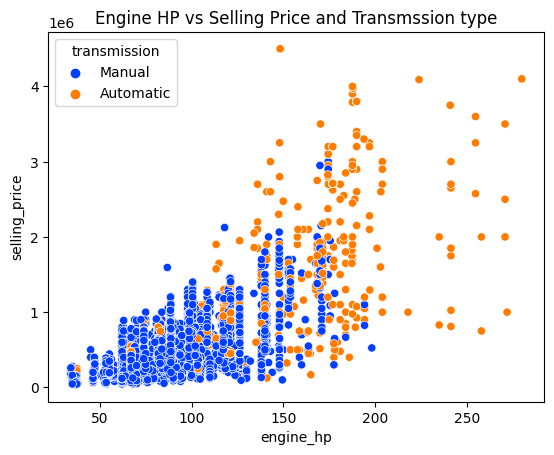

In [ ]:
sns.scatterplot(data= cars_df_clean, x='engine_hp', y = 'selling_price', hue= 'transmission').set(title='Engine HP vs Selling Price and Transmssion type') #, size=0.8, alpha=0.5 )
#sns.scatterplot(data= cars_df_clean, x=cars_df_clean[cars_df_clean.transmission == 'Automatic'].engine_hp, y = 'selling_price')

[Text(0.5, 1.0, 'Km Driven vs Selling Price and Transmssion type')]

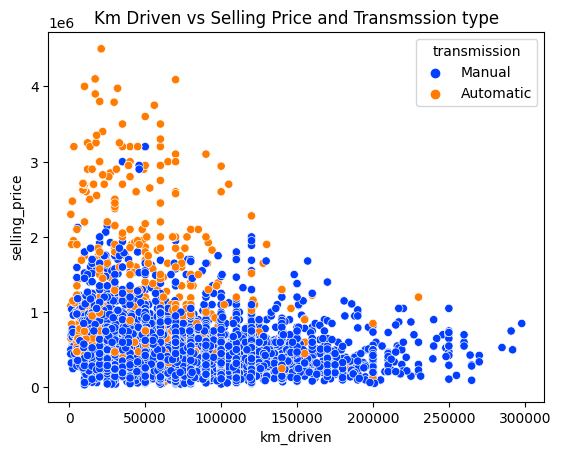

In [ ]:
#plt.figure(figsize=(12, 8))
sns.scatterplot(data= cars_df_clean, x='km_driven', y = 'selling_price', hue= 'transmission').set(title='Km Driven vs Selling Price and Transmssion type') #, size=0.8, alpha=0.5 )
#sns.scatterplot(data= cars_df_clean, x=cars_df_clean[cars_df_clean.transmission == 'Automatic'].km_driven, y = 'selling_price')
#Cars with Automatic tranmission have less km_driven (=>they are newer..!)

[Text(0.5, 1.0, 'Year vs Km driven and Transmssion type')]

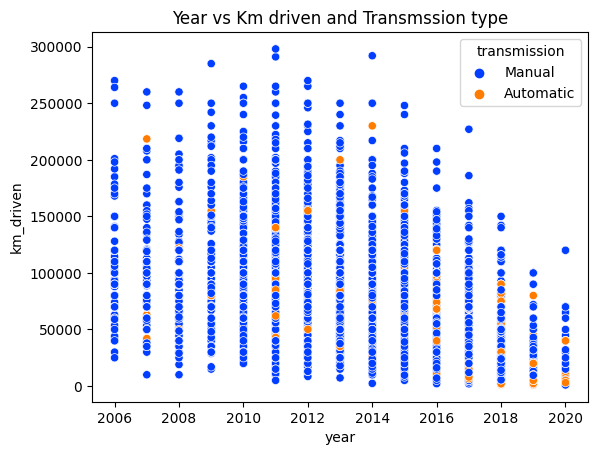

In [ ]:
sns.scatterplot(data= cars_df_clean, x='year', y = 'km_driven', hue= 'transmission').set(title='Year vs Km driven and Transmssion type') #, size=0.8, alpha=0.5 )
# Automatid tranmission is more frequent in latter years than earlier

##Check on Seller Type
conclusion : does influence the price ==> add as dummy

Individual          6208
Dealer               991
Trustmark Dealer     236
Name: seller_type, dtype: int64

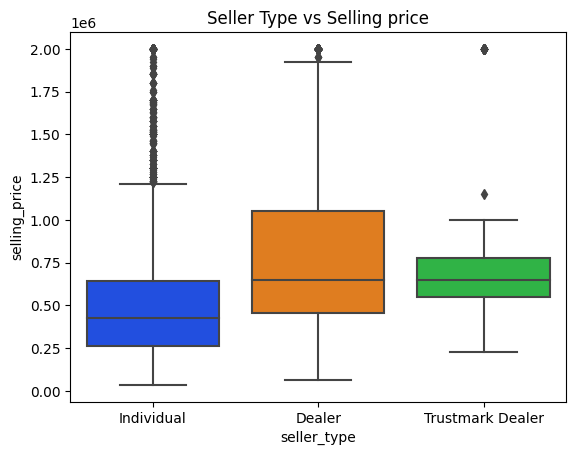

In [ ]:

sns.boxplot(data = cars_df_clean, x= 'seller_type', y= cars_df_clean.selling_price.clip(0,2_000_000)).set(title='Seller Type vs Selling price') 
cars_df_clean.seller_type.value_counts()

#Check on fuel consumption

*   List item
*   List item




Hyundai Santro Xing GL                               5
Hyundai Santro Xing (Non-AC)                         3
Mercedes-Benz M-Class ML 350 4Matic                  2
Volkswagen Polo GT TSI BSIV                          2
Tata Indica Vista Aura Safire Anniversary Edition    1
Land Rover Freelander 2 TD4 HSE                      1
Mercedes-Benz GLC 220d 4MATIC                        1
Name: name, dtype: int64

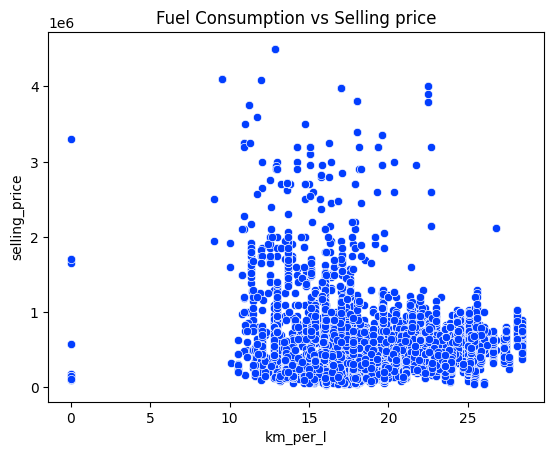

In [ ]:
sns.scatterplot(data= cars_df_clean, x='km_per_l', y = 'selling_price').set(title='Fuel Consumption vs Selling price')    # ', hue= 'transmission') #, size=0.8, alpha=0.5 )
cars_df_clean[cars_df_clean.km_per_l <5].name.value_counts()

## Data Imputation
Missing petrol consumption found from teh web

[Text(0.5, 1.0, 'Fuel Consumption vs Selling price')]

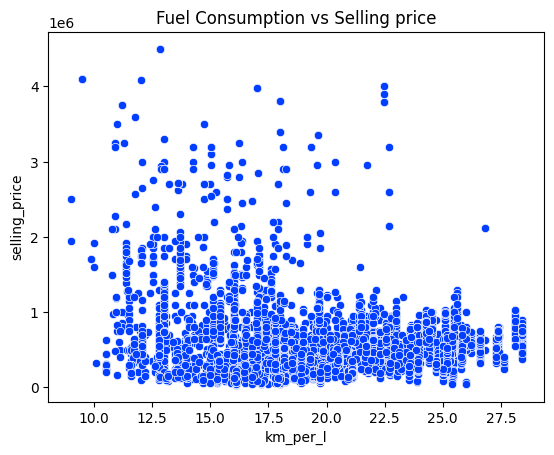

In [ ]:
cars_df_clean.loc[cars_df_clean.name =='Mercedes-Benz GLC 220d 4MATIC', 'km_per_l'] = 13.0
cars_df_clean.loc[cars_df_clean.name =='Hyundai Santro Xing GL', 'km_per_l'] = 12.8
cars_df_clean.loc[cars_df_clean.name =='Hyundai Santro Xing (Non-AC)', 'km_per_l'] = 17.92
cars_df_clean.loc[cars_df_clean.name =='Mercedes-Benz M-Class ML 350 4Matic','km_per_l'] = 9.88
cars_df_clean.loc[cars_df_clean.name =='Volkswagen Polo GT TSI BSIV','km_per_l'] = 17.21
cars_df_clean.loc[cars_df_clean.name =='Tata Indica Vista Aura Safire Anniversary Edition','km_per_l'] = 12.9
cars_df_clean.loc[cars_df_clean.name =='Land Rover Freelander 2 TD4 HSE', 'km_per_l'] = 15.15

sns.scatterplot(data= cars_df_clean, x='km_per_l', y = 'selling_price').set(title='Fuel Consumption vs Selling price')   # ', hue= 'transmission') #, size=0.8, alpha=0.5 )


##Final Further data cleanup

In [ ]:
#cars_df_clean.isna().value_counts()

In [ ]:
cars_df_clean.isna().value_counts()

name   year   selling_price  km_driven  fuel   seller_type  transmission  owner  mileage  engine  max_power  torque  seats  manufacturer  model  engine_cc  engine_hp  km_per_l
False  False  False          False      False  False        False         False  False    False   False      False   False  False         False  False      False      False       7429
                                                                                 True     True    False      True    True   False         False  False      False      True           4
                                                                                                                                                 True       False      True           2
dtype: int64

In [ ]:
cars_df_clean[cars_df_clean.km_per_l.isna() == True] 

name  year  selling_price  km_driven    fuel  \
575               Maruti Alto K10 LXI  2011         204999      97500  Petrol   
576               Maruti Alto K10 LXI  2011         204999      97500  Petrol   
1442  Maruti Swift Dzire VDI Optional  2017         589000      41232  Diesel   
1443  Maruti Swift Dzire VDI Optional  2017         589000      41232  Diesel   
2549   Tata Indica Vista Quadrajet LS  2012         240000      70000  Diesel   
2550   Tata Indica Vista Quadrajet LS  2012         240000      70000  Diesel   

     seller_type transmission        owner mileage engine max_power torque  \
575   Individual       Manual  First Owner     NaN    NaN         0    NaN   
576   Individual       Manual  First Owner     NaN    NaN         0    NaN   
1442      Dealer       Manual  First Owner     NaN    NaN         0    NaN   
1443      Dealer       Manual  First Owner     NaN    NaN         0    NaN   
2549  Individual       Manual  First Owner     NaN    NaN         0    NaN   
2550  Individual       Manual  First Owner     NaN    NaN         0    NaN   

      seats manufacturer   model  engine_cc  engine_hp  km_per_l  
575     NaN       Maruti    Alto        NaN       35.0       NaN  
576     NaN       Maruti    Alto        NaN       35.0       NaN  
1442    NaN       Maruti   Swift     1248.0       74.0       NaN  
1443    NaN       Maruti   Swift     1248.0       74.0       NaN  
2549    NaN         Tata  Indica     1248.0       74.0       NaN  
2550    NaN         Tata  Indica     1248.0       74.0       NaN

In [ ]:

cars_df_clean.loc[cars_df_clean.name =='Maruti Swift Dzire VDI Optional', 'km_per_l'] = 26.59
cars_df_clean.loc[cars_df_clean.name =='Maruti Swift Dzire VDI Optional', 'engine_cc'] = 1248
cars_df_clean.loc[cars_df_clean.name =='Maruti Swift Dzire VDI Optional', 'seats'] = 5

cars_df_clean.loc[cars_df_clean.name =='Maruti Alto K10 LXI', 'km_per_l'] = 24.07
cars_df_clean.loc[cars_df_clean.name =='Maruti Alto K10 LXI', 'engine_cc'] = 998
cars_df_clean.loc[cars_df_clean.name =='Maruti Alto K10 LXI', 'seats'] = 5

cars_df_clean.loc[cars_df_clean.name =='Tata Indica Vista Quadrajet LS', 'km_per_l'] = 22.3
cars_df_clean.loc[cars_df_clean.name =='Tata Indica Vista Quadrajet LS', 'engine_cc'] = 1248
cars_df_clean.loc[cars_df_clean.name =='Tata Indica Vista Quadrajet LS', 'seats'] = 5

In [ ]:
cars_df_clean.isna().value_counts()

name   year   selling_price  km_driven  fuel   seller_type  transmission  owner  mileage  engine  max_power  torque  seats  manufacturer  model  engine_cc  engine_hp  km_per_l
False  False  False          False      False  False        False         False  False    False   False      False   False  False         False  False      False      False       7429
                                                                                 True     True    False      True    False  False         False  False      False      False          6
dtype: int64

In [ ]:
cars_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7435 entries, 0 to 8127
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7435 non-null   object 
 1   year           7435 non-null   int64  
 2   selling_price  7435 non-null   int64  
 3   km_driven      7435 non-null   int64  
 4   fuel           7435 non-null   object 
 5   seller_type    7435 non-null   object 
 6   transmission   7435 non-null   object 
 7   owner          7435 non-null   object 
 8   mileage        7429 non-null   object 
 9   engine         7429 non-null   object 
 10  max_power      7435 non-null   object 
 11  torque         7429 non-null   object 
 12  seats          7435 non-null   float64
 13  manufacturer   7435 non-null   object 
 14  model          7435 non-null   object 
 15  engine_cc      7435 non-null   float64
 16  engine_hp      7435 non-null   float64
 17  km_per_l       7435 non-null   float64
dtypes: float

In [ ]:
#Remove unneessary columns of 
cars_df_clean2 = cars_df_clean.copy()

cars_df_clean2.drop('mileage' , axis =1, inplace = True)
cars_df_clean2.drop('engine' , axis =1, inplace = True)
cars_df_clean2.drop('max_power' , axis =1, inplace = True)
cars_df_clean2.drop('torque' , axis =1, inplace = True)

print(cars_df_clean.shape, cars_df_clean2.shape)

(7435, 18) (7435, 14)


In [ ]:
cars_df_clean2.isna().value_counts()

name   year   selling_price  km_driven  fuel   seller_type  transmission  owner  seats  manufacturer  model  engine_cc  engine_hp  km_per_l
False  False  False          False      False  False        False         False  False  False         False  False      False      False       7435
dtype: int64

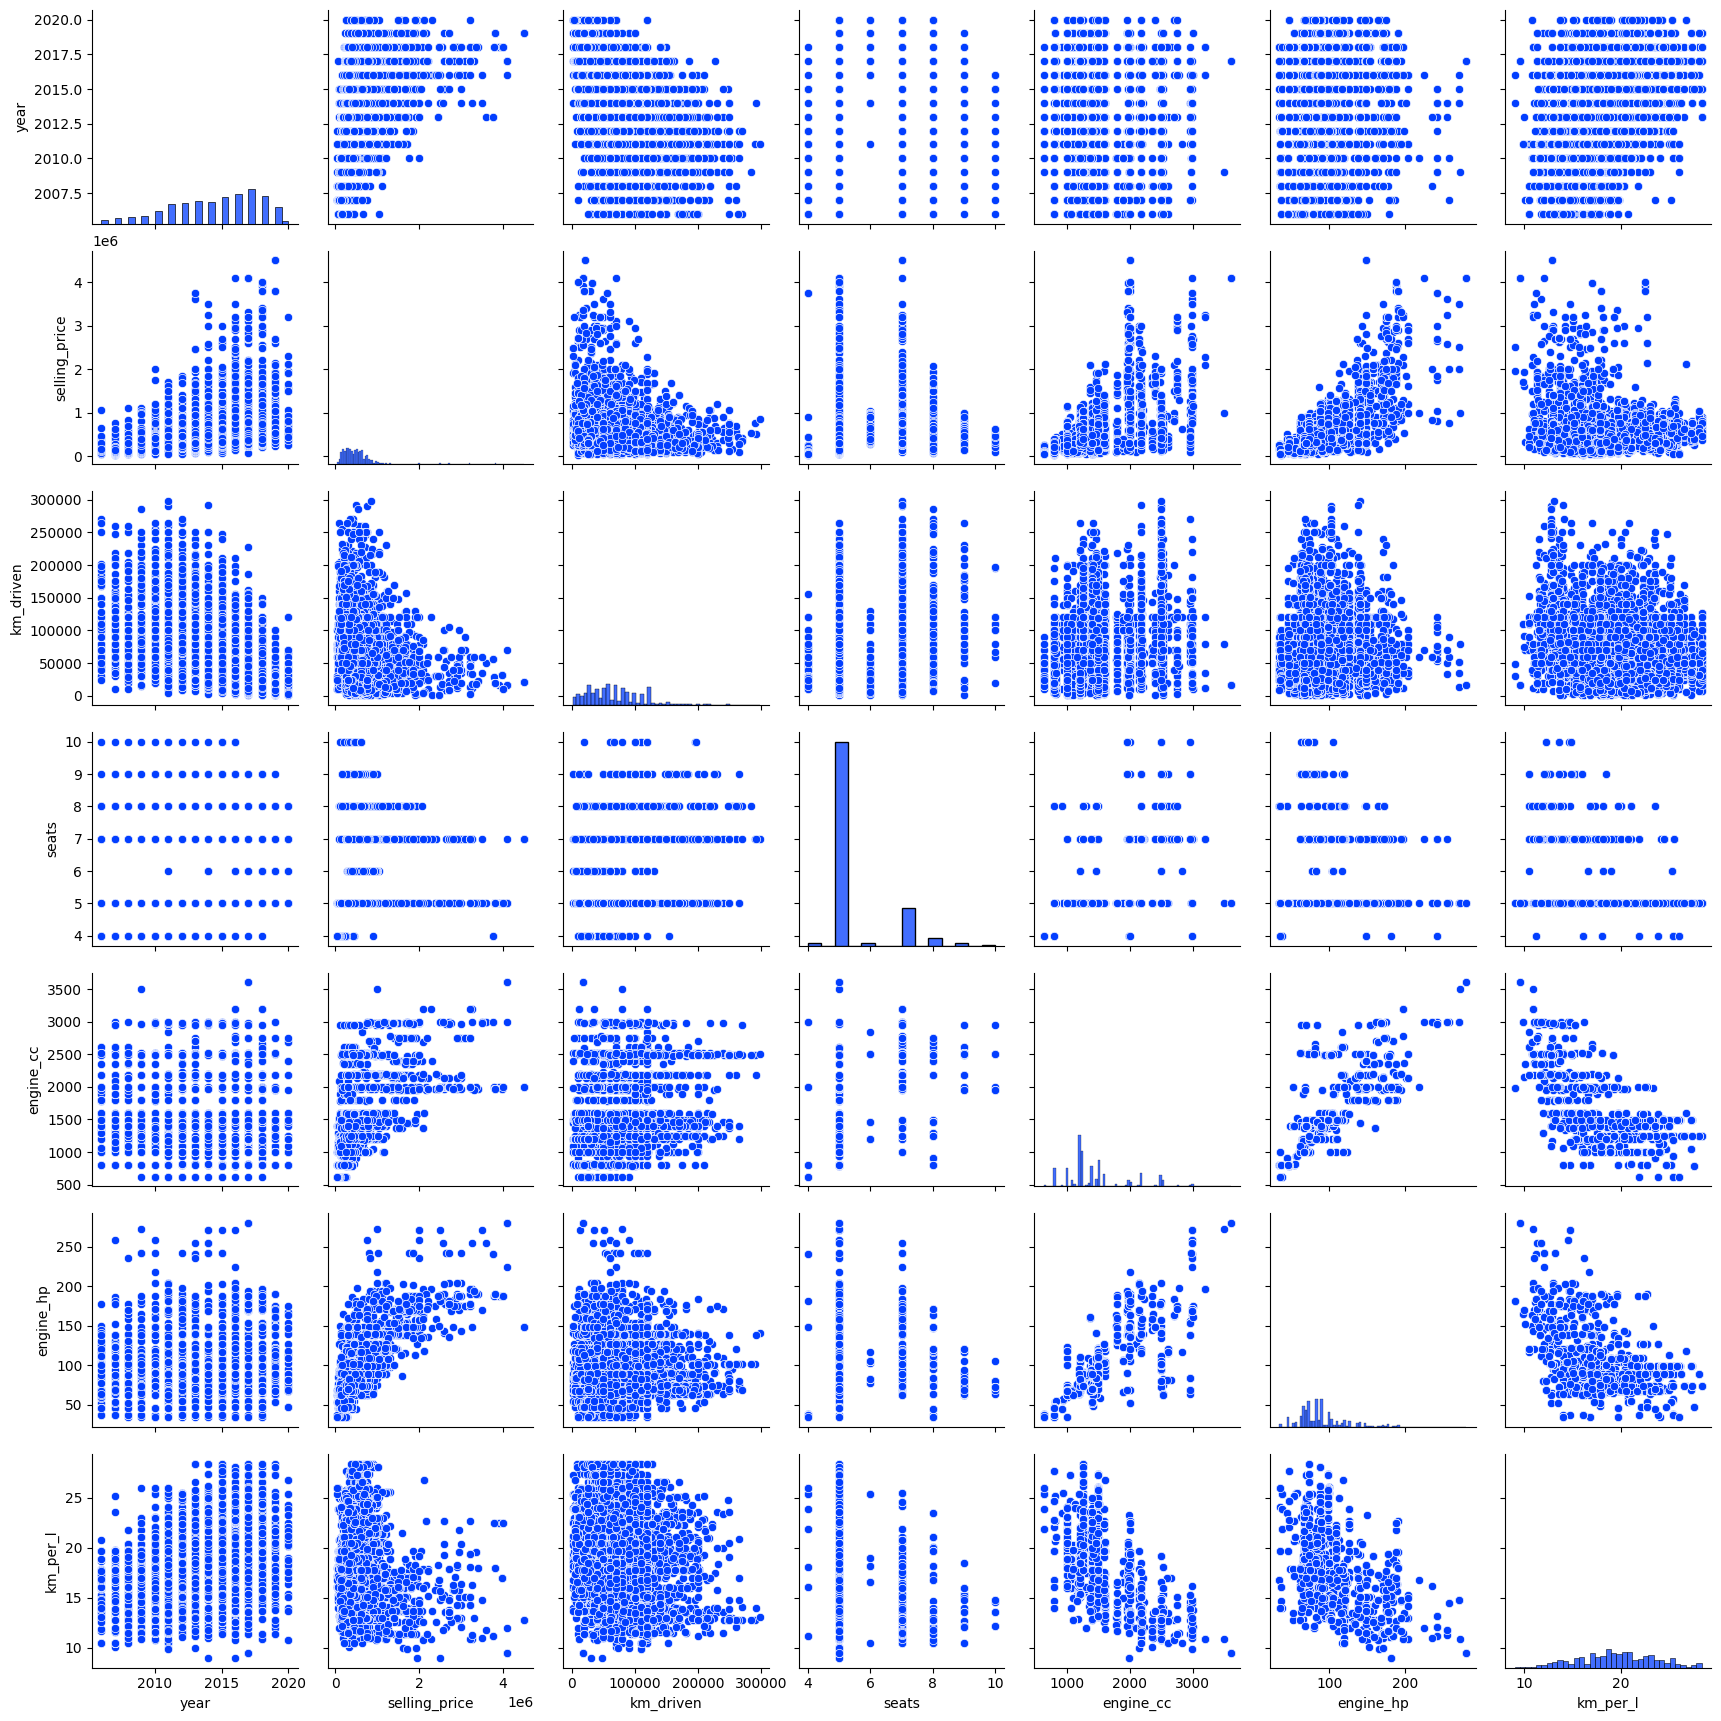

In [ ]:
sns.pairplot(cars_df_clean)

In [ ]:
cars_df_clean[cars_df_clean.engine_hp>3000]

Empty DataFrame
Columns: [name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque, seats, manufacturer, model, engine_cc, engine_hp, km_per_l]
Index: []

In [ ]:
cars_df_clean.manufacturer.value_counts()

Maruti           2154
Hyundai          1318
Mahindra          735
Tata              705
Honda             452
Toyota            432
Ford              380
Renault           228
Chevrolet         227
Volkswagen        184
Skoda             101
Nissan             81
Jaguar             71
Datsun             65
Volvo              64
BMW                47
Mercedes-Benz      45
Fiat               41
Audi               37
Jeep               31
Mitsubishi         10
Land                6
Force               6
Isuzu               5
Kia                 4
MG                  3
Ambassador          2
Ashok               1
Name: manufacturer, dtype: int64

In [ ]:
cars_df_clean[cars_df_clean.engine_cc> 3_600].name.count()

6

In [ ]:
cars_df_clean.describe()

year  selling_price      km_driven        seats    engine_cc  \
count  7435.000000   7.435000e+03    7435.000000  7435.000000  7435.000000   
mean   2014.285407   5.949635e+05   67702.226362     5.436315  1454.645057   
std       3.293964   5.605498e+05   44254.006215     0.951373   491.991813   
min    2006.000000   3.500000e+04    1000.000000     4.000000   624.000000   
25%    2012.000000   2.800000e+05   35000.000000     5.000000  1197.000000   
50%    2015.000000   4.650000e+05   60000.000000     5.000000  1248.000000   
75%    2017.000000   6.850000e+05   93000.000000     5.000000  1582.000000   
max    2020.000000   4.500000e+06  298000.000000    10.000000  3604.000000   

         engine_hp     km_per_l  
count  7435.000000  7435.000000  
mean     90.876155    19.576249  
std      32.703857     3.891793  
min      34.200000     9.000000  
25%      69.000000    17.000000  
50%      82.400000    19.600000  
75%     102.000000    22.540000  
max     280.000000    28.400000

##REGRESSION ... add the correlation

*   Target : selling_price
*   main : engine_hp
*   additional : year
*   additional : km_driven
*   additional : owner
*  additional: petrol
*  additional: geardrive (manual/automatic)
*  additional: Dealer
*  ############## Dummies  #######
*  additional: Seller Type
*  additional: transmssion
*  additional: Manufacturer
*  additional: fuel
*  additional: owner


Start with creating the dummise before splits

In [ ]:
cars_df_clean2.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'seats', 'manufacturer', 'model', 'engine_cc',
       'engine_hp', 'km_per_l'],
      dtype='object')

In [ ]:
# Categorical features >= dummy features
cars_df_reg1 = pd.get_dummies(cars_df_clean2, columns=['fuel','transmission', 'owner','seller_type', 'manufacturer'])
cars_df_reg1.head(2).T

0  \
name                          Maruti Swift Dzire VDI   
year                                            2014   
selling_price                                 450000   
km_driven                                     145500   
seats                                            5.0   
model                                          Swift   
engine_cc                                     1248.0   
engine_hp                                       74.0   
km_per_l                                        23.4   
fuel_Diesel                                        1   
fuel_Petrol                                        0   
transmission_Automatic                             0   
transmission_Manual                                1   
owner_First Owner                                  1   
owner_Fourth & Above Owner                         0   
owner_Second Owner                                 0   
owner_Third Owner                                  0   
seller_type_Dealer                                 0   
seller_type_Individual                             1   
seller_type_Trustmark Dealer                       0   
manufacturer_Ambassador                            0   
manufacturer_Ashok                                 0   
manufacturer_Audi                                  0   
manufacturer_BMW                                   0   
manufacturer_Chevrolet                             0   
manufacturer_Datsun                                0   
manufacturer_Fiat                                  0   
manufacturer_Force                                 0   
manufacturer_Ford                                  0   
manufacturer_Honda                                 0   
manufacturer_Hyundai                               0   
manufacturer_Isuzu                                 0   
manufacturer_Jaguar                                0   
manufacturer_Jeep                                  0   
manufacturer_Kia                                   0   
manufacturer_Land                                  0   
manufacturer_MG                                    0   
manufacturer_Mahindra                              0   
manufacturer_Maruti                                1   
manufacturer_Mercedes-Benz                         0   
manufacturer_Mitsubishi                            0   
manufacturer_Nissan                                0   
manufacturer_Renault                               0   
manufacturer_Skoda                                 0   
manufacturer_Tata                                  0   
manufacturer_Toyota                                0   
manufacturer_Volkswagen                            0   
manufacturer_Volvo                                 0   

                                                         1  
name                          Skoda Rapid 1.5 TDI Ambition  
year                                                  2014  
selling_price                                       370000  
km_driven                                           120000  
seats                                                  5.0  
model                                                Rapid  
engine_cc                                           1498.0  
engine_hp                                           103.52  
km_per_l                                             21.14  
fuel_Diesel                                              1  
fuel_Petrol                                              0  
transmission_Automatic                                   0  
transmission_Manual                                      1  
owner_First Owner                                        0  
owner_Fourth & Above Owner                               0  
owner_Second Owner                                       1  
owner_Third Owner                                        0  
seller_type_Dealer                                       0  
seller_type_Individual                                   1  
seller_type_Trustmark Dealer                             0  
manufacturer_Ambassador  

In [ ]:
cars_df_reg1.shape

(7435, 48)

In [ ]:
cars_df_reg1.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'seats', 'model',
       'engine_cc', 'engine_hp', 'km_per_l', 'fuel_Diesel', 'fuel_Petrol',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'manufacturer_Ambassador',
       'manufacturer_Ashok', 'manufacturer_Audi', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Force', 'manufacturer_Ford', 'manufacturer_Honda',
       'manufacturer_Hyundai', 'manufacturer_Isuzu', 'manufacturer_Jaguar',
       'manufacturer_Jeep', 'manufacturer_Kia', 'manufacturer_Land',
       'manufacturer_MG', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Mitsubishi',
       'manufacturer_Nissan', 'manufacturer_Renault', 'manufacturer_Skoda'

In [ ]:
cars_df_reg1.head(8).T

0  \
name                          Maruti Swift Dzire VDI   
year                                            2014   
selling_price                                 450000   
km_driven                                     145500   
seats                                            5.0   
model                                          Swift   
engine_cc                                     1248.0   
engine_hp                                       74.0   
km_per_l                                        23.4   
fuel_Diesel                                        1   
fuel_Petrol                                        0   
transmission_Automatic                             0   
transmission_Manual                                1   
owner_First Owner                                  1   
owner_Fourth & Above Owner                         0   
owner_Second Owner                                 0   
owner_Third Owner                                  0   
seller_type_Dealer                                 0   
seller_type_Individual                             1   
seller_type_Trustmark Dealer                       0   
manufacturer_Ambassador                            0   
manufacturer_Ashok                                 0   
manufacturer_Audi                                  0   
manufacturer_BMW                                   0   
manufacturer_Chevrolet                             0   
manufacturer_Datsun                                0   
manufacturer_Fiat                                  0   
manufacturer_Force                                 0   
manufacturer_Ford                                  0   
manufacturer_Honda                                 0   
manufacturer_Hyundai                               0   
manufacturer_Isuzu                                 0   
manufacturer_Jaguar                                0   
manufacturer_Jeep                                  0   
manufacturer_Kia                                   0   
manufacturer_Land                                  0   
manufacturer_MG                                    0   
manufacturer_Mahindra                              0   
manufacturer_Maruti                                1   
manufacturer_Mercedes-Benz                         0   
manufacturer_Mitsubishi                            0   
manufacturer_Nissan                                0   
manufacturer_Renault                               0   
manufacturer_Skoda                                 0   
manufacturer_Tata                                  0   
manufacturer_Toyota                                0   
manufacturer_Volkswagen                            0   
manufacturer_Volvo                                 0   

                                                         1  \
name                          Skoda Rapid 1.5 TDI Ambition   
year                                                  2014   
selling_price                                       370000   
km_driven                                           120000   
seats                                                  5.0   
model                                                Rapid   
engine_cc                                           1498.0   
engine_hp                                           103.52   
km_per_l                                             21.14   
fuel_Diesel                                              1   
fuel_Petrol                                              0   
transmission_Automatic                                   0   
transmission_Manual                                      1   
owner_First Owner                                        0   
owner_Fourth & Above Owner                               0   
owner_Second Owner                                       1   
owner_Third Owner                                        0   
seller_type_Dealer                                       0   
seller_type_Individual                                   1   
seller_type_Trustmark Dealer                             0   
manu

## Start analysis

In [ ]:
saveme = cars_df_reg1.copy()

In [ ]:
cars_df_reg1.shape
cars_df_reg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7435 entries, 0 to 8127
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          7435 non-null   object 
 1   year                          7435 non-null   int64  
 2   selling_price                 7435 non-null   int64  
 3   km_driven                     7435 non-null   int64  
 4   seats                         7435 non-null   float64
 5   model                         7435 non-null   object 
 6   engine_cc                     7435 non-null   float64
 7   engine_hp                     7435 non-null   float64
 8   km_per_l                      7435 non-null   float64
 9   fuel_Diesel                   7435 non-null   uint8  
 10  fuel_Petrol                   7435 non-null   uint8  
 11  transmission_Automatic        7435 non-null   uint8  
 12  transmission_Manual           7435 non-null   uint8  
 13  own

### Split the dataframe to TRAIN VALIDATION and TEST


In [ ]:
# Split the dataframe to TRAIN VALIDATION Aand TEST

cars_train,  cars_test = train_test_split ( cars_df_reg1, test_size = 0.3, random_state = 1234) 
cars_valid, cars_test = train_test_split(cars_test, train_size=0.5, random_state=1234)
del cars_df_reg1
saveme.shape, cars_train.shape, cars_test.shape, cars_valid.shape

((7435, 48), (5204, 48), (1116, 48), (1115, 48))

Build our first model

> Indented block
We will use the engine_hp which seems to habvet the highest correlation


In [ ]:
dtr1 = DecisionTreeRegressor()
dtr1.fit(cars_train[['engine_hp']] ,cars_train['selling_price'])

cars_train['predict1'] = dtr1.predict(cars_train[['engine_hp']])
cars_valid['predict1'] = dtr1.predict(cars_valid[['engine_hp']])

print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict1):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict1):>10.2f}')
dtr1.tree_.max_depth, dtr1.tree_.n_leaves

#dtr1.feature_importances_
# train rmse:  189861.91
# valid rmse:  277075.62
# (17, 278)

train rmse:  189861.91
valid rmse:  277075.62


(17, 278)

This seems like overfitting, rmse valid double that of train, and => 278 leave and 12 levels
we will try limiting the number of leaves, max_depth
dtr2 = DecisionTreeRegressor(min_samples_split=20, min_samples_leaf=5)

In [ ]:
cars_train.selling_price.std()

562320.4130630374

In [ ]:
dtr2 = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=5)
dtr2.fit(cars_train[['engine_hp']] ,cars_train['selling_price'])

cars_train['predict2'] = dtr2.predict(cars_train[['engine_hp']])
cars_valid['predict2'] = dtr2.predict(cars_valid[['engine_hp']])

print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict2):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict2):>10.2f}')

print(dtr2.tree_.max_depth, dtr2.tree_.n_leaves)
# train rmse:  222695.20
# valid rmse:  262514.11
# 15 177

train rmse:  222695.20
valid rmse:  262514.11
15 177


rmse similar but seems like still too many levels and leaves : 15 level and 177 leaves

In [ ]:
dtr3 = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10)
dtr3.fit(cars_train[['engine_hp']] ,cars_train['selling_price'])

cars_train['predict3'] = dtr3.predict(cars_train[['engine_hp']])
cars_valid['predict3'] = dtr3.predict(cars_valid[['engine_hp']])

print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict3):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict3):>10.2f}')

print(dtr3.tree_.max_depth, dtr3.tree_.n_leaves)

# train rmse:  238039.01
# valid rmse:  268254.90
# 14 125

train rmse:  238039.01
valid rmse:  268254.90
14 125


check on max_depth:

################# max_depth =10 train rmse: 196770.11 valid rmse: 280249.05 ;; 10 189
################# max_depth =5 train rmse: 256957.02 valid rmse: 284827.60 ;; 5 30
################# max_depth =9 train rmse: 203768.78 valid rmse: 286758.80 9 153

In [ ]:
#dtr4 = DecisionTreeRegressor(max_depth = 9)
#dtr4 = DecisionTreeRegressor(max_depth = 9, ccp_alpha= 5_000_000)
dtr4 = DecisionTreeRegressor(max_depth = 9, ccp_alpha= 3_000_000)
dtr4.fit(cars_train[['engine_hp']] ,cars_train['selling_price'])

cars_train['predict4'] = dtr4.predict(cars_train[['engine_hp']])
cars_valid['predict4'] = dtr4.predict(cars_valid[['engine_hp']])

print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict4):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict4):>10.2f}')

print(dtr4.tree_.max_depth, dtr4.tree_.n_leaves)
# train rmse:  203820.92
# valid rmse:  286997.82
# 9 133

train rmse:  203820.92
valid rmse:  286997.82
9 133


In [ ]:
dtr5 = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, ccp_alpha= 5_000_000)
#dtr5 = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, ccp_alpha= 3_000_000)
dtr5.fit(cars_train[['engine_hp']] ,cars_train['selling_price'])

cars_train['predict5'] = dtr5.predict(cars_train[['engine_hp']])
cars_valid['predict5'] = dtr5.predict(cars_valid[['engine_hp']])

print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict5):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict5):>10.2f}')

print(dtr5.tree_.max_depth, dtr5.tree_.n_leaves)
# train rmse:  238082.07
# valid rmse:  268296.73
# 13 110

train rmse:  238082.07
valid rmse:  268296.73
13 110


In [ ]:
cars_df_clean.selling_price.min()

35000

.set(title='Engine CC influence on price');
ax = sns.boxplot(data = cars_df_clean, y= cars_df_clean[cars_df_clean.engine_cc> 2_000].engine_cc, x= cars_df_clean.manufacturer )
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment = 'right');

## Actual vs. predicted plot

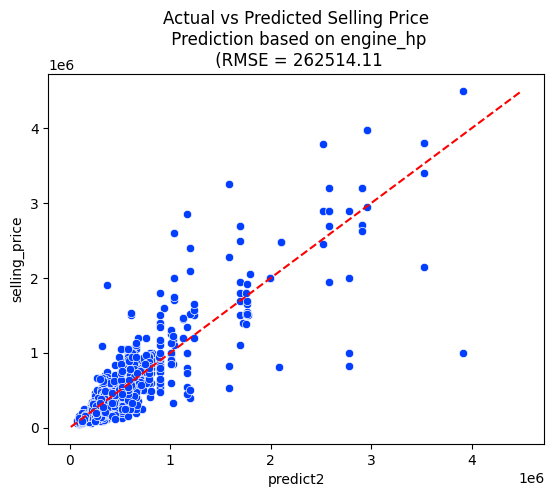

In [ ]:
sns.scatterplot(data=cars_valid,x='predict2', y='selling_price').set(title='Actual vs Predicted Selling Price\n Prediction based on engine_hp\n (RMSE = 262514.11');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

Best for engine_hp only


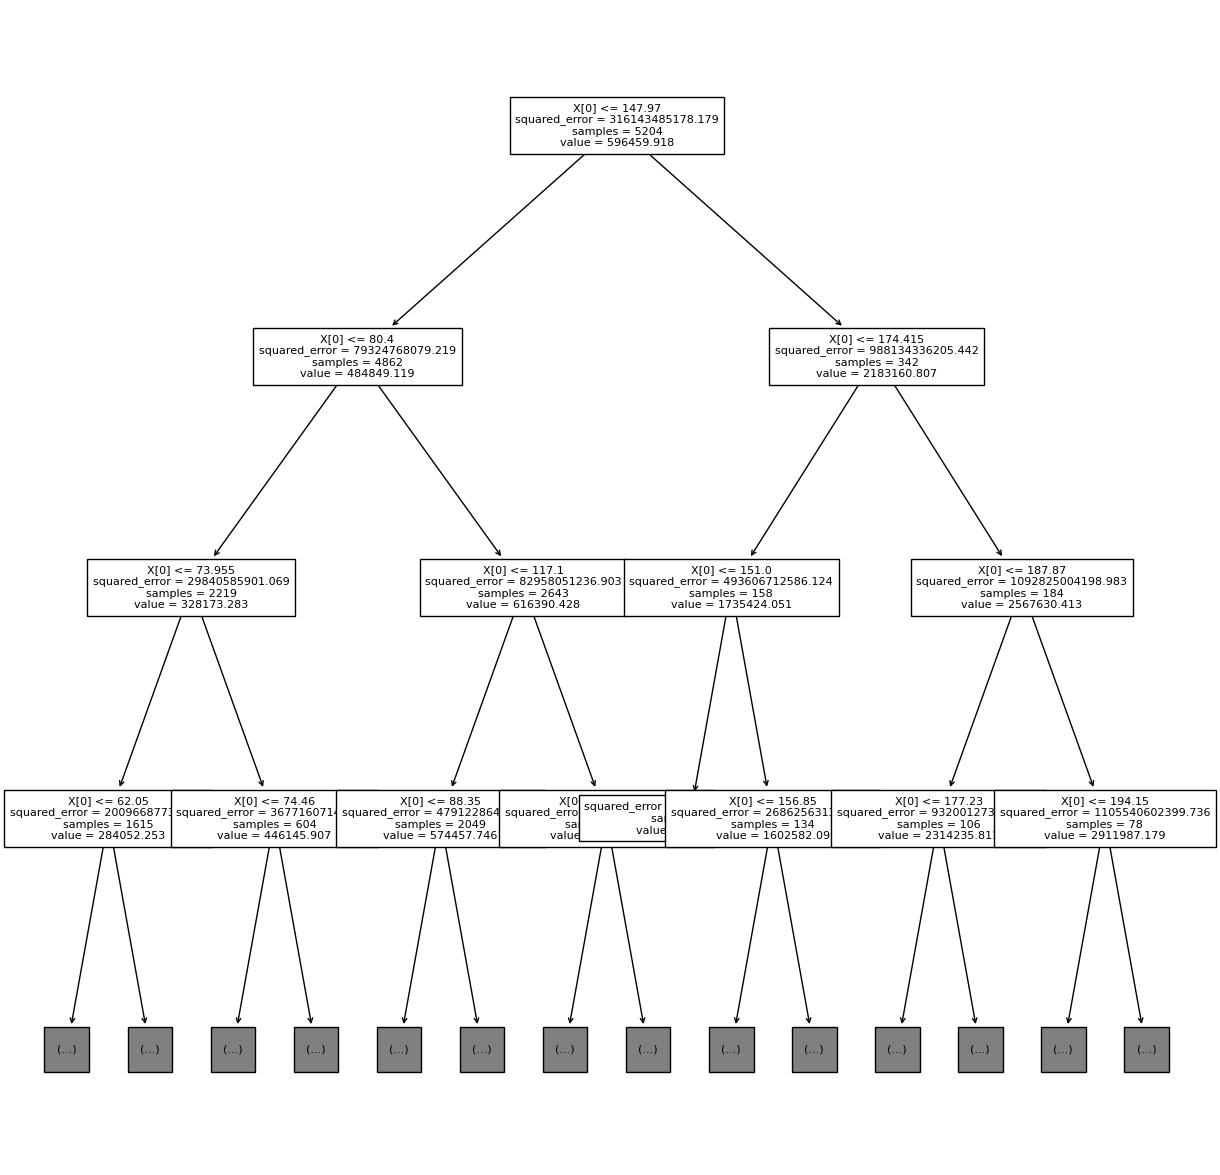

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(dtr5, max_depth=3, fontsize=8);

On single feature of HP 
(min_samples_split=30, min_samples_leaf=10, ccp_alpha= 5_000_000

*   (min_samples_split=30, min_samples_leaf=10, ccp_alpha= 5_000_000
*   train rmse:  238082.07
valid rmse:  268296.73
13 110

Next combine year

## cobine YEAR with engine_hp to  price

In [ ]:
cars_df_clean.corr()

year  selling_price  km_driven     seats  engine_cc  \
year           1.000000       0.440040  -0.544328 -0.044679  -0.064008   
selling_price  0.440040       1.000000  -0.243413  0.117821   0.483895   
km_driven     -0.544328      -0.243413   1.000000  0.260697   0.274014   
seats         -0.044679       0.117821   0.260697  1.000000   0.636508   
engine_cc     -0.064008       0.483895   0.274014  0.636508   1.000000   
engine_hp      0.135564       0.740923   0.005601  0.221550   0.694244   
km_per_l       0.313125      -0.189180  -0.189395 -0.500067  -0.622864   

               engine_hp  km_per_l  
year            0.135564  0.313125  
selling_price   0.740923 -0.189180  
km_driven       0.005601 -0.189395  
seats           0.221550 -0.500067  
engine_cc       0.694244 -0.622864  
engine_hp       1.000000 -0.441477  
km_per_l       -0.441477  1.000000

In [ ]:
dtr_2f1 = DecisionTreeRegressor()
dtr_2f1.fit(cars_train[['year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_2f1'] = dtr_2f1.predict(cars_train[['year', 'engine_hp']])
cars_valid['predict_2f1'] = dtr_2f1.predict(cars_valid[['year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_2f1):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_2f1):>10.2f}')

print(dtr_2f1.tree_.max_depth, dtr_2f1.tree_.n_leaves)
dtr_2f1.feature_importances_

# train rmse:   90945.24
# valid rmse:  170711.87
# 19 1033
# array([0.19404763, 0.80595237])

train rmse:   90945.24
valid rmse:  174106.19
19 1033


array([0.19662102, 0.80337898])

In [ ]:
dtr_2f2 = DecisionTreeRegressor(max_depth= 9, ccp_alpha= 5e6)
dtr_2f2.fit(cars_train[['year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_2f2'] = dtr_2f2.predict(cars_train[['year', 'engine_hp']])
cars_valid['predict_2f2'] = dtr_2f2.predict(cars_valid[['year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_2f2):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_2f2):>10.2f}')

print(dtr_2f2.tree_.max_depth, dtr_2f2.tree_.n_leaves)
dtr_2f2.feature_importances_

# train rmse:  116850.57
# valid rmse:  168779.29
# 9 220
# array([0.19594121, 0.80405879])

train rmse:  116850.57
valid rmse:  171636.51
9 220


array([0.19620928, 0.80379072])

In [ ]:
dtr_2f3 = DecisionTreeRegressor(max_depth= 8, ccp_alpha= 5e6)
dtr_2f3.fit(cars_train[['year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_2f3'] = dtr_2f3.predict(cars_train[['year', 'engine_hp']])
cars_valid['predict_2f3'] = dtr_2f3.predict(cars_valid[['year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_2f3):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_2f3):>10.2f}')

print(dtr_2f3.tree_.max_depth, dtr_2f3.tree_.n_leaves)
dtr_2f3.feature_importances_

# train rmse:  129377.96
# valid rmse:  166474.55
# 8 157
# array([0.19716385, 0.80283615])

train rmse:  129377.96
valid rmse:  166653.58
8 157


array([0.19555045, 0.80444955])

In [ ]:
dtr_2f4 = DecisionTreeRegressor(max_depth= 6)
dtr_2f4.fit(cars_train[['year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_2f4'] = dtr_2f4.predict(cars_train[['year', 'engine_hp']])
cars_valid['predict_2f4'] = dtr_2f4.predict(cars_valid[['year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_2f4):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_2f4):>10.2f}')

print(dtr_2f4.tree_.max_depth, dtr_2f4.tree_.n_leaves)
dtr_2f4.feature_importances_

# train rmse:  167257.66
# valid rmse:  188125.02
# 6 60
# array([0.19532445, 0.80467555])

train rmse:  167257.66
valid rmse:  188125.02
6 60


array([0.19358405, 0.80641595])

Summary by Max Depth:


train rmse:   90945.24
valid rmse:  174280.15
19 1033
array([0.19451331, 0.80548669])
*   List item
dtr_2f2 = DecisionTreeRegressor(max_depth= 9)
train rmse:  116241.31
valid rmse:  172855.61
9 296
array([0.19638986, 0.80361014])


1.   List item
dtr_2f3 = DecisionTreeRegressor(max_depth= 8)
train rmse:  116241.31
valid rmse:  172855.61
9 296
array([0.19638986, 0.80361014])
1.   Depth 8:
train rmse:  129186.74
valid rmse:  167030.39
8 181
array([0.19547815, 0.80452185])


*   Depyh 7
train rmse:  148418.78
valid rmse:  174745.88
7 106
array([0.19566663, 0.80433337])
array([0.19547815, 0.80452185])
*   Depth 6
train rmse:  167257.66
valid rmse:  187962.22
6 60
array([0.19544552, 0.80455448])
Best is Depth 8 (year and engine_hp)
*   Best is Depth 8 (year and engine_hp)










In [ ]:
dtr_2f5 = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=15, ccp_alpha= 5_000_000)
dtr_2f5.fit(cars_train[['year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_2f5'] = dtr_2f5.predict(cars_train[['year', 'engine_hp']])
cars_valid['predict_2f5'] = dtr_2f5.predict(cars_valid[['year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_2f5):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_2f5):>10.2f}')

print(dtr_2f5.tree_.max_depth, dtr_2f5.tree_.n_leaves)
dtr_2f5.feature_importances_
#checked 30: 20   30:15  with/out ccp_alpha

# train rmse:  166948.79
# valid rmse:  167440.66
# 12 156
# array([0.19594693, 0.80405307])

train rmse:  166948.79
valid rmse:  167440.66
12 156


array([0.19594693, 0.80405307])

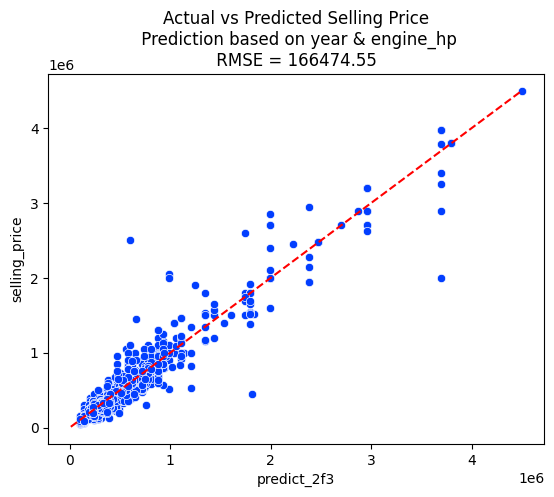

In [ ]:
sns.scatterplot(data=cars_valid,x='predict_2f3', y='selling_price').set(title='Actual vs Predicted Selling Price\n Prediction based on year & engine_hp\n RMSE = 166474.55 ');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

## cobine km driven with price

In [ ]:
cars_df_clean.corr()

year  selling_price  km_driven     seats  engine_cc  \
year           1.000000       0.440040  -0.544328 -0.044679  -0.064008   
selling_price  0.440040       1.000000  -0.243413  0.117821   0.483895   
km_driven     -0.544328      -0.243413   1.000000  0.260697   0.274014   
seats         -0.044679       0.117821   0.260697  1.000000   0.636508   
engine_cc     -0.064008       0.483895   0.274014  0.636508   1.000000   
engine_hp      0.135564       0.740923   0.005601  0.221550   0.694244   
km_per_l       0.313125      -0.189180  -0.189395 -0.500067  -0.622864   

               engine_hp  km_per_l  
year            0.135564  0.313125  
selling_price   0.740923 -0.189180  
km_driven       0.005601 -0.189395  
seats           0.221550 -0.500067  
engine_cc       0.694244 -0.622864  
engine_hp       1.000000 -0.441477  
km_per_l       -0.441477  1.000000

In [ ]:
dtr_3f1 = DecisionTreeRegressor()
dtr_3f1.fit(cars_train[['km_driven','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_3f1'] = dtr_3f1.predict(cars_train[['km_driven','year', 'engine_hp']])
cars_valid['predict_3f1'] = dtr_3f1.predict(cars_valid[['km_driven','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_3f1):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_3f1):>10.2f}')

print(dtr_3f1.tree_.max_depth, dtr_3f1.tree_.n_leaves)
dtr_3f1.feature_importances_

# train rmse:   32081.09
# valid rmse:  202519.92
# 26 3725
# array([0.10503677, 0.13790941, 0.75705382])

train rmse:   32081.09
valid rmse:  196372.10
26 3725


array([0.10438175, 0.13921613, 0.75640212])

In [ ]:
dtr_3f2 = DecisionTreeRegressor(max_depth = 9)
dtr_3f2.fit(cars_train[['km_driven','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_3f2'] = dtr_3f2.predict(cars_train[['km_driven','year', 'engine_hp']])
cars_valid['predict_3f2'] = dtr_3f2.predict(cars_valid[['km_driven','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_3f2):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_3f2):>10.2f}')

print(dtr_3f2.tree_.max_depth, dtr_3f2.tree_.n_leaves)
dtr_3f2.feature_importances_

# train rmse:  115037.19
# valid rmse:  192168.64
# 9 333
# array([0.09255001, 0.13941259, 0.7680374 ])

train rmse:  115037.19
valid rmse:  190129.05
9 333


array([0.09461839, 0.13683229, 0.76854932])

In [ ]:
dtr_3f3 = DecisionTreeRegressor(max_depth = 8)
dtr_3f3.fit(cars_train[['km_driven','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_3f3'] = dtr_3f3.predict(cars_train[['km_driven','year', 'engine_hp']])
cars_valid['predict_3f3'] = dtr_3f3.predict(cars_valid[['km_driven','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_3f3):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_3f3):>10.2f}')

print(dtr_3f3.tree_.max_depth, dtr_3f3.tree_.n_leaves)
dtr_3f3.feature_importances_

# train rmse:  131432.58
# valid rmse:  190431.94
# 8 197
# array([0.08977006, 0.13943011, 0.77079983])

train rmse:  131432.58
valid rmse:  191720.22
8 197


array([0.09112127, 0.14070316, 0.76817558])

In [ ]:
dtr_3f4 = DecisionTreeRegressor(max_depth = 10)
dtr_3f4.fit(cars_train[['km_driven','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_3f4'] = dtr_3f4.predict(cars_train[['km_driven','year', 'engine_hp']])
cars_valid['predict_3f4'] = dtr_3f4.predict(cars_valid[['km_driven','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_3f4):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_3f4):>10.2f}')

print(dtr_3f4.tree_.max_depth, dtr_3f4.tree_.n_leaves)
dtr_3f4.feature_importances_

# train rmse:  101086.22
# valid rmse:  197959.56
# 10 536
# array([0.0954916 , 0.13610636, 0.76840204])

train rmse:  101086.22
valid rmse:  197886.21
10 536


array([0.09312462, 0.13843413, 0.76844125])

In [ ]:
dtr_3f5 = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=20, ccp_alpha= 5_000_000)

dtr_3f5.fit(cars_train[['km_driven','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_3f5'] = dtr_3f5.predict(cars_train[['km_driven','year', 'engine_hp']])
cars_valid['predict_3f5'] = dtr_3f5.predict(cars_valid[['km_driven','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_3f5):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_3f5):>10.2f}')

print(dtr_3f5.tree_.max_depth, dtr_3f5.tree_.n_leaves)
dtr_3f5.feature_importances_

# train rmse:  179348.13
# valid rmse:  181308.93
# 12 143
# array([0.08818721, 0.12989813, 0.78191465])

train rmse:  179348.13
valid rmse:  181308.93
12 143


array([0.08818721, 0.12989813, 0.78191465])

In [ ]:
dtr_3f6 = DecisionTreeRegressor(min_samples_split=10,  min_samples_leaf=5)#, ccp_alpha= 5_000_000)

dtr_3f6.fit(cars_train[['km_driven','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_3f6'] = dtr_3f6.predict(cars_train[['km_driven','year', 'engine_hp']])
cars_valid['predict_3f6'] = dtr_3f6.predict(cars_valid[['km_driven','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_3f6):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_3f6):>10.2f}')

print(dtr_3f6.tree_.max_depth, dtr_3f6.tree_.n_leaves)
dtr_3f6.feature_importances_

# train rmse:  128176.02
# valid rmse:  179837.34
# 20 761
# array([0.09421797, 0.13343754, 0.77234449])

train rmse:  128176.57
valid rmse:  179832.53
20 760


array([0.09422013, 0.1334376 , 0.77234227])

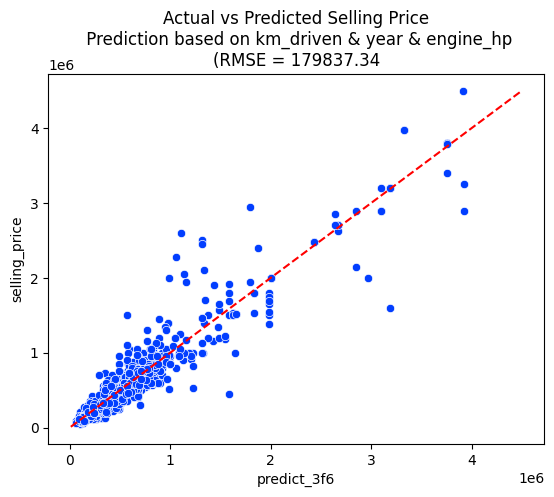

In [ ]:
sns.scatterplot(data=cars_valid,x='predict_3f6', y='selling_price').set(title='Actual vs Predicted Selling Price\n Prediction based on km_driven & year & engine_hp\n(RMSE = 179837.34');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

For ['km_driven','year', 'engine_hp'] 
m

['km_driven','year', 'engine_hp'] : tried depth 10-5 
Best results with depth of 9 
train rmse:  115037.19
valid rmse:  190362.29
9 333
array([0.0931113 , 0.13855199, 0.7683367 ])
conclusion : km_driven  disrupts the model
*   conclusion : km_driven  disrupts the model




##conclusion : km_driven  disrupts the model not improve it => remove from model


## next feature is: engine_cc and year => not a better model to HP and year

In [ ]:
dtr_2_2f1 = DecisionTreeRegressor()
dtr_2_2f1.fit(cars_train[['year', 'engine_cc']] ,cars_train['selling_price'])

cars_train['predict_2_2f1'] = dtr_2_2f1.predict(cars_train[['year', 'engine_cc']])
cars_valid['predict_2_2f1'] = dtr_2_2f1.predict(cars_valid[['year', 'engine_cc']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_2_2f1):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_2_2f1):>10.2f}')

print(dtr_2_2f1.tree_.max_depth, dtr_2_2f1.tree_.n_leaves)
dtr_2_2f1.feature_importances_

# train rmse:  134915.71
# valid rmse:  216290.79
# 16 603
# array([0.41181417, 0.58818583])

train rmse:  134915.71
valid rmse:  216291.26
16 603


array([0.41118467, 0.58881533])

In [ ]:
dtr_2_2f2 = DecisionTreeRegressor(max_depth=8)
dtr_2_2f2.fit(cars_train[['year', 'engine_cc']] ,cars_train['selling_price'])

cars_train['predict_2_2f2'] = dtr_2_2f2.predict(cars_train[['year', 'engine_cc']])
cars_valid['predict_2_2f2'] = dtr_2_2f2.predict(cars_valid[['year', 'engine_cc']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_2_2f2):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_2_2f2):>10.2f}')

print(dtr_2_2f2.tree_.max_depth, dtr_2_2f2.tree_.n_leaves)
dtr_2_2f2.feature_importances_

# train rmse:  155137.60
# valid rmse:  223656.11
# 8 203
# array([0.41473734, 0.58526266])

train rmse:  155137.60
valid rmse:  223656.11
8 203


array([0.41429784, 0.58570216])

In [ ]:
#dtr_2f3 = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=20)
dtr_2f3 = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=20, ccp_alpha= 5_000_000)

dtr_2f3.fit(cars_train[['year', 'engine_cc']] ,cars_train['selling_price'])

cars_train['predict_2f3'] = dtr_2f3.predict(cars_train[['year', 'engine_cc']])
cars_valid['predict_2f3'] = dtr_2f3.predict(cars_valid[['year', 'engine_cc']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_2f3):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_2f3):>10.2f}')

print(dtr_2f3.tree_.max_depth, dtr_2f3.tree_.n_leaves)
dtr_2f3.feature_importances_

# train rmse:  208165.25
# valid rmse:  228140.29
# 11 110
# array([0.42951969, 0.57048031])

train rmse:  208165.25
valid rmse:  228140.29
11 110


array([0.42951969, 0.57048031])

In [ ]:
dtr_2_2f4 = DecisionTreeRegressor(max_depth=9)
dtr_2_2f4.fit(cars_train[['year', 'engine_cc']] ,cars_train['selling_price'])

cars_train['predict_2_2f4'] = dtr_2_2f4.predict(cars_train[['year', 'engine_cc']])
cars_valid['predict_2_2f4'] = dtr_2_2f4.predict(cars_valid[['year', 'engine_cc']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_2_2f4):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_2_2f4):>10.2f}')

print(dtr_2_2f4.tree_.max_depth, dtr_2_2f4.tree_.n_leaves)
dtr_2_2f4.feature_importances_

# train rmse:  148580.48
# valid rmse:  219627.82
# 9 311
# array([0.41315157, 0.58684843])

train rmse:  148580.48
valid rmse:  219627.82
9 311


array([0.4136665, 0.5863335])

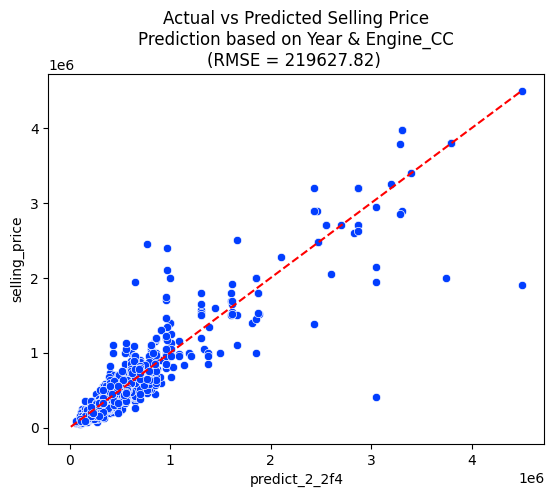

In [ ]:
sns.scatterplot(data=cars_valid,x='predict_2_2f4', y='selling_price').set(title='Actual vs Predicted Selling Price\nPrediction based on Year & Engine_CC\n(RMSE = 219627.82) ');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

##conclusion : engine_cc  does not improve on engine_hp

In [ ]:
cars_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'seats', 'model',
       'engine_cc', 'engine_hp', 'km_per_l', 'fuel_Diesel', 'fuel_Petrol',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'manufacturer_Ambassador',
       'manufacturer_Ashok', 'manufacturer_Audi', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Force', 'manufacturer_Ford', 'manufacturer_Honda',
       'manufacturer_Hyundai', 'manufacturer_Isuzu', 'manufacturer_Jaguar',
       'manufacturer_Jeep', 'manufacturer_Kia', 'manufacturer_Land',
       'manufacturer_MG', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Mitsubishi',
       'manufacturer_Nissan', 'manufacturer_Renault', 'manufacturer_Skoda'

In [ ]:
dtr_3_2f1 = DecisionTreeRegressor()
dtr_3_2f1.fit(cars_train[['engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_3_2f1'] = dtr_3_2f1.predict(cars_train[['engine_cc','year', 'engine_hp']])
cars_valid['predict_3_2f1'] = dtr_3_2f1.predict(cars_valid[['engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_3_2f1):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_3_2f1):>10.2f}')

print(dtr_3_2f1.tree_.max_depth, dtr_3_2f1.tree_.n_leaves)
dtr_3_2f1.feature_importances_

# train rmse:   78308.68
# valid rmse:  144302.19
# 20 1236
# array([0.05685035, 0.18838714, 0.75476251])

train rmse:   78308.68
valid rmse:  145004.59
20 1236


array([0.05915843, 0.18968855, 0.75115302])

dtr_3_2f2 = DecisionTreeRegressor(max_depth = 9)#, ccp_alpha = 5e6)
train rmse:  106577.88
valid rmse:  152331.13
9 294     array([0.05464049, 0.18937344, 0.75598607])



=============================================


In [ ]:
dtr_3_2f2 = DecisionTreeRegressor(max_depth = 9, ccp_alpha = 5e6)
dtr_3_2f2.fit(cars_train[['engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_3_2f2'] = dtr_3_2f2.predict(cars_train[['engine_cc','year', 'engine_hp']])
cars_valid['predict_3_2f2'] = dtr_3_2f2.predict(cars_valid[['engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_3_2f2):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_3_2f2):>10.2f}')

print(dtr_3_2f2.tree_.max_depth, dtr_3_2f2.tree_.n_leaves)
dtr_3_2f2.feature_importances_

# train rmse:  107181.78
# valid rmse:  150226.56
# 9 218
# array([0.05404878, 0.18824816, 0.75770306])

train rmse:  107181.78
valid rmse:  150411.15
9 218


array([0.0529148 , 0.18905418, 0.75803102])

In [ ]:
dtr_3_2f3 = DecisionTreeRegressor(max_depth = 8, ccp_alpha = 5e6)
dtr_3_2f3.fit(cars_train[['engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_3_2f3'] = dtr_3_2f3.predict(cars_train[['engine_cc','year', 'engine_hp']])
cars_valid['predict_3_2f3'] = dtr_3_2f3.predict(cars_valid[['engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_3_2f3):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_3_2f3):>10.2f}')

print(dtr_3_2f3.tree_.max_depth, dtr_3_2f3.tree_.n_leaves)
dtr_3_2f3.feature_importances_

# train rmse:  124096.73
# valid rmse:  158961.50
# 8 155
# array([0.04683648, 0.19100263, 0.76216089])

train rmse:  124096.73
valid rmse:  158974.55
8 155


array([0.04852695, 0.18948935, 0.7619837 ])

In [ ]:
dtr_3_2f4 = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=20, ccp_alpha= 5_000_000)

dtr_3_2f4.fit(cars_train[['engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_3_2f4'] = dtr_3_2f4.predict(cars_train[['engine_cc','year', 'engine_hp']])
cars_valid['predict_3_2f4'] = dtr_3_2f4.predict(cars_valid[['engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_3_2f4):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_3_2f4):>10.2f}')

print(dtr_3_2f4.tree_.max_depth, dtr_3_2f4.tree_.n_leaves)
dtr_3_2f4.feature_importances_

# train rmse:  169277.28
# valid rmse:  175232.95
# 12 136
# array([0.03382684, 0.18861719, 0.77755597])

train rmse:  169277.28
valid rmse:  175232.95
12 136


array([0.03382684, 0.18861719, 0.77755597])

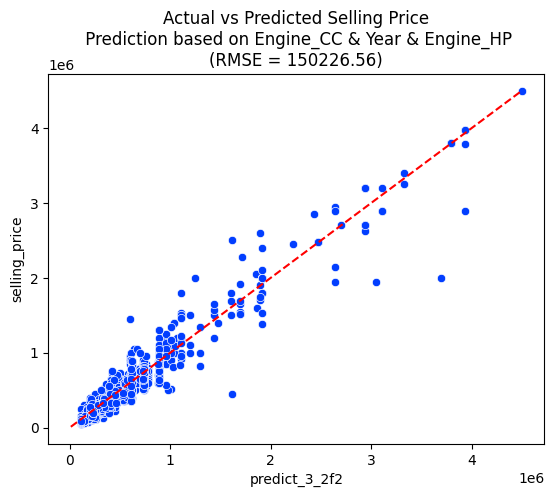

In [ ]:
sns.scatterplot(data=cars_valid,x='predict_3_2f2', y='selling_price').set(title='Actual vs Predicted Selling Price\n Prediction based on Engine_CC & Year & Engine_HP\n(RMSE = 150226.56)');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

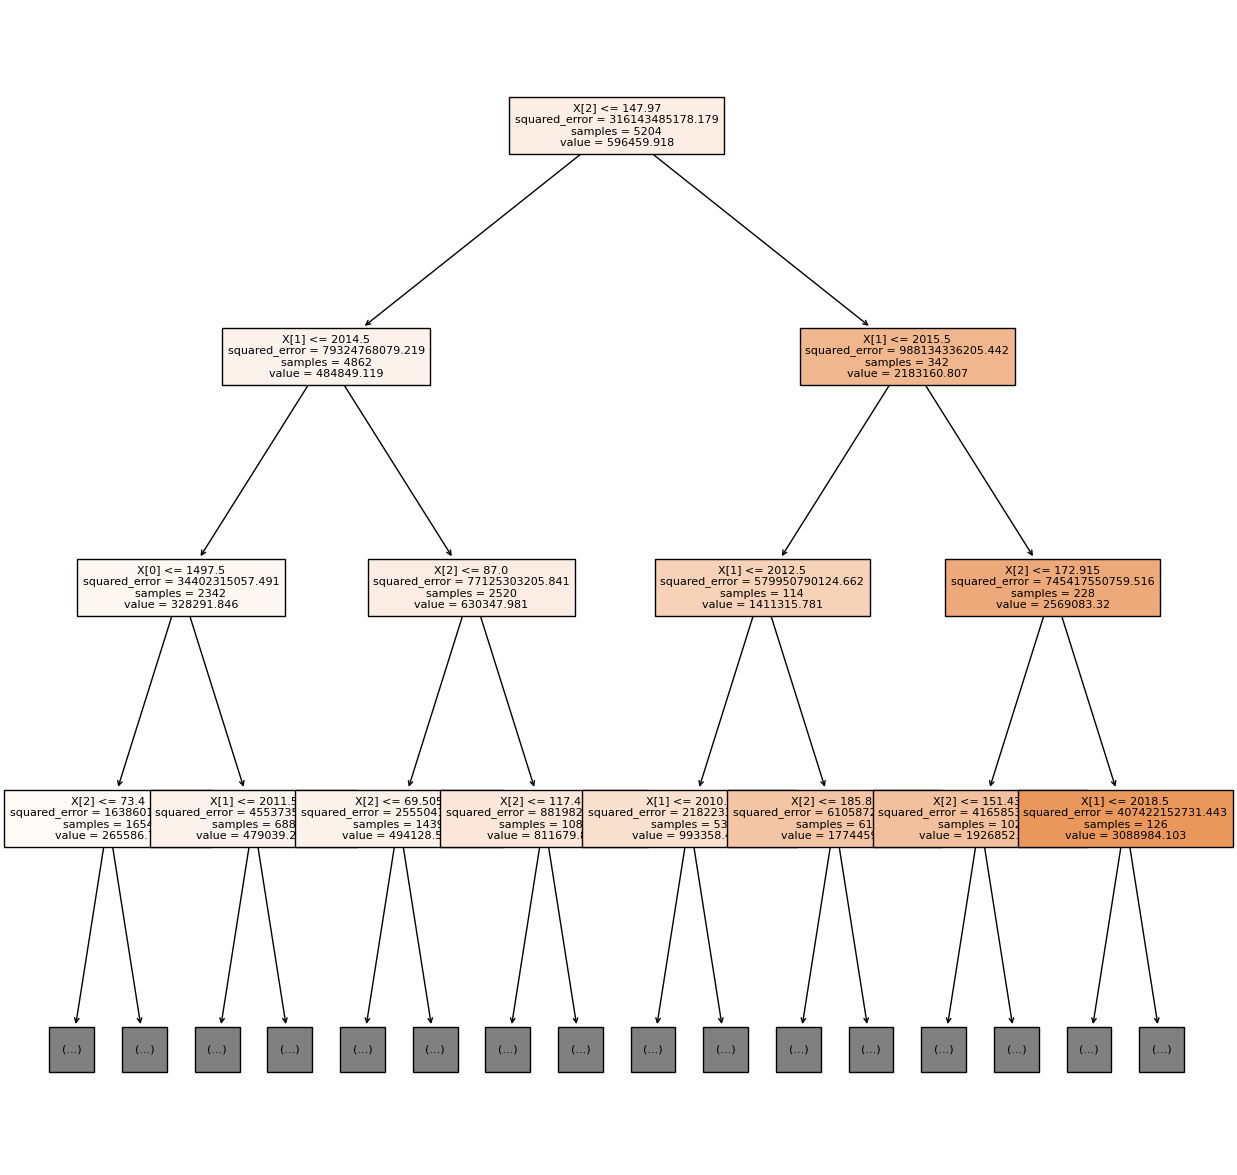

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(dtr_3_2f4, max_depth=3, fontsize=8, filled = True);


##Conclusion
Adding engine_cc improves the model by 10k  R 

In [ ]:
cars_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'seats', 'model',
       'engine_cc', 'engine_hp', 'km_per_l', 'fuel_Diesel', 'fuel_Petrol',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'manufacturer_Ambassador',
       'manufacturer_Ashok', 'manufacturer_Audi', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Force', 'manufacturer_Ford', 'manufacturer_Honda',
       'manufacturer_Hyundai', 'manufacturer_Isuzu', 'manufacturer_Jaguar',
       'manufacturer_Jeep', 'manufacturer_Kia', 'manufacturer_Land',
       'manufacturer_MG', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Mitsubishi',
       'manufacturer_Nissan', 'manufacturer_Renault', 'manufacturer_Skoda'

# Add dummises of Transmission

In [ ]:
dtr_3_3f1 = DecisionTreeRegressor()
dtr_3_3f1.fit(cars_train[['transmission_Automatic', 'transmission_Manual','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_3_3f1'] = dtr_3_3f1.predict(cars_train[['transmission_Automatic', 'transmission_Manual','year', 'engine_hp']])
cars_valid['predict_3_3f1'] = dtr_3_3f1.predict(cars_valid[['transmission_Automatic', 'transmission_Manual','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_3_3f1):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_3_3f1):>10.2f}')

print(dtr_3_3f1.tree_.max_depth, dtr_3_3f1.tree_.n_leaves)
dtr_3_3f1.feature_importances_

# train rmse:   88593.41
# valid rmse:  169988.67
# 19 1148
# array([0.00294258, 0.00182621, 0.19403536, 0.80119585])

train rmse:   88593.41
valid rmse:  173490.28
19 1148


array([0.00241134, 0.00157617, 0.19546691, 0.80054558])

In [ ]:
dtr_3_3f2 = DecisionTreeRegressor(max_depth = 9)
dtr_3_3f2.fit(cars_train[['transmission_Automatic', 'transmission_Manual','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_3_3f2'] = dtr_3_3f2.predict(cars_train[['transmission_Automatic', 'transmission_Manual','year', 'engine_hp']])
cars_valid['predict_3_3f2'] = dtr_3_3f2.predict(cars_valid[['transmission_Automatic', 'transmission_Manual','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_3_3f2):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_3_3f2):>10.2f}')

print(dtr_3_3f2.tree_.max_depth, dtr_3_3f2.tree_.n_leaves)
dtr_3_3f2.feature_importances_

# train rmse:  114884.02
# valid rmse:  168006.60
# 9 301
# array([2.55059609e-03, 2.23639530e-04, 1.95559468e-01, 8.01666297e-01])

train rmse:  114884.02
valid rmse:  168148.43
9 301


array([0.00183241, 0.00185315, 0.19475357, 0.80156087])

In [ ]:
# ccp_alpha = 5e6)
dtr_3_3f3 = DecisionTreeRegressor(max_depth = 8,ccp_alpha = 5e6)
dtr_3_3f3.fit(cars_train[['transmission_Automatic', 'transmission_Manual','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_3_3f3'] = dtr_3_3f3.predict(cars_train[['transmission_Automatic', 'transmission_Manual','year', 'engine_hp']])
cars_valid['predict_3_3f3'] = dtr_3_3f3.predict(cars_valid[['transmission_Automatic', 'transmission_Manual','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_3_3f3):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_3_3f3):>10.2f}')

print(dtr_3_3f3.tree_.max_depth, dtr_3_3f3.tree_.n_leaves)
dtr_3_3f3.feature_importances_

# train rmse:  128442.48
# valid rmse:  166819.84
# 8 160
# array([0.00101135, 0.00092492, 0.19596672, 0.80209701])

train rmse:  128442.48
valid rmse:  166998.51
8 160


array([8.49113759e-04, 2.07903449e-04, 1.97144694e-01, 8.01798289e-01])

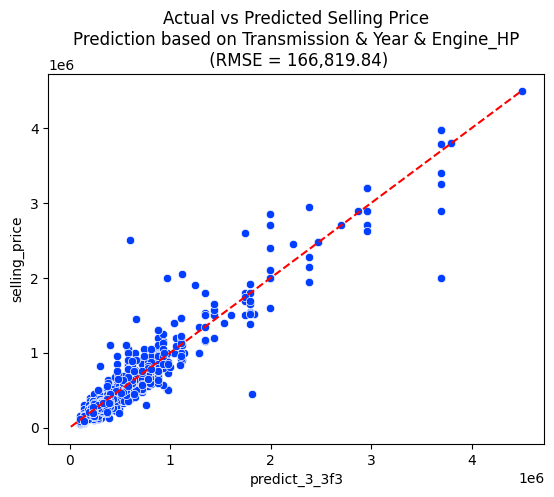

In [ ]:
sns.scatterplot(data=cars_valid,x='predict_3_3f3', y='selling_price').set(title='Actual vs Predicted Selling Price\nPrediction based on Transmission & Year & Engine_HP\n (RMSE = 166,819.84)');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

##engineCC + Transmission + Year + engineHP


depth 8 :  train rmse:  122587.73
valid rmse:  157930.53
8 182
array([0.04713917, 0.00096932, 0.00154232, 0.18951477, 0.76083441])

depeth 9unstable resuls


depth10:
train rmse:   97969.63
valid rmse:  153098.44
10 288
array([0.0547147 , 0.00146861, 0.00082625, 0.1897539 , 0.75323655])

=========================


In [ ]:
# ccp_alpha = 5e6)
dtr_1_4f1 = DecisionTreeRegressor(max_depth = 10,ccp_alpha = 5e6)
dtr_1_4f1.fit(cars_train[['engine_cc', 'transmission_Automatic', 'transmission_Manual','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_1_4f1'] = dtr_1_4f1.predict(cars_train[['engine_cc','transmission_Automatic', 'transmission_Manual','year', 'engine_hp']])
cars_valid['predict_1_4f1'] = dtr_1_4f1.predict(cars_valid[['engine_cc','transmission_Automatic', 'transmission_Manual','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_1_4f1):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_1_4f1):>10.2f}')

print(dtr_1_4f1.tree_.max_depth, dtr_1_4f1.tree_.n_leaves)
dtr_1_4f1.feature_importances_

# train rmse:   97969.63
# valid rmse:  153084.89
# 10 288
# array([0.05417558, 0.00113065, 0.00191201, 0.18814445, 0.7546373 ])

train rmse:   97969.63
valid rmse:  151572.62
10 288


array([0.05227471, 0.00225843, 0.00090641, 0.19013275, 0.7544277 ])

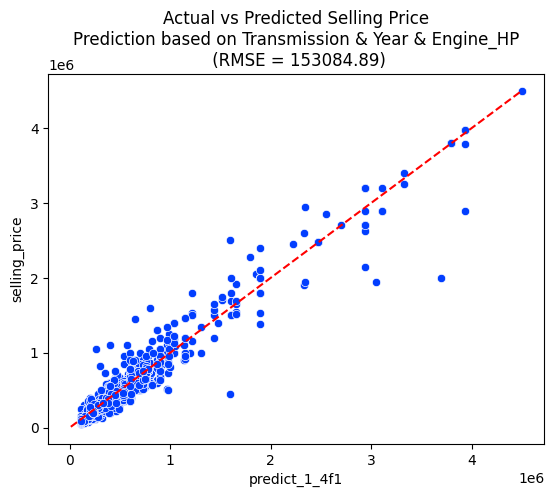

In [ ]:
sns.scatterplot(data=cars_valid,x='predict_1_4f1', y='selling_price').set(title='Actual vs Predicted Selling Price\nPrediction based on Transmission & Year & Engine_HP\n (RMSE = 153084.89)');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

# Conclusion
Transmission by itself added to year and engine HP does not improve the model compared to  Engine CC +YEar + HP
Transmission + engine_cc+year+ engine_hp also does not improve the model 
## conclusion: discard transmission

##Next add owner to CC+year+hp

In [ ]:
# ccp_alpha = 5e6)
dtr_2_4f1 = DecisionTreeRegressor()

dtr_2_4f1.fit(cars_train[['owner_First Owner','owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_2_4f1'] = dtr_2_4f1.predict(cars_train[['owner_First Owner','owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner','engine_cc','year', 'engine_hp']])
cars_valid['predict_2_4f1'] = dtr_2_4f1.predict(cars_valid[['owner_First Owner','owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner','engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_2_4f1):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_2_4f1):>10.2f}')

print(dtr_2_4f1.tree_.max_depth, dtr_2_4f1.tree_.n_leaves)
dtr_2_4f1.feature_importances_

# train rmse:   71467.77
# valid rmse:  151388.04
# 22 1837
# array([1.48626768e-03, 3.91643592e-04, 1.71148611e-03, 5.48948453e-04,
#        5.76994808e-02, 1.86936736e-01, 7.51225437e-01])

train rmse:   71467.77
valid rmse:  158120.44
22 1837


array([1.71257551e-03, 3.98654346e-04, 1.49023896e-03, 6.40462893e-04,
       5.48910887e-02, 1.87950670e-01, 7.52916309e-01])

In [ ]:
dtr_2_4f2 = DecisionTreeRegressor(max_depth = 10)#,ccp_alpha = 5e6)

dtr_2_4f2.fit(cars_train[['owner_First Owner','owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_2_4f2'] = dtr_2_4f2.predict(cars_train[['owner_First Owner','owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner','engine_cc','year', 'engine_hp']])
cars_valid['predict_2_4f2'] = dtr_2_4f2.predict(cars_valid[['owner_First Owner','owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner','engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_2_4f2):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_2_4f2):>10.2f}')

print(dtr_2_4f2.tree_.max_depth, dtr_2_4f2.tree_.n_leaves)
dtr_2_4f2.feature_importances_

# train rmse:   95929.64
# valid rmse:  158239.77
# 10 482
# array([9.97905473e-04, 2.74421980e-04, 9.00354213e-04, 1.94995520e-04,
#        5.49401073e-02, 1.88891022e-01, 7.53801193e-01])

train rmse:   95929.64
valid rmse:  154271.64
10 482


array([8.61198297e-04, 2.77108249e-04, 7.71900278e-04, 4.07907287e-04,
       5.39591890e-02, 1.87120905e-01, 7.56601792e-01])

In [ ]:
dtr_2_4f3 = DecisionTreeRegressor(max_depth = 10,ccp_alpha = 5e6)

dtr_2_4f3.fit(cars_train[['owner_First Owner','owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_2_4f3'] = dtr_2_4f3.predict(cars_train[['owner_First Owner','owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner','engine_cc','year', 'engine_hp']])
cars_valid['predict_2_4f3'] = dtr_2_4f3.predict(cars_valid[['owner_First Owner','owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner','engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_2_4f3):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_2_4f3):>10.2f}')

print(dtr_2_4f3.tree_.max_depth, dtr_2_4f3.tree_.n_leaves)
dtr_2_4f3.feature_importances_

# train rmse:   97567.22
# valid rmse:  154807.69
# 10 304
# array([8.70913458e-04, 2.42734829e-04, 7.31956771e-04, 1.28275778e-04,
#        5.30213823e-02, 1.90309653e-01, 7.54695083e-01])

train rmse:   97567.22
valid rmse:  157916.43
10 304


array([8.87731814e-04, 2.42734829e-04, 4.47888566e-04, 1.00216074e-04,
       5.61276786e-02, 1.87386175e-01, 7.54807575e-01])

depth 9:   train rmse:  106137.80
valid rmse:  154951.87
9 304
array([8.28500435e-04, 2.46142031e-04, 4.90480576e-04, 2.00522853e-04,
       5.19864759e-02, 1.89125114e-01, 7.57122764e-01])


depth : 8:  train rmse:  123660.51
valid rmse:  162350.75
8 185
array([5.56640479e-04, 1.65602682e-04, 4.79335029e-04, 1.33955282e-04,
       4.72872270e-02, 1.91002990e-01, 7.60374250e-01])

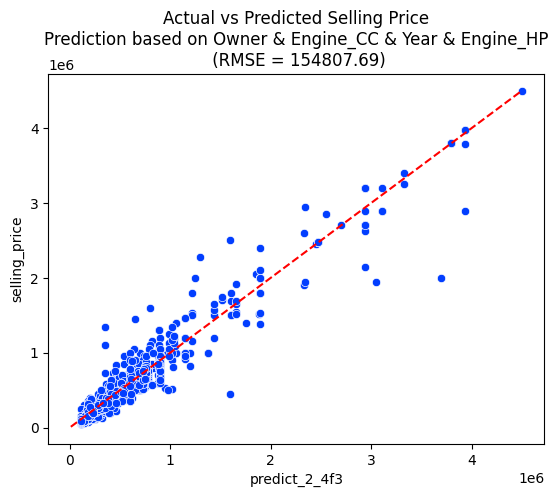

In [ ]:
sns.scatterplot(data=cars_valid,x='predict_2_4f3', y='selling_price').set(title='Actual vs Predicted Selling Price\nPrediction based on Owner & Engine_CC & Year & Engine_HP\n (RMSE = 154807.69)');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

Best results of "Owner" achieved with depth 9, 


##  Next check seller type 

In [ ]:
cars_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'seats', 'model',
       'engine_cc', 'engine_hp', 'km_per_l', 'fuel_Diesel', 'fuel_Petrol',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'manufacturer_Ambassador',
       'manufacturer_Ashok', 'manufacturer_Audi', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Force', 'manufacturer_Ford', 'manufacturer_Honda',
       'manufacturer_Hyundai', 'manufacturer_Isuzu', 'manufacturer_Jaguar',
       'manufacturer_Jeep', 'manufacturer_Kia', 'manufacturer_Land',
       'manufacturer_MG', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Mitsubishi',
       'manufacturer_Nissan', 'manufacturer_Renault', 'manufacturer_Skoda'

train rmse:   74459.05
valid rmse:  162886.19
21 1453
array([2.02061875e-03, 1.89009345e-03, 2.18388953e-04, 5.56592724e-02,
       1.86848269e-01, 7.53363357e-01])
train rmse:  106409.75
valid rmse:  164229.72
9 225
array([6.78533112e-04, 1.62935291e-03, 1.84644363e-04, 5.09745597e-02,
       1.88044592e-01, 7.58488318e-01])
train rmse:  124939.68
valid rmse:  162604.62

In [ ]:
dtr_4_4f1 = DecisionTreeRegressor()

dtr_4_4f1.fit(cars_train[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_4_4f1'] = dtr_4_4f1.predict(cars_train[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']])
cars_valid['predict_4_4f1'] = dtr_4_4f1.predict(cars_valid[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_4_4f1):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_4_4f1):>10.2f}')

print(dtr_4_4f1.tree_.max_depth, dtr_4_4f1.tree_.n_leaves)
dtr_4_4f1.feature_importances_

# train rmse:   74459.05
# valid rmse:  160520.58
# 21 1453
# array([1.33351763e-03, 1.89167539e-03, 2.25314175e-04, 5.82786695e-02,
#        1.87587836e-01, 7.50682988e-01])

train rmse:   74459.05
valid rmse:  158039.24
21 1453


array([1.78063420e-03, 1.84670877e-03, 2.23854062e-04, 5.62375686e-02,
       1.88496421e-01, 7.51414813e-01])

In [ ]:
dtr_4_4f2 = DecisionTreeRegressor(max_depth = 9 , ccp_alpha= 5e6)

dtr_4_4f2.fit(cars_train[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_4_4f2'] = dtr_4_4f2.predict(cars_train[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']])
cars_valid['predict_4_4f2'] = dtr_4_4f2.predict(cars_valid[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']])

print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_4_4f2):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_4_4f2):>10.2f}')

print(dtr_4_4f2.tree_.max_depth, dtr_4_4f2.tree_.n_leaves)
dtr_4_4f2.feature_importances_

# train rmse:  106409.75
# valid rmse:  164229.72
# 9 225
# array([9.30770501e-04, 1.26739379e-03, 1.84644363e-04, 5.23203718e-02,
#        1.87965791e-01, 7.57331028e-01])

train rmse:  106409.75
valid rmse:  162986.28
9 225


array([9.99226470e-04, 1.19893783e-03, 1.84644363e-04, 5.24128152e-02,
       1.89765934e-01, 7.55438442e-01])

In [ ]:
dtr_4_4f3 = DecisionTreeRegressor(max_depth = 8 , ccp_alpha= 5e6)

dtr_4_4f3.fit(cars_train[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_4_4f3'] = dtr_4_4f3.predict(cars_train[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']])
cars_valid['predict_4_4f3'] = dtr_4_4f3.predict(cars_valid[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']])

print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_4_4f3):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_4_4f3):>10.2f}')

print(dtr_4_4f3.tree_.max_depth, dtr_4_4f3.tree_.n_leaves)
dtr_4_4f3.feature_importances_

# train rmse:  124939.68
# valid rmse:  162297.44
# 8 161
# array([2.26630973e-04, 1.22149300e-03, 0.00000000e+00, 4.61930421e-02,
#        1.89404596e-01, 7.62954238e-01])

train rmse:  124939.68
valid rmse:  162298.00
8 161


array([0.0008605 , 0.0010711 , 0.        , 0.04567043, 0.18944616,
       0.76295181])

In [ ]:
dtr_4_4f4 = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=5, ccp_alpha= 5_000_000)
dtr_4_4f4.fit(cars_train[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_4_4f4'] = dtr_4_4f4.predict(cars_train[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']])
cars_valid['predict_4_4f4'] = dtr_4_4f4.predict(cars_valid[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']])

print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_4_4f4):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_4_4f4):>10.2f}')

print(dtr_4_4f4.tree_.max_depth, dtr_4_4f4.tree_.n_leaves)
dtr_4_4f4.feature_importances_

# train rmse:  122637.41
# valid rmse:  150122.49
# 17 516
# array([1.55842484e-04, 1.09114757e-03, 1.91414698e-04, 4.21996946e-02,
#        1.87633011e-01, 7.68728889e-01])

train rmse:  124339.52
valid rmse:  150573.75
16 264


array([2.24821090e-04, 9.72571410e-04, 1.66952746e-04, 4.17479826e-02,
       1.87544191e-01, 7.69343481e-01])

In [ ]:
dtr_4_4f4 = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=5)#, ccp_alpha= 5_000_000)
dtr_4_4f4.fit(cars_train[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_4_4f4'] = dtr_4_4f4.predict(cars_train[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']])
cars_valid['predict_4_4f4'] = dtr_4_4f4.predict(cars_valid[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']])

print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_4_4f4):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_4_4f4):>10.2f}')

print(dtr_4_4f4.tree_.max_depth, dtr_4_4f4.tree_.n_leaves)
dtr_4_4f4.feature_importances_

# train rmse:  122637.41
# valid rmse:  150084.41
# 17 516
# array([1.72544834e-04, 1.08018700e-03, 1.85672915e-04, 4.18047465e-02,
#        1.87633011e-01, 7.69123837e-01])

train rmse:  122637.41
valid rmse:  150070.57
17 516


array([1.47671367e-04, 1.09931869e-03, 1.91414698e-04, 4.20914459e-02,
       1.87633011e-01, 7.68837138e-01])

In [ ]:
dtr_4_4f5 = DecisionTreeRegressor(max_depth=8 , ccp_alpha= 5e6)

dtr_4_4f5.fit(cars_train[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_4_4f5'] = dtr_4_4f4.predict(cars_train[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']])
cars_valid['predict_4_4f5'] = dtr_4_4f4.predict(cars_valid[['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_4_4f5):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_4_4f5):>10.2f}')

print(dtr_4_4f5.tree_.max_depth, dtr_4_4f5.tree_.n_leaves)
dtr_4_4f5.feature_importances_

# train rmse:  122637.41
# valid rmse:  150084.41
# 8 185
# array([3.48606441e-04, 1.09991477e-03, 0.00000000e+00, 4.73190754e-02,
#        1.89281713e-01, 7.61950691e-01])

train rmse:  122637.41
valid rmse:  150070.57
8 161


array([6.76541845e-04, 1.14377348e-03, 0.00000000e+00, 4.45818700e-02,
       1.89339579e-01, 7.64258236e-01])

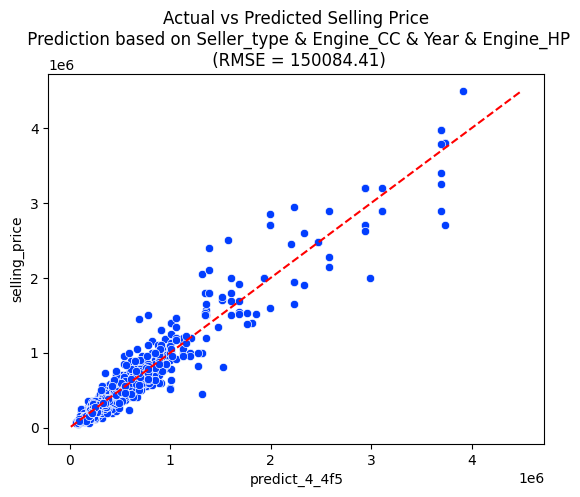

In [ ]:
sns.scatterplot(data=cars_valid,x='predict_4_4f5', y='selling_price').set(title='Actual vs Predicted Selling Price\n Prediction based on Seller_type & Engine_CC & Year & Engine_HP\n (RMSE = 150084.41)');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

dtr_4_4f4 = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=5)#, ccp_alpha= 5_000_000)

train rmse:  122637.41
valid rmse:  150084.41
17 516
array([1.95556957e-04, 1.05143310e-03, 1.91414698e-04, 4.19622636e-02,
       1.87633011e-01, 7.68966320e-01])

30 15 ccp_alpha
train rmse:  161335.25
valid rmse:  165029.47
14 223
array([1.20985407e-04, 1.09269950e-03, 1.41925065e-04, 3.43669421e-02,
       1.89452308e-01, 7.74825140e-01])

best results not significatly better than  cc+year+hp## but more complex; 

conclusion => discard "seller_type"


##Next to check is "fuel"

In [ ]:
dtr_5_4f1 = DecisionTreeRegressor()

dtr_5_4f1.fit(cars_train[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_5_4f1'] = dtr_5_4f1.predict(cars_train[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']])
cars_valid['predict_5_4f1'] = dtr_5_4f1.predict(cars_valid[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_5_4f1):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_5_4f1):>10.2f}')

print(dtr_5_4f1.tree_.max_depth, dtr_5_4f1.tree_.n_leaves)
dtr_5_4f1.feature_importances_

# train rmse:   78234.71
# valid rmse:  145732.65
# 21 1242
# array([0.00499557, 0.00727547, 0.05040422, 0.18692671, 0.75039803])

train rmse:   78234.71
valid rmse:  144933.81
21 1242


array([1.18398237e-02, 3.81191368e-04, 4.98876166e-02, 1.87156932e-01,
       7.50734436e-01])

In [ ]:
dtr_5_4f2 = DecisionTreeRegressor(max_depth = 9)

dtr_5_4f2.fit(cars_train[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_5_4f2'] = dtr_5_4f2.predict(cars_train[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']])
cars_valid['predict_5_4f2'] = dtr_5_4f2.predict(cars_valid[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_5_4f2):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_5_4f2):>10.2f}')

print(dtr_5_4f2.tree_.max_depth, dtr_5_4f2.tree_.n_leaves)
dtr_5_4f2.feature_importances_

# train rmse:  105894.48
# valid rmse:  151752.91
# 9 296
# array([0.00679439, 0.00448968, 0.04579107, 0.18697797, 0.75594689])

train rmse:  105894.48
valid rmse:  151593.25
9 296


array([5.22730307e-04, 1.07511593e-02, 4.62021327e-02, 1.88527341e-01,
       7.53996637e-01])

In [ ]:
dtr_5_4f3 = DecisionTreeRegressor(max_depth = 10, ccp_alpha= 5_000_000)

dtr_5_4f3.fit(cars_train[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_5_4f3'] = dtr_5_4f3.predict(cars_train[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']])
cars_valid['predict_5_4f3'] = dtr_5_4f3.predict(cars_valid[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_5_4f3):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_5_4f3):>10.2f}')

print(dtr_5_4f3.tree_.max_depth, dtr_5_4f3.tree_.n_leaves)
dtr_5_4f3.feature_importances_

# train rmse:   98313.79
# valid rmse:  150519.47
# 10 280
# array([0.0046073 , 0.00706265, 0.04924735, 0.18746706, 0.75161564])

train rmse:   98313.79
valid rmse:  150043.83
10 280


array([0.00681348, 0.00483928, 0.04822872, 0.1882843 , 0.75183423])

In [ ]:
dtr_5_4f4 = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=15, ccp_alpha= 5_000_000)
dtr_5_4f4.fit(cars_train[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_5_4f4'] = dtr_5_4f4.predict(cars_train[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']])
cars_valid['predict_5_4f4'] = dtr_5_4f4.predict(cars_valid[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']])

print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_5_4f4):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_5_4f4):>10.2f}')

print(dtr_5_4f4.tree_.max_depth, dtr_5_4f4.tree_.n_leaves)
dtr_5_4f4.feature_importances_

# train rmse:  163994.80
# valid rmse:  166619.42
# 13 156
# array([2.30675749e-03, 1.24742406e-04, 3.51388002e-02, 1.90615756e-01,
#        7.71813944e-01])

train rmse:  163994.80
valid rmse:  166619.42
13 156


array([2.24216197e-04, 2.20728369e-03, 3.51388002e-02, 1.90615756e-01,
       7.71813944e-01])

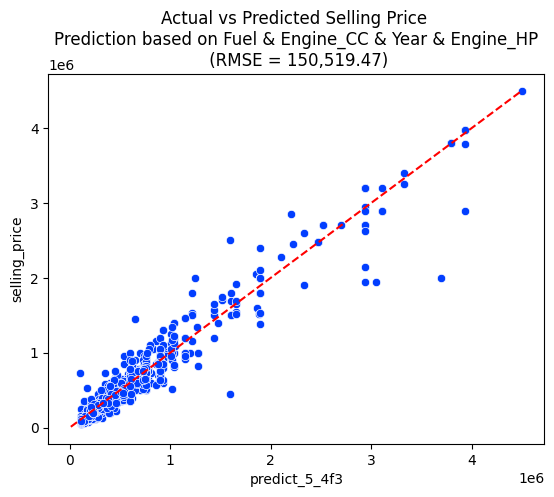

In [ ]:
sns.scatterplot(data=cars_valid,x='predict_5_4f3', y='selling_price').set(title='Actual vs Predicted Selling Price \nPrediction based on Fuel & Engine_CC & Year & Engine_HP\n (RMSE = 150,519.47)');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

depth 8 ccp_alpha:  train rmse:  120890.23
valid rmse:  161869.92
8 154
array([0.00268907, 0.00856294, 0.0428725 , 0.18661332, 0.75926217])

depth 10 +ccp_alpha :  train rmse:   98313.79
valid rmse:  148308.58
10 280
array([6.08926056e-04, 1.10438285e-02, 4.89799186e-02, 1.86905769e-01,
       7.52461558e-01])

10  5   train rmse:  122637.41
valid rmse:  150122.49
17 516
array([2.16640717e-04, 1.03034934e-03, 1.91414698e-04, 4.19044603e-02,
       1.87633011e-01, 7.69024124e-01])

30 15 

10/15 ccp_alpha 5e6
train rmse:  122637.41
valid rmse:  150122.49
17 516
array([2.16640717e-04, 1.03034934e-03, 1.91414698e-04, 4.19044603e-02,
       1.87633011e-01, 7.69024124e-01])


##CHeck on manufacturer whether this feature will make the model more accurate

In [ ]:

dtr_m_4f1 = DecisionTreeRegressor()
dtr_m_4f1.fit(cars_train[['manufacturer_Ambassador',
       'manufacturer_Ashok', 'manufacturer_Audi', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Force', 'manufacturer_Ford', 'manufacturer_Honda',
       'manufacturer_Hyundai', 'manufacturer_Isuzu', 'manufacturer_Jaguar',
       'manufacturer_Jeep', 'manufacturer_Kia', 'manufacturer_Land',
       'manufacturer_MG', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Mitsubishi',
       'manufacturer_Nissan', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen',
       'manufacturer_Volvo','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_m_4f1'] = dtr_m_4f1.predict(cars_train[[ 'manufacturer_Ambassador',
       'manufacturer_Ashok', 'manufacturer_Audi', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Force', 'manufacturer_Ford', 'manufacturer_Honda',
       'manufacturer_Hyundai', 'manufacturer_Isuzu', 'manufacturer_Jaguar',
       'manufacturer_Jeep', 'manufacturer_Kia', 'manufacturer_Land',
       'manufacturer_MG', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Mitsubishi',
       'manufacturer_Nissan', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen',
       'manufacturer_Volvo','engine_cc','year', 'engine_hp']])
cars_valid['predict_m_4f1'] = dtr_m_4f1.predict(cars_valid[[ 'manufacturer_Ambassador',
       'manufacturer_Ashok', 'manufacturer_Audi', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Force', 'manufacturer_Ford', 'manufacturer_Honda',
       'manufacturer_Hyundai', 'manufacturer_Isuzu', 'manufacturer_Jaguar',
       'manufacturer_Jeep', 'manufacturer_Kia', 'manufacturer_Land',
       'manufacturer_MG', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Mitsubishi',
       'manufacturer_Nissan', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen',
       'manufacturer_Volvo','engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_m_4f1):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_m_4f1):>10.2f}')

print(dtr_m_4f1.tree_.max_depth, dtr_m_4f1.tree_.n_leaves)
dtr_m_4f1.feature_importances_

# no hypeParams
# train rmse:   76132.38
# valid rmse:  154633.60
# 22 1272
# array([0.00000000e+00, 1.28995167e-07, 2.90311746e-03, 1.25073714e-05,
#        3.85099725e-03, 9.29977515e-05, 1.54608778e-05, 1.02518264e-04,
#        1.20172088e-03, 4.99492825e-03, 5.76073527e-04, 0.00000000e+00,
#        2.07987403e-03, 3.33467396e-06, 6.43977439e-04, 1.74143475e-06,
#        0.00000000e+00, 7.99636286e-04, 6.06343165e-04, 5.57629041e-03,
#        0.00000000e+00, 8.79406411e-05, 1.22723505e-04, 1.31409532e-03,
#        4.28147454e-03, 1.07157844e-02, 5.14769926e-04, 8.85018211e-03,
#        3.44107878e-02, 1.78560039e-01, 7.37680555e-01])

train rmse:   76132.38
valid rmse:  155671.14
22 1272


array([1.39314780e-09, 0.00000000e+00, 2.80326939e-03, 1.49634393e-04,
       3.82389786e-03, 9.29977515e-05, 4.28503588e-05, 1.03508947e-04,
       1.20317909e-03, 5.02214550e-03, 5.88050951e-04, 1.16786696e-06,
       2.12032692e-03, 0.00000000e+00, 6.43977439e-04, 1.74143475e-06,
       0.00000000e+00, 7.15583332e-04, 6.34100025e-04, 5.60906742e-03,
       2.22653135e-05, 1.00165649e-04, 1.15610646e-04, 1.78537617e-03,
       3.99682024e-03, 1.32674120e-02, 6.61252162e-04, 1.34974756e-02,
       3.15863337e-02, 1.77979485e-01, 7.33432303e-01])

In [ ]:
dtr_m_4f2 = DecisionTreeRegressor(max_depth =15 , ccp_alpha = 5e6)
dtr_m_4f2.fit(cars_train[['manufacturer_Ambassador',
       'manufacturer_Ashok', 'manufacturer_Audi', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Force', 'manufacturer_Ford', 'manufacturer_Honda',
       'manufacturer_Hyundai', 'manufacturer_Isuzu', 'manufacturer_Jaguar',
       'manufacturer_Jeep', 'manufacturer_Kia', 'manufacturer_Land',
       'manufacturer_MG', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Mitsubishi',
       'manufacturer_Nissan', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen',
       'manufacturer_Volvo','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_m_4f2'] = dtr_m_4f2.predict(cars_train[[ 'manufacturer_Ambassador',
       'manufacturer_Ashok', 'manufacturer_Audi', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Force', 'manufacturer_Ford', 'manufacturer_Honda',
       'manufacturer_Hyundai', 'manufacturer_Isuzu', 'manufacturer_Jaguar',
       'manufacturer_Jeep', 'manufacturer_Kia', 'manufacturer_Land',
       'manufacturer_MG', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Mitsubishi',
       'manufacturer_Nissan', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen',
       'manufacturer_Volvo','engine_cc','year', 'engine_hp']])
cars_valid['predict_m_4f2'] = dtr_m_4f2.predict(cars_valid[[ 'manufacturer_Ambassador',
       'manufacturer_Ashok', 'manufacturer_Audi', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Force', 'manufacturer_Ford', 'manufacturer_Honda',
       'manufacturer_Hyundai', 'manufacturer_Isuzu', 'manufacturer_Jaguar',
       'manufacturer_Jeep', 'manufacturer_Kia', 'manufacturer_Land',
       'manufacturer_MG', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Mitsubishi',
       'manufacturer_Nissan', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen',
       'manufacturer_Volvo','engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_m_4f2):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_m_4f2):>10.2f}')

print(dtr_m_4f2.tree_.max_depth, dtr_m_4f2.tree_.n_leaves)
dtr_m_4f2.feature_importances_

#=====================================
# no hyperParams
# train rmse:   76132.38
# valid rmse:  154633.60
# 22 1272
# # 9:depth 
# # train rmse:  110928.09
# # valid rmse:  161340.87
#===========================================
# 9 192
# array([0.00000000e+00, 0.00000000e+00, 2.43603737e-03, 4.44685050e-05,
#        3.71460991e-03, 7.44004818e-05, 0.00000000e+00, 0.00000000e+00,
#        1.70665719e-04, 4.90091829e-03, 1.98187980e-04, 0.00000000e+00,
#        2.12442961e-03, 0.00000000e+00, 6.57772884e-04, 0.00000000e+00,
#        0.00000000e+00, 4.81747654e-04, 2.36784855e-04, 5.56879986e-03,
#        0.00000000e+00, 6.85493704e-05, 0.00000000e+00, 2.38847347e-03,
#        3.54522911e-03, 1.23435510e-02, 8.30873087e-04, 9.03977292e-03,
#        2.68630329e-02, 1.78495606e-01, 7.45816089e-01])
# 10: depth
# train rmse:  100615.00
# valid rmse:  156255.81
# 10 245
#=================
# #depth 8:
# train rmse:  121815.24
# valid rmse:  171068.61
# 8 140
#===================
# train rmse:   82735.31
# valid rmse:  154999.41
# 15 404
#====================
# depth 17
# train rmse:   82064.93
# valid rmse:  156953.97
# 17 414
#==================
# Depth 15 ccpalha 536
# train rmse:   82735.31
# valid rmse:  155640.74
# 15 404
# array([0.00000000e+00, 0.00000000e+00, 2.35244498e-03, 1.92789943e-04,
#        3.82833447e-03, 7.30871223e-05, 0.00000000e+00, 0.00000000e+00,
#        7.13290661e-04, 5.02736681e-03, 4.67844463e-04, 0.00000000e+00,
#        2.08692798e-03, 1.94148986e-05, 6.46161505e-04, 0.00000000e+00,
#        0.00000000e+00, 6.30855716e-04, 4.83423941e-04, 5.55036419e-03,
#        2.10879187e-05, 6.73392981e-05, 1.22792237e-04, 2.89152505e-03,
#        3.92667251e-03, 1.28087541e-02, 9.36642083e-04, 1.35432526e-02,
#        3.11470940e-02, 1.77754402e-01, 7.34708131e-01])

train rmse:   82735.31
valid rmse:  153202.55
15 404


array([0.00000000e+00, 0.00000000e+00, 2.73822354e-03, 3.72766052e-05,
       3.82833447e-03, 7.30871223e-05, 0.00000000e+00, 1.02865957e-04,
       7.35387326e-04, 5.03197790e-03, 4.79997109e-04, 0.00000000e+00,
       2.08692798e-03, 0.00000000e+00, 6.46161505e-04, 0.00000000e+00,
       0.00000000e+00, 5.37694638e-04, 5.51310980e-04, 5.52727651e-03,
       0.00000000e+00, 6.73392981e-05, 1.22792237e-04, 1.30165671e-03,
       3.95515186e-03, 1.04356838e-02, 6.34228701e-04, 8.88019772e-03,
       3.28955816e-02, 1.79168863e-01, 7.40161984e-01])

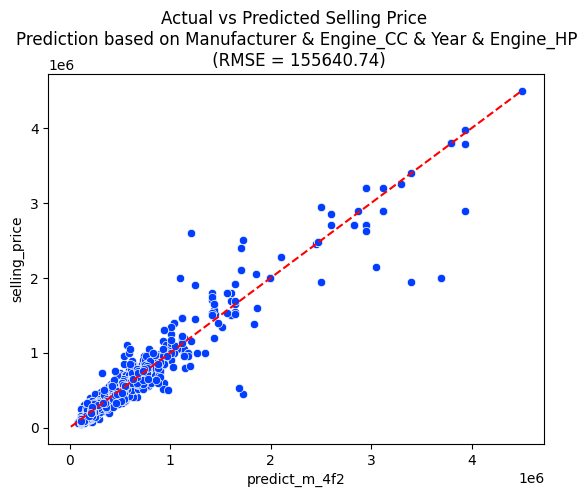

In [ ]:
sns.scatterplot(data=cars_valid,x='predict_m_4f2', y='selling_price').set(title='Actual vs Predicted Selling Price \nPrediction based on Manufacturer & Engine_CC & Year & Engine_HP\n (RMSE = 155640.74)');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

In [ ]:
dtr_m_f1 = DecisionTreeRegressor()
dtr_m_f1.fit(cars_train[['manufacturer_Ambassador',
       'manufacturer_Ashok', 'manufacturer_Audi', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Force', 'manufacturer_Ford', 'manufacturer_Honda',
       'manufacturer_Hyundai', 'manufacturer_Isuzu', 'manufacturer_Jaguar',
       'manufacturer_Jeep', 'manufacturer_Kia', 'manufacturer_Land',
       'manufacturer_MG', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Mitsubishi',
       'manufacturer_Nissan', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen',
       'manufacturer_Volvo']] ,cars_train['selling_price'])

cars_train['predict_m_f1'] = dtr_m_f1.predict(cars_train[[ 'manufacturer_Ambassador',
       'manufacturer_Ashok', 'manufacturer_Audi', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Force', 'manufacturer_Ford', 'manufacturer_Honda',
       'manufacturer_Hyundai', 'manufacturer_Isuzu', 'manufacturer_Jaguar',
       'manufacturer_Jeep', 'manufacturer_Kia', 'manufacturer_Land',
       'manufacturer_MG', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Mitsubishi',
       'manufacturer_Nissan', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen',
       'manufacturer_Volvo']])
cars_valid['predict_m_f1'] = dtr_m_f1.predict(cars_valid[[ 'manufacturer_Ambassador',
       'manufacturer_Ashok', 'manufacturer_Audi', 'manufacturer_BMW',
       'manufacturer_Chevrolet', 'manufacturer_Datsun', 'manufacturer_Fiat',
       'manufacturer_Force', 'manufacturer_Ford', 'manufacturer_Honda',
       'manufacturer_Hyundai', 'manufacturer_Isuzu', 'manufacturer_Jaguar',
       'manufacturer_Jeep', 'manufacturer_Kia', 'manufacturer_Land',
       'manufacturer_MG', 'manufacturer_Mahindra', 'manufacturer_Maruti',
       'manufacturer_Mercedes-Benz', 'manufacturer_Mitsubishi',
       'manufacturer_Nissan', 'manufacturer_Renault', 'manufacturer_Skoda',
       'manufacturer_Tata', 'manufacturer_Toyota', 'manufacturer_Volkswagen',
       'manufacturer_Volvo']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_m_f1):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_m_f1):>10.2f}')

print(dtr_m_f1.tree_.max_depth, dtr_m_f1.tree_.n_leaves)
dtr_m_f1.feature_importances_

#====================================
# train rmse:  337028.36
# valid rmse:  359094.16
# 27 28
# array([1.91842658e-04, 3.14265247e-05, 7.72700848e-02, 7.92629220e-02,
#        4.34646813e-03, 1.35881347e-03, 6.85266083e-04, 6.45007011e-04,
#        2.21738153e-04, 6.91511201e-03, 2.24629456e-07, 4.50287370e-03,
#        2.72836288e-01, 5.61187427e-02, 3.01396838e-03, 4.37590266e-02,
#        1.96126952e-03, 1.42765282e-02, 1.29664747e-03, 7.37812075e-02,
#        5.94993296e-04, 1.17320916e-05, 5.74973145e-05, 1.86412647e-03,
#        2.87242810e-03, 8.24362542e-02, 0.00000000e+00, 2.69687511e-01])

train rmse:  337028.36
valid rmse:  359094.16
27 28


array([1.91842658e-04, 3.14265247e-05, 7.72700848e-02, 7.92629220e-02,
       4.34646813e-03, 1.35881347e-03, 6.85266083e-04, 6.45007011e-04,
       2.21738153e-04, 6.91511201e-03, 2.24629456e-07, 4.50287370e-03,
       2.72836288e-01, 5.61187427e-02, 3.01396838e-03, 4.37590266e-02,
       1.96126952e-03, 1.42765282e-02, 1.29664747e-03, 7.37812075e-02,
       5.94993296e-04, 1.17320916e-05, 5.74973145e-05, 1.86412647e-03,
       2.87242810e-03, 8.24362542e-02, 0.00000000e+00, 2.69687511e-01])

#Final Test the model with test 
datatrain rmse:  107181.78


*   datatrain rmse:  107181.78
*   valid rmse:  149199.48
*   checkme rmse:  144115.44
*   9 218
*   array([0.05254549, 0.19075016, 0.75670435])


In [ ]:
cars_checkme = cars_test.copy()
dtr_3_2f2 = DecisionTreeRegressor(max_depth = 9, ccp_alpha = 5e6)
dtr_3_2f2.fit(cars_train[['engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_3_2f2'] = dtr_3_2f2.predict(cars_train[['engine_cc','year', 'engine_hp']])
cars_valid['predict_3_2f2'] = dtr_3_2f2.predict(cars_valid[['engine_cc','year', 'engine_hp']])
cars_test['predict_3_2f2'] = dtr_3_2f2.predict(cars_test[['engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_3_2f2):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_3_2f2):>10.2f}')
print(f'test  rmse: {rmse(cars_test.selling_price, cars_test.predict_3_2f2):>10.2f}')

print(dtr_3_2f2.tree_.max_depth, dtr_3_2f2.tree_.n_leaves)
dtr_3_2f2.feature_importances_

# train rmse:  107181.78
# valid rmse:  150411.15
# test rmse:  144145.67
# 9 218
# array([0.05387544, 0.19001044, 0.75611411])

train rmse:  107181.78
valid rmse:  148999.47
test  rmse:  144052.16
9 218


array([0.05206446, 0.18909788, 0.75883767])

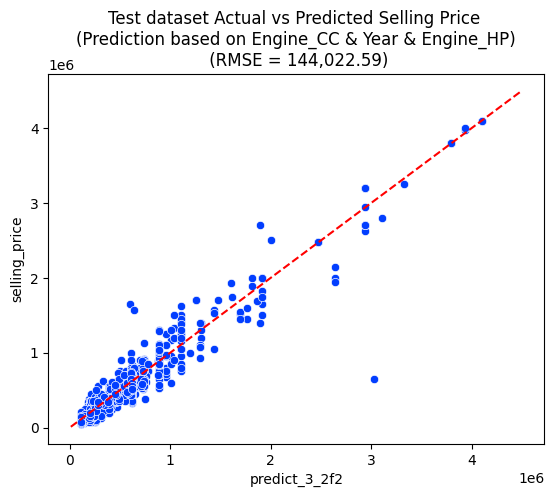

In [ ]:
sns.scatterplot(data=cars_test,x='predict_3_2f2', y='selling_price').set(title='Test dataset Actual vs Predicted Selling Price \n(Prediction based on Engine_CC & Year & Engine_HP)\n (RMSE = 144,022.59)');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

In [ ]:
cars_checkme2 = cars_test.copy()

dtr_5_4f3 = DecisionTreeRegressor(max_depth = 10, ccp_alpha= 5_000_000)

dtr_5_4f3.fit(cars_train[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_5_4f3'] = dtr_5_4f3.predict(cars_train[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']])
cars_valid['predict_5_4f3'] = dtr_5_4f3.predict(cars_valid[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']])
cars_test['predict_5_4f3'] = dtr_5_4f3.predict(cars_test[['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_5_4f3):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_5_4f3):>10.2f}')
print(f'test2 rmse: {rmse(cars_test.selling_price, cars_test.predict_5_4f3):>10.2f}')


print(dtr_5_4f3.tree_.max_depth, dtr_5_4f3.tree_.n_leaves)
dtr_5_4f3.feature_importances_

# train rmse:   98313.79
# valid rmse:  149308.67
# test2 rmse:  149376.04
# 10 280
# array([7.13477166e-04, 1.10911518e-02, 4.81344158e-02, 1.88333049e-01,
#        7.51727906e-01])

train rmse:   98313.79
valid rmse:  149527.47
test2 rmse:  174770.99
10 280


array([0.00869789, 0.00306662, 0.04917902, 0.18573889, 0.75331757])

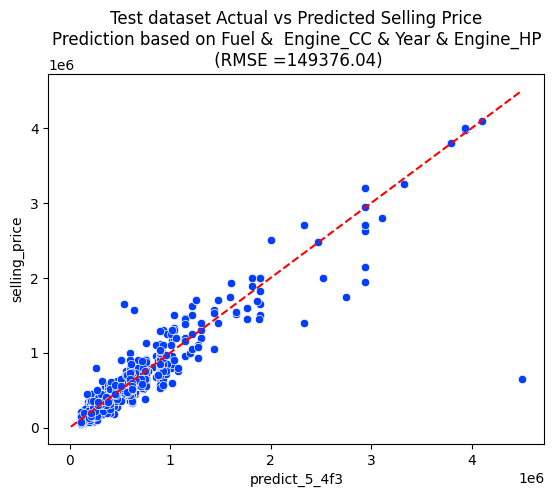

In [ ]:
sns.scatterplot(data=cars_test ,x='predict_5_4f3', y='selling_price').set(title='Test dataset Actual vs Predicted Selling Price\nPrediction based on Fuel &  Engine_CC & Year & Engine_HP\n (RMSE =149376.04)');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

In [ ]:
##seats

In [ ]:
#cars_checkme2 = cars_test.copy()

#dtr_seat_4f1 = DecisionTreeRegressor(max_depth = 9, ccp_alpha= 5_000_000)
dtr_seat_4f1 = DecisionTreeRegressor(max_depth = 10, ccp_alpha= 5_000_000)
#dtr_seat_4f1 = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=15, ccp_alpha= 5_000_000)
#dtr_seat_4f1 = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=5, ccp_alpha= 5_000_000)

dtr_seat_4f1.fit(cars_train[['seats','engine_cc','year', 'engine_hp']] ,cars_train['selling_price'])

cars_train['predict_seats_4f1'] = dtr_seat_4f1.predict(cars_train[['seats','engine_cc','year', 'engine_hp']])
cars_valid['predict_seats_4f1'] = dtr_seat_4f1.predict(cars_valid[['seats','engine_cc','year', 'engine_hp']])
cars_test['predict_seats_4f1'] = dtr_seat_4f1.predict(cars_test[['seats','engine_cc','year', 'engine_hp']])


print(f'train rmse: {rmse(cars_train.selling_price, cars_train.predict_seats_4f1):>10.2f}')
print(f'valid rmse: {rmse(cars_valid.selling_price, cars_valid.predict_seats_4f1):>10.2f}')
print(f'test2 rmse: {rmse(cars_test.selling_price, cars_test.predict_seats_4f1):>10.2f}')


print(dtr_seat_4f1.tree_.max_depth, dtr_seat_4f1.tree_.n_leaves)
dtr_seat_4f1.feature_importances_

# dtr_seat_4f1 = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=5, ccp_alpha= 5_000_000)
# train rmse:  123149.68
# valid rmse:  148466.28
# test2 rmse:  155597.64
# 15 269
# array([0.00157116, 0.04262892, 0.1875377 , 0.76826222])
# ======================
# dtr_seat_4f1 = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=15, ccp_alpha= 5_000_000)
# train rmse:  159269.05
# valid rmse:  161972.46
# test2 rmse:  149701.87
# 13 159
# array([0.00331892, 0.03513053, 0.18850553, 0.77304502])
# =====================================================#
#dtr_seat_4f1 = DecisionTreeRegressor(max_depth = 10, ccp_alpha= 5_000_000)
# train rmse:   95793.80
# valid rmse:  145896.93
# test2 rmse:  144936.48
# 10 291
# array([0.00289315, 0.05386145, 0.18841794, 0.75482746])
# =========================================================
# # dtr_seat_4f1 = DecisionTreeRegressor(max_depth = 9, ccp_alpha= 5_000_000)
# train rmse:  104924.08
# valid rmse:  148493.93
# test2 rmse:  168837.78
# 9 228
# array([0.00290545, 0.0532864 , 0.18821634, 0.7555918 ])

train rmse:   95793.80
valid rmse:  147355.37
test2 rmse:  146516.18
10 291


array([0.00213582, 0.05412777, 0.18959668, 0.75413973])

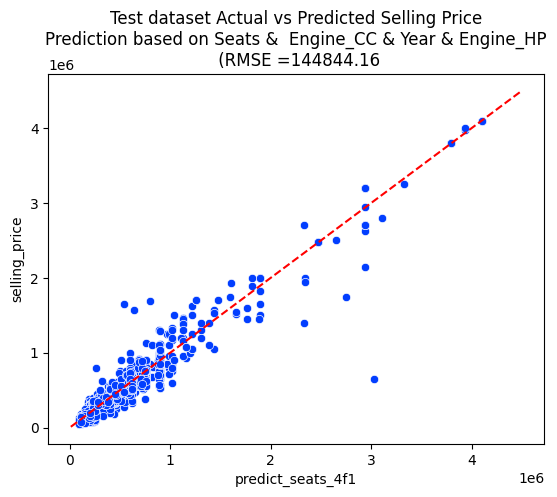

In [ ]:
sns.scatterplot(data=cars_test ,x='predict_seats_4f1', y='selling_price').set(title='Test dataset Actual vs Predicted Selling Price\nPrediction based on Seats &  Engine_CC & Year & Engine_HP\n (RMSE =144844.16');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

##Find the best of the best models

*   join Train and Validation DF and train best models with it

*   Use new trained models on on test data set


In [ ]:
# print the numbers of row of each dataframe separately
print(cars_train.shape, cars_valid.shape)

# combine the data frames
cars_train_production = pd.concat([cars_train, cars_valid])
# print the combined shape
cars_train_production.shape

(5204, 91) (1115, 91)


(6319, 91)

In [ ]:
tr_3_2f2 = ['engine_cc', 'year', 'engine_hp']

dtr_test_3_2f2 = DecisionTreeRegressor(max_depth =9 , ccp_alpha=5e6)
dtr_test_3_2f2.fit(cars_train_production[tr_3_2f2] ,cars_train_production['selling_price'])

cars_train_production['predict_3_2f2_final'] = dtr_test_3_2f2.predict(cars_train_production[tr_3_2f2])
# Predict on the test set
cars_test['predict_3_2f2_final'] = dtr_test_3_2f2.predict(cars_test[tr_3_2f2])


print('model evaluation on TEST:')
print(f'train rmse: {rmse(cars_train_production.selling_price, cars_train_production.predict_3_2f2_final):>10.2f}')
print(f'TEST rmse: {rmse(cars_test.selling_price, cars_test.predict_3_2f2_final):>10.2f}')

print(dtr_test_3_2f2.tree_.max_depth, dtr_test_3_2f2.tree_.n_leaves)
dtr_test_3_2f2.feature_importances_

# model evaluation on TEST:
# train rmse:  108291.58
# TEST rmse:  141630.22
# 9 217
# array([0.04726095, 0.19093516, 0.76180388])

model evaluation on TEST:
train rmse:  108291.58
TEST rmse:  141529.98
9 217


array([0.0501197 , 0.19057443, 0.75930587])

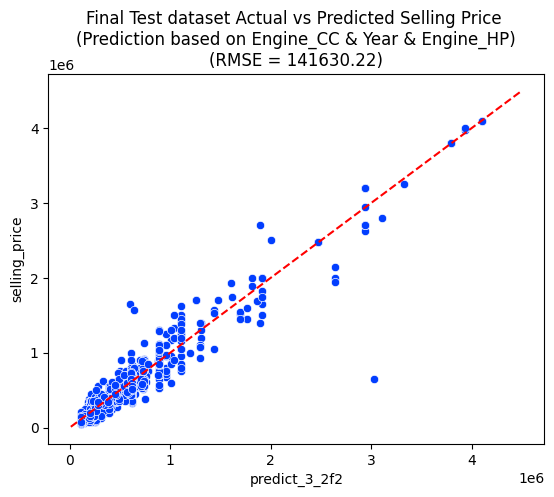

In [ ]:

sns.scatterplot(data=cars_test,x='predict_3_2f2', y='selling_price').set(title='Final Test dataset Actual vs Predicted Selling Price \n(Prediction based on Engine_CC & Year & Engine_HP)\n(RMSE = 141630.22)');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')


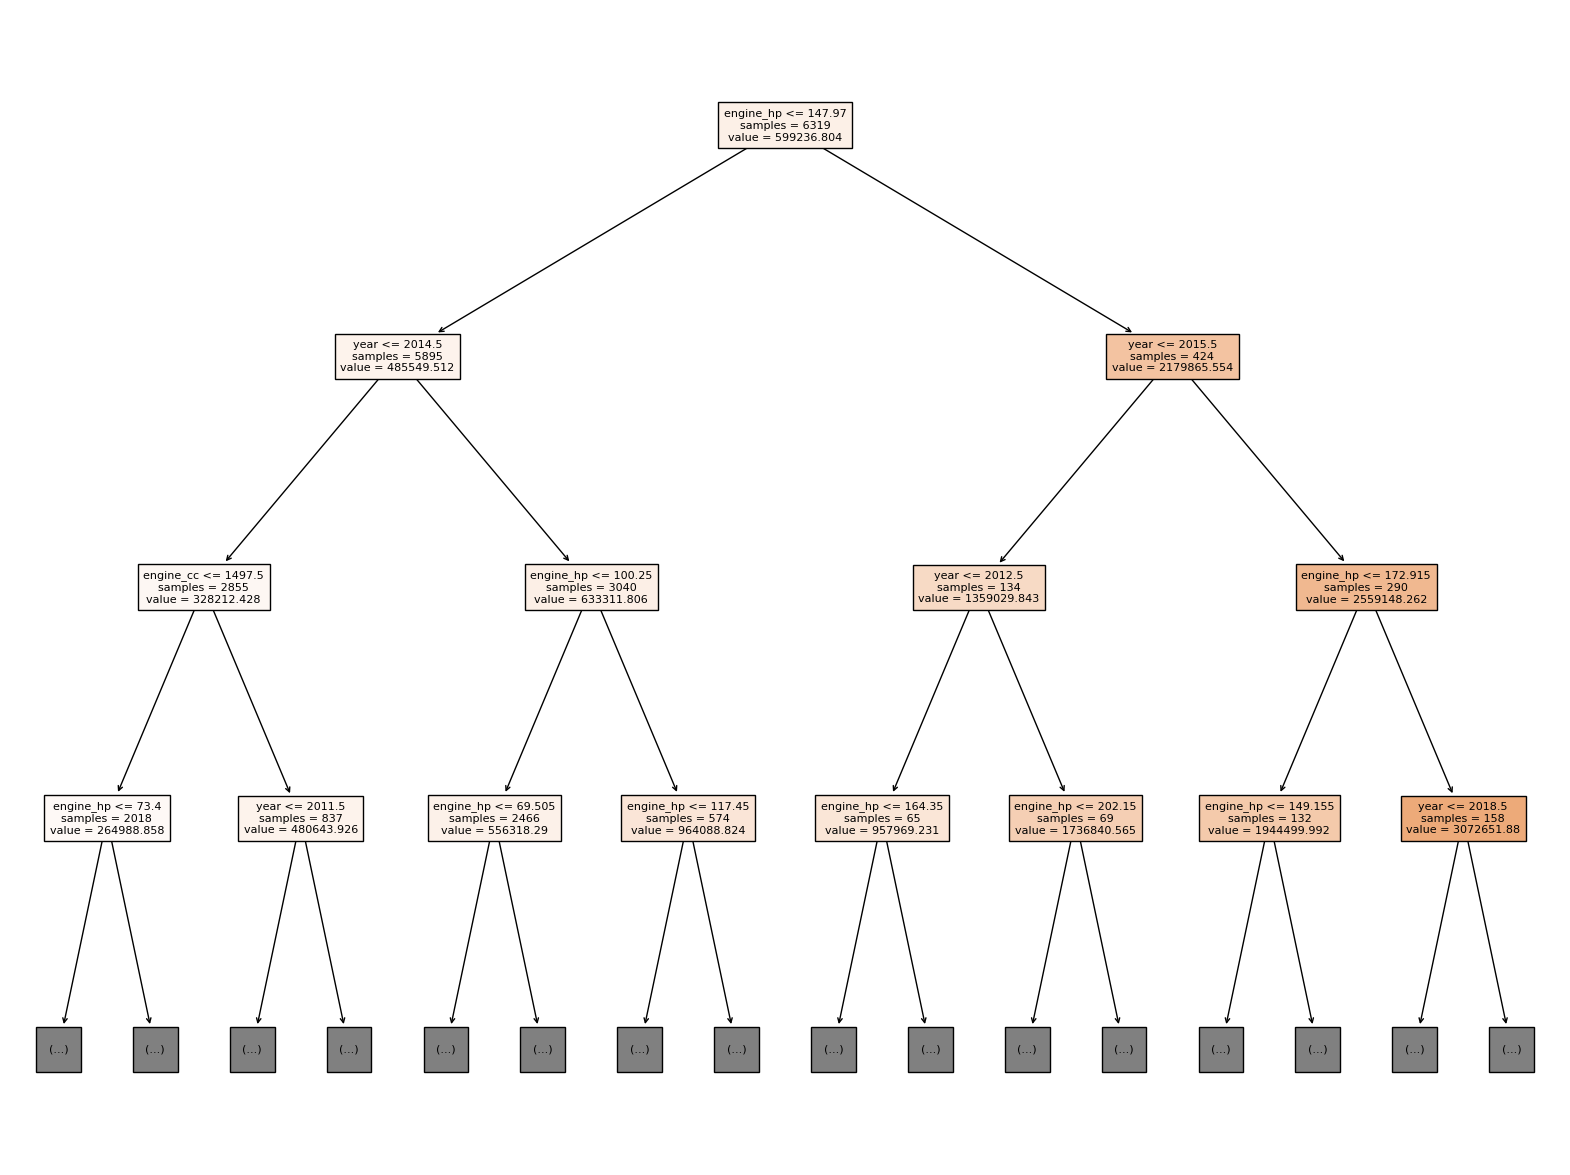

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(dtr_test_3_2f2,  feature_names=["engine_cc", "year", "engine_hp"], impurity = False, max_depth=3, fontsize=8, filled = True);

In [ ]:

tr_seller_cc_year_hp = ['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']

#dtr_test_seller_cc_year_hp = DecisionTreeRegressor(max_depth =8)
dtr_test_seller_cc_year_hp = DecisionTreeRegressor(min_samples_split =10, min_samples_leaf = 5 ) # , ccp_alpha=5e6)
dtr_test_seller_cc_year_hp.fit(cars_train_production[tr_seller_cc_year_hp] ,cars_train_production['selling_price'])

cars_train_production['predict_seller_cc_year_hp'] = dtr_test_seller_cc_year_hp.predict(cars_train_production[tr_seller_cc_year_hp])
# Predict on the test set
cars_test['predict_seller_cc_year_hp']             = dtr_test_seller_cc_year_hp.predict(cars_test[tr_seller_cc_year_hp])


print('model evaluation on TEST:')
print(f'train rmse: {rmse(cars_train_production.selling_price, cars_train_production.predict_seller_cc_year_hp):>10.2f}')
print(f'TEST rmse: {rmse(cars_test.selling_price, cars_test.predict_seller_cc_year_hp):>10.2f}')

print(dtr_test_seller_cc_year_hp.tree_.max_depth, dtr_test_seller_cc_year_hp.tree_.n_leaves)
dtr_test_seller_cc_year_hp.feature_importances_

# model evaluation on TEST:
# train rmse:  119106.47
# TEST rmse:  161860.71
# 18 592
# array([3.78790284e-04, 3.96993262e-04, 2.46118995e-04, 4.13668935e-02,
#        1.89427255e-01, 7.68183949e-01])

model evaluation on TEST:
train rmse:  119106.47
TEST rmse:  161858.38
18 592


array([3.61050467e-04, 4.14733078e-04, 2.46118995e-04, 4.15862467e-02,
       1.89427255e-01, 7.67964595e-01])

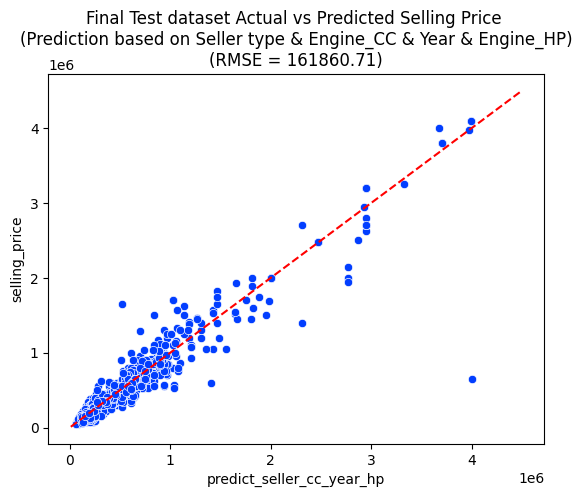

In [ ]:

sns.scatterplot(data=cars_test,x='predict_seller_cc_year_hp', y='selling_price').set(title='Final Test dataset Actual vs Predicted Selling Price \n(Prediction based on Seller type & Engine_CC & Year & Engine_HP)\n(RMSE = 161860.71)');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')


In [ ]:
tr_seller_cc_year_hp = ['seller_type_Dealer', 'seller_type_Individual','seller_type_Trustmark Dealer','engine_cc','year', 'engine_hp']

dtr_test_seller_cc_year_hp = DecisionTreeRegressor(max_depth =8)
#dtr_test_seller_cc_year_hp = DecisionTreeRegressor(min_samples_split =10, min_samples_leaf = 5 ) # , ccp_alpha=5e6)
dtr_test_seller_cc_year_hp.fit(cars_train_production[tr_seller_cc_year_hp] ,cars_train_production['selling_price'])

cars_train_production['predict_seller_cc_year_hp'] = dtr_test_seller_cc_year_hp.predict(cars_train_production[tr_seller_cc_year_hp])
# Predict on the test set
cars_test['predict_seller_cc_year_hp'] =             dtr_test_seller_cc_year_hp.predict(cars_test[tr_seller_cc_year_hp])


print('model evaluation on TEST:')
print(f'train rmse: {rmse(cars_train_production.selling_price, cars_train_production.predict_seller_cc_year_hp):>10.2f}')
print(f'TEST rmse: {rmse(cars_test.selling_price, cars_test.predict_seller_cc_year_hp):>10.2f}')

print(dtr_test_seller_cc_year_hp.tree_.max_depth, dtr_test_seller_cc_year_hp.tree_.n_leaves)
dtr_test_seller_cc_year_hp.feature_importances_

# model evaluation on TEST:
# train rmse:  123541.67
# TEST rmse:  145153.68
# 8 185
# array([4.91849988e-04, 2.92785599e-04, 0.00000000e+00, 4.74960697e-02,
#        1.91140317e-01, 7.60578978e-01])

model evaluation on TEST:
train rmse:  123541.67
TEST rmse:  173914.34
8 185


array([1.56783547e-04, 6.27852040e-04, 0.00000000e+00, 4.77617108e-02,
       1.91062435e-01, 7.60391219e-01])

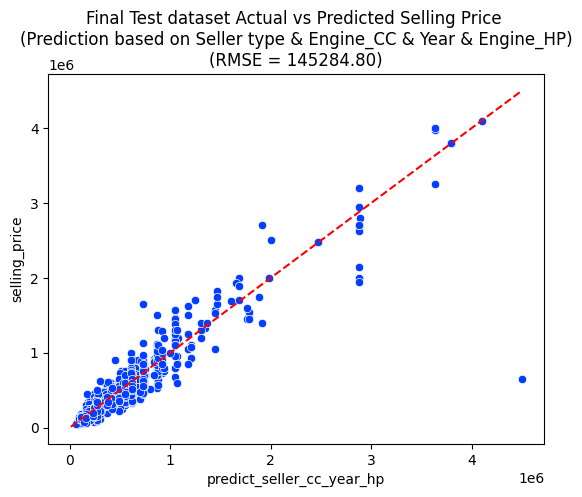

In [ ]:

sns.scatterplot(data=cars_test,x='predict_seller_cc_year_hp', y='selling_price').set(title='Final Test dataset Actual vs Predicted Selling Price \n(Prediction based on Seller type & Engine_CC & Year & Engine_HP)\n(RMSE = 145284.80)');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

In [ ]:
tr_fuel_cc_year_hp = ['fuel_Diesel', 'fuel_Petrol','engine_cc','year', 'engine_hp']

dtr_test_fuel_cc_year_hp = DecisionTreeRegressor(max_depth =10, ccp_alpha= 5e6)
#dtr_test_fuel_cc_year_hp = DecisionTreeRegressor(min_samples_split =10, min_samples_leaf = 5 ) # , ccp_alpha=5e6)
dtr_test_fuel_cc_year_hp.fit(cars_train_production[tr_fuel_cc_year_hp] ,cars_train_production['selling_price'])

cars_train_production['predict_fuel_cc_year_hp'] = dtr_test_fuel_cc_year_hp.predict(cars_train_production[tr_fuel_cc_year_hp])
# Predict on the test set
cars_test['predict_fuel_cc_year_hp'] =             dtr_test_fuel_cc_year_hp.predict(cars_test[tr_fuel_cc_year_hp])


print('model evaluation on TEST:')
print(f'train rmse: {rmse(cars_train_production.selling_price, cars_train_production.predict_fuel_cc_year_hp):>10.2f}')
print(f'TEST rmse: {rmse(cars_test.selling_price, cars_test.predict_fuel_cc_year_hp):>10.2f}')

print(dtr_test_fuel_cc_year_hp.tree_.max_depth, dtr_test_fuel_cc_year_hp.tree_.n_leaves)
dtr_test_fuel_cc_year_hp.feature_importances_

# model evaluation on TEST:
# train rmse:   99601.19
# TEST rmse:  170415.96
# 10 282
# array([0.00389956, 0.00106616, 0.05072852, 0.1896491 , 0.75465668])

model evaluation on TEST:
train rmse:   99601.19
TEST rmse:  140537.11
10 282


array([4.00203520e-03, 6.59180845e-04, 5.10843599e-02, 1.89669171e-01,
       7.54585253e-01])

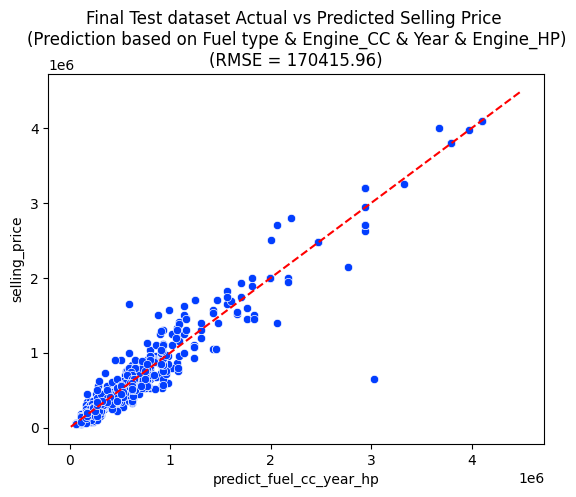

In [ ]:
sns.scatterplot(data=cars_test,x='predict_fuel_cc_year_hp', y='selling_price').set(title='Final Test dataset Actual vs Predicted Selling Price \n(Prediction based on Fuel type & Engine_CC & Year & Engine_HP)\n(RMSE = 170415.96)');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

In [ ]:
tr_seats_cc_year_hp = ['seats','engine_cc','year', 'engine_hp']

dtr_test_seats_cc_year_hp = DecisionTreeRegressor(max_depth =10, ccp_alpha= 5e6)

dtr_test_seats_cc_year_hp.fit(cars_train_production[tr_seats_cc_year_hp] ,cars_train_production['selling_price'])

cars_train_production['predict_seats_cc_year_hp'] = dtr_test_seats_cc_year_hp.predict(cars_train_production[tr_seats_cc_year_hp])
# Predict on the test set
cars_test['predict_seats_cc_year_hp'] =             dtr_test_seats_cc_year_hp.predict(cars_test[tr_seats_cc_year_hp])


print('model evaluation on TEST:')
print(f'train rmse: {rmse(cars_train_production.selling_price, cars_train_production.predict_seats_cc_year_hp):>10.2f}')
print(f'TEST rmse: {rmse(cars_test.selling_price, cars_test.predict_seats_cc_year_hp):>10.2f}')

print(dtr_test_seats_cc_year_hp.tree_.max_depth, dtr_test_seats_cc_year_hp.tree_.n_leaves)
dtr_test_seats_cc_year_hp.feature_importances_
######################################33
# dtr_test_seats_cc_year_hp = DecisionTreeRegressor(max_depth =10, ccp_alpha= 5e6)
# model evaluation on TEST:
# train rmse:   96706.97
# TEST rmse:  142971.45
# 10 297
# array([0.00473653, 0.05269282, 0.18977867, 0.75279198])

model evaluation on TEST:
train rmse:   96706.97
TEST rmse:  142993.03
10 297


array([0.00421023, 0.05039972, 0.1897572 , 0.75563285])

In [ ]:
cars_train_production.shape , cars_test.shape

((6319, 95), (1116, 55))

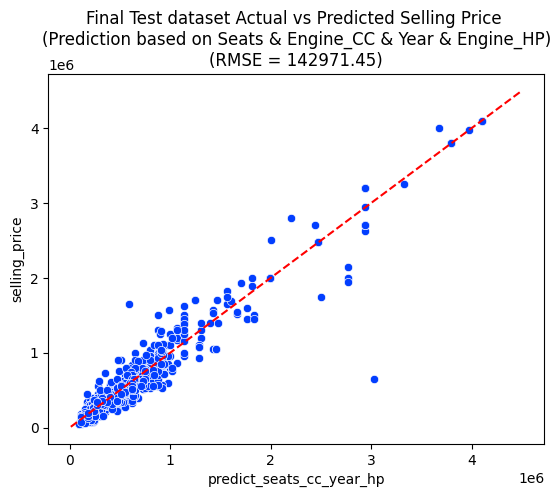

In [ ]:
sns.scatterplot(data=cars_test,x='predict_seats_cc_year_hp', y='selling_price').set(title='Final Test dataset Actual vs Predicted Selling Price \n(Prediction based on Seats & Engine_CC & Year & Engine_HP)\n(RMSE = 142971.45)');
plt.plot([10_000,4_500_000],[10_000,4_500_000],'--',color='red')

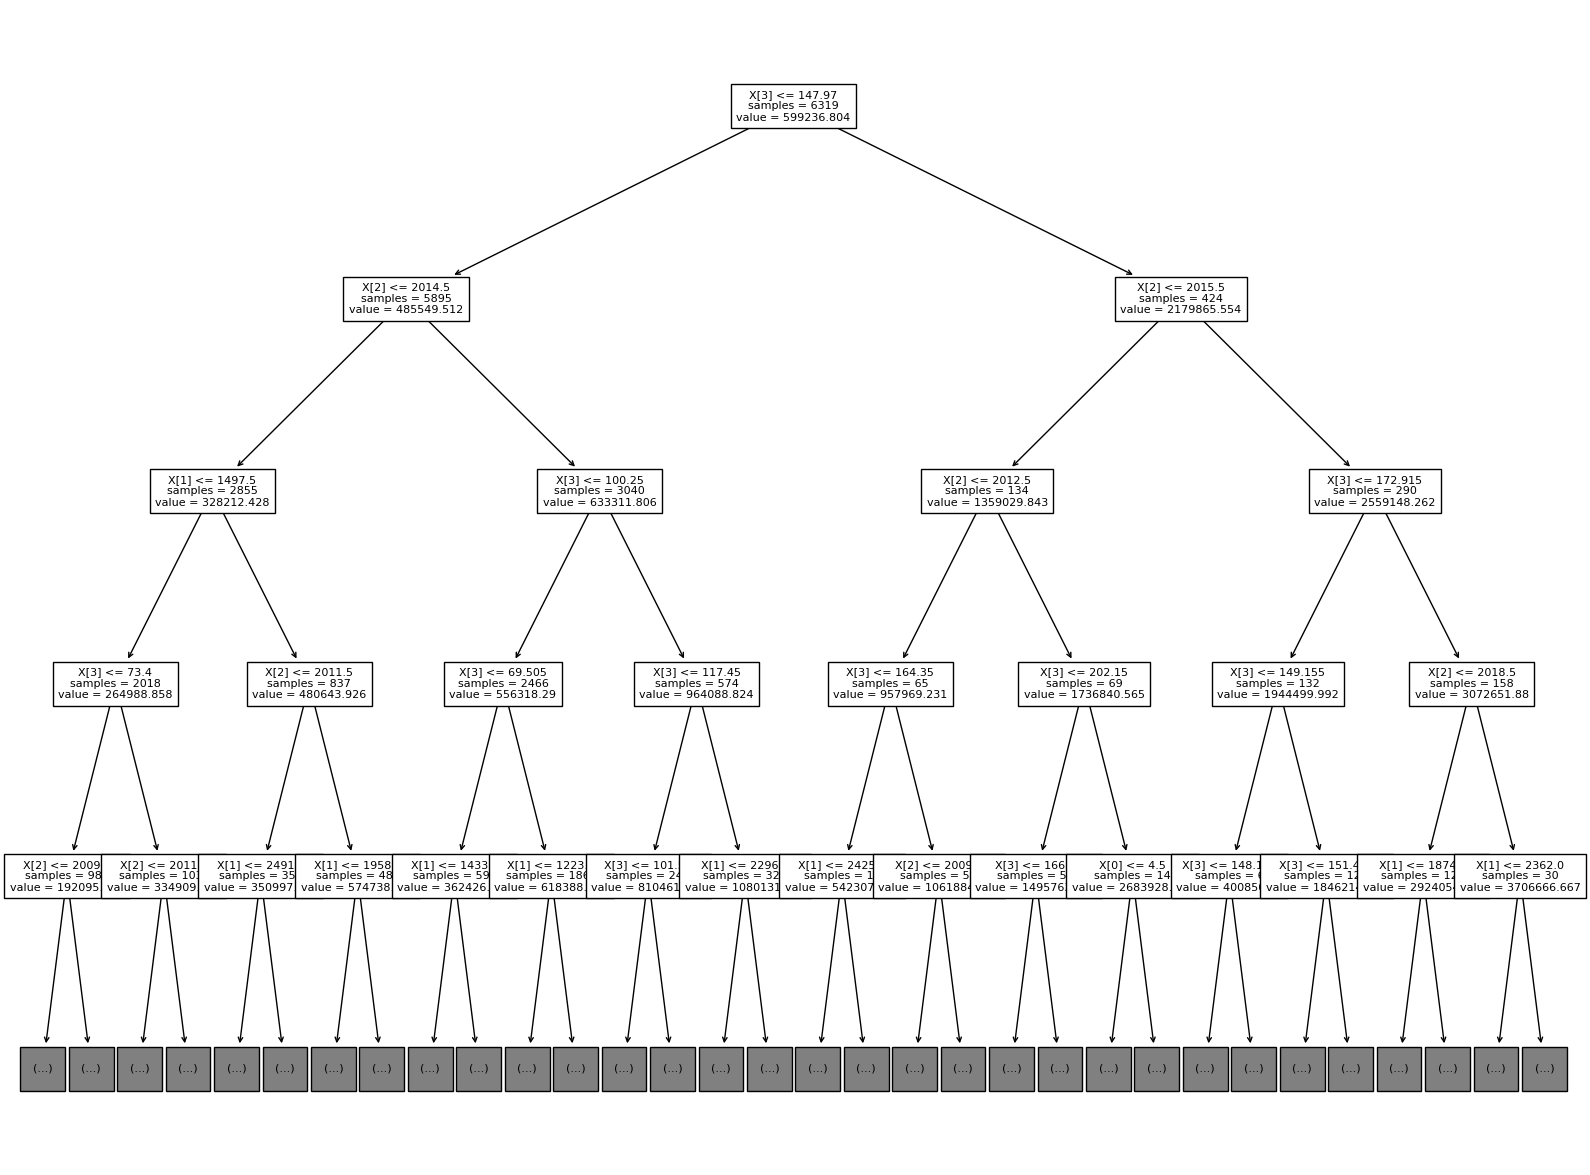

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
#plot_tree(dtr_test_seats_cc_year_hp, feature_names=["seats", "engine_cc", "year", "engine_hp"],  impurity = False,  max_depth=4, fontsize=8);
plot_tree(dtr_test_seats_cc_year_hp,  impurity = False, max_depth=4, fontsize=8);

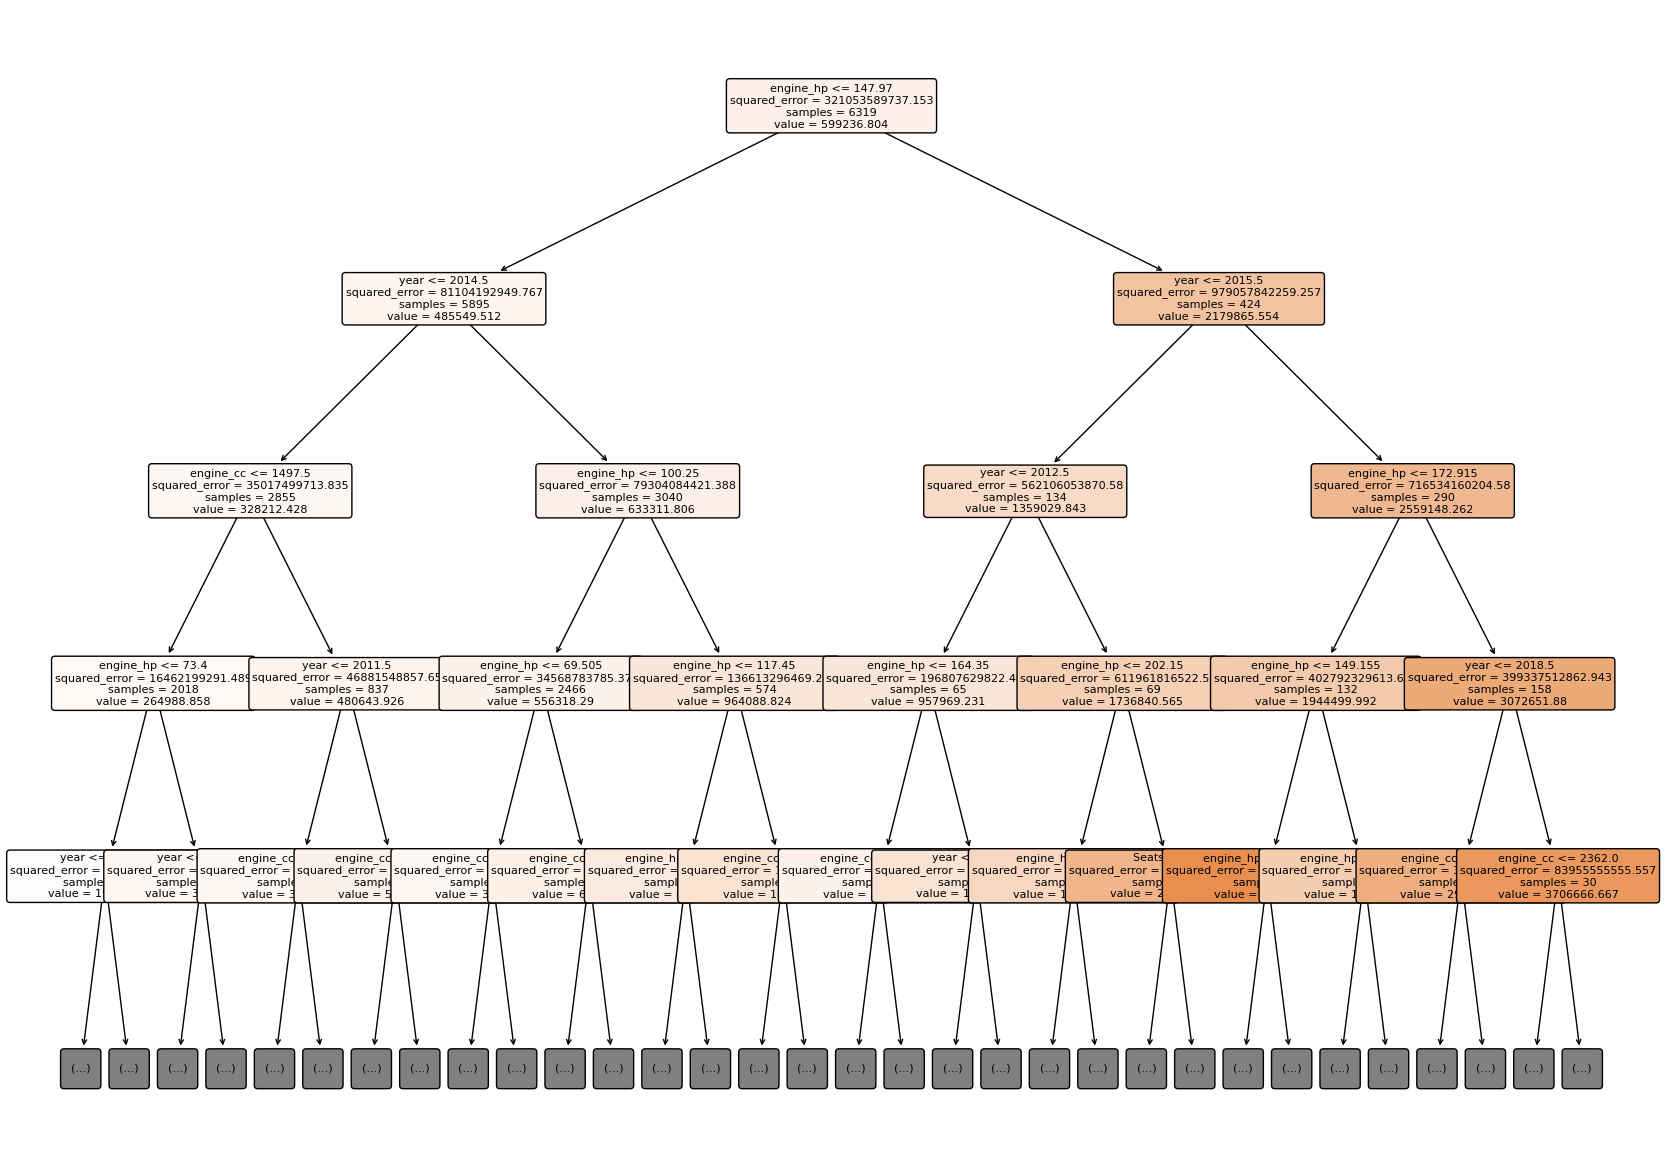

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
#plot_tree(dtr_test_seats_cc_year_hp, max_depth=4, fontsize=8);

#plot_tree(dtr_test_seats_cc_year_hp, feature_names=["Seats", "car_cc", "year", "engin_hp"], class_names=["blue", "green"], filled=True, rounded=True)
plot_tree(dtr_test_seats_cc_year_hp, feature_names=["Seats", "engine_cc", "year", "engine_hp"], max_depth=4, fontsize=8, filled=True, rounded=True);


In [ ]:
idx  = cars_df_clean[cars_df_clean.selling_price > 4_500_000].index
tr_trans_cc_year_hp = ['engine_cc', 'transmission_Automatic', 'transmission_Manual','year', 'engine_hp']

dtr_test_fuel_cc_year_hp = DecisionTreeRegressor(max_depth =10, ccp_alpha= 5e6)
#dtr_test_fuel_cc_year_hp = DecisionTreeRegressor(min_samples_split =10, min_samples_leaf = 5 ) # , ccp_alpha=5e6)
dtr_test_fuel_cc_year_hp.fit(cars_train_production[tr_trans_cc_year_hp] ,cars_train_production['selling_price'])

cars_train_production['predict_cc_trans_year_hp'] = dtr_test_fuel_cc_year_hp.predict(cars_train_production[tr_trans_cc_year_hp])
# Predict on the test set
cars_test['predict_cc_trans_year_hp'] =             dtr_test_fuel_cc_year_hp.predict(cars_test[tr_trans_cc_year_hp])


print('model evaluation on TEST:')
print(f'train rmse: {rmse(cars_train_production.selling_price, cars_train_production.predict_cc_trans_year_hp):>10.2f}')
print(f'TEST rmse: {rmse(cars_test.selling_price, cars_test.predict_cc_trans_year_hp):>10.2f}')

print(dtr_test_fuel_cc_year_hp.tree_.max_depth, dtr_test_fuel_cc_year_hp.tree_.n_leaves)
dtr_test_fuel_cc_year_hp.feature_importances_
#########################################
# model evaluation on TEST:
# train rmse:  100050.51
# TEST rmse:  171964.00
# 10 295
# array([0.06200981, 0.0025462 , 0.00149192, 0.21021565, 0.72373643])

model evaluation on TEST:
train rmse:   98854.75
TEST rmse:  137298.91
10 289


array([0.05164242, 0.00077381, 0.00235646, 0.1899374 , 0.75528991])